# Marcus & Alphaeus Data Science Project

---

This notebook covers our exploration and linkage between the **Covid cases** and the **Stock Market**.

We first plotted a time series graph with Data points on `Number of Covid Cases` as well as `Stock Prices` to quickly visualise if there were any correlation. We then further investigated and came up with linear regression models to identify the Covid variable with the strongest correlation to the Stock Prices. Lastly, we explored new models like using the multi-variate linear regression model to further analyse on their relation.



---

### Essential Libraries

We begin by installing the relevant APIs and importing the essential Python Libraries.


### To Install the alpha_vantage API into Jupyter Notebook

In [1]:
# To Install the alpha_vantage API into Jupyter Notebook
import sys
!{sys.executable} -m pip install alpha_vantage

### Import Basic Libraries

In [13]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt 
import requests
import csv
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
import matplotlib
import os
sb.set() 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Acquiring Covid DataSet from API

In [6]:
# Downloading Covid CSV file from API
response = requests.get("https://api.covidtracking.com/v1/us/daily.csv")
url_content = response.content
csv_file = open('downloaded.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [7]:
URL = 'https://api.covidtracking.com/v1/us/daily.csv'

with requests.Session() as s:
    download = s.get(URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['date', 'states', 'positive', 'negative', 'pending', 'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative', 'dateChecked', 'death', 'hospitalized', 'totalTestResults', 'lastModified', 'recovered', 'total', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease', 'hash']
['20210307', '56', '28756489', '74582825', '11808', '40199', '878613', '8134', '45475', '2802', '4281', '2021-03-07T24:00:00Z', '515151', '878613', '363825123', '2021-03-07T24:00:00Z', '', '0', '0', '842', '726', '131835', '41835', '1170059', '5468834088e2fb08a860dda6178a1faabe61edce']
['20210306', '56', '28714654', '74450990', '11783', '41401', '877887', '8409', '45453', '2811', '4280', '2021-03-06T24:00:00Z', '514309', '877887', '362655064', '2021-03-06T24:00:00Z', '', '0', '0', '1680', '503', '143835', '60015', '1430992', '21a596203ad2c78f4e54d1e69967caf126a2a5a7']
['20210

In [8]:
url = 'https://api.covidtracking.com/v1/us/daily.csv'
DailyCovid = pd.read_csv(url, error_bad_lines = False)
DailyCovid.head()
DailyCovid.to_csv('CovidData.csv')

date  states    positive    negative  pending  hospitalizedCurrently  \
0  20210307      56  28756489.0  74582825.0  11808.0                40199.0   
1  20210306      56  28714654.0  74450990.0  11783.0                41401.0   
2  20210305      56  28654639.0  74307155.0  12213.0                42541.0   
3  20210304      56  28585852.0  74035238.0  12405.0                44172.0   
4  20210303      56  28520365.0  73857281.0  11778.0                45462.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                878613.0          8134.0          45475.0   
1                877887.0          8409.0          45453.0   
2                877384.0          8634.0          45373.0   
3                874603.0          8970.0          45293.0   
4                873073.0          9359.0          45214.0   

   onVentilatorCurrently  ...          lastModified recovered  total  posNeg  \
0                 2802.0  ...  2021-03-07T24:00:00Z       NaN      0       0   
1                 2811.0  ...  2021-03-06T24:00:00Z       NaN      0       0   
2                 2889.0  ...  2021-03-05T24:00:00Z       NaN      0       0   
3                 2973.0  ...  2021-03-04T24:00:00Z       NaN      0       0   
4                 3094.0  ...  2021-03-03T24:00:00Z       NaN      0       0   

   deathIncrease hospitalizedIncrease  negativeIncrease  positiveIncrease  \
0            842                  726            131835             41835   
1           1680                  503            143835             60015   
2           2221                 2781            271917             68787   
3           1743                 1530            177957             65487   
4           2449                 2172            267001             66836   

   totalTestResultsIncrease                                      hash  
0                   1170059  5468834088e2fb08a860dda6178a1faabe61edce  
1                   1430992  21a596203ad2c78f4e54d1e69967caf126a2a5a7  
2                   1744417  a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222  
3                   1590984  a19ad6379a653834cbda3093791ad2c3b9fab5ff  
4                   1406795  9e1d2afda1b0ec243060d6f68a7134d011c0cb2a  

[5 rows x 25 columns]

# Acquiring Stocks DataSet from API

To prevent `calling the API, the code below has been commented out.`

In [2]:
# To call the API, uncomment the code below. outputsize can be either (compact/full)

# Technology stock // Tesla, Apple

# ts = TimeSeries(key='CT3HU4XXDVUWNVTK', output_format='pandas')
# TSLA_data, TSLA_meta_data = ts.get_daily(symbol='TSLA',outputsize='full')

# ts = TimeSeries(key='CT3HU4XXDVUWNVTK', output_format='pandas')
# AAPL_data, AAPL_meta_data = ts.get_daily(symbol='AAPL',outputsize='full')

# Healthcare stock // United Health Group

# ts = TimeSeries(key='CT3HU4XXDVUWNVTK', output_format='pandas')
# UNH_data, UNH_meta_data = ts.get_daily(symbol='UNH',outputsize='full')

# Transport->Aviation stock // Singapore Airlines
# ts = TimeSeries(key='CT3HU4XXDVUWNVTK', output_format='pandas')
# SINGF_data, SINGF_meta_data = ts.get_daily(symbol='SINGF',outputsize='full')

# Financial stock // PayPal
# ts = TimeSeries(key='CT3HU4XXDVUWNVTK', output_format='pandas')
# PYPL_data, PYPL_meta_data = ts.get_daily(symbol='PYPL',outputsize='full')

# Energy stock // Halliburton Co
# ts = TimeSeries(key='CT3HU4XXDVUWNVTK', output_format='pandas')
# HAL_data , HAL_meta_data = ts.get_daily(symbol='HAL',outputsize='full')

The code written below is to **organise** the data into a more usable form

In [10]:
# If you want to drop unwanted columns: Include code below

# TSLA_data.drop(["1. open", "2. high", "3. low"], axis = 1, inplace = True)
# AAPL_data.drop(["1. open", "2. high", "3. low"], axis = 1, inplace = True)
# UNH_data.drop(["1. open", "2. high", "3. low"], axis = 1, inplace = True)
# SINGF_data.drop(["1. open", "2. high", "3. low"], axis = 1, inplace = True)
# PYPL_data.drop(["1. open", "2. high", "3. low"], axis = 1, inplace = True)
# HAL_data.drop(["1. open", "2. high", "3. low"], axis = 1, inplace = True)


# Rename 4. close to Price, 5. volume to Volume

# TSLA_data.rename(columns = {'4. close':'Price'}, inplace = True)
# TSLA_data.rename(columns = {'5. volume':'Volume'}, inplace = True)
# AAPL_data.rename(columns = {'4. close':'Price'}, inplace = True)
# AAPL_data.rename(columns = {'5. volume':'Volume'}, inplace = True)
# UNH_data.rename(columns = {'4. close':'Price'}, inplace = True)
# UNH_data.rename(columns = {'5. volume':'Volume'}, inplace = True)
# SINGF_data.rename(columns = {'4. close':'Price'}, inplace = True)
# SINGF_data.rename(columns = {'5. volume':'Volume'}, inplace = True)
# PYPL_data.rename(columns = {'4. close':'Price'}, inplace = True)
# PYPL_data.rename(columns = {'5. volume':'Volume'}, inplace = True)
# HAL_data.rename(columns = {'4. close':'Price'}, inplace = True)
# HAL_data.rename(columns = {'5. volume':'Volume'}, inplace = True)


To **check** the data

In [3]:
# Check Data

# print(TSLA_data)
# print(AAPL_data)
# print(UNH_data)
# print(SINGF_data)
# print(PYPL_data)
# print(HAL_data)

In [4]:
# Store in another variable, so no need keep calling API to get data
# TSLA = TSLA_data
# AAPL = AAPL_data
# UNH = UNH_data
# SINGF = SINGF_data
# PYPL = PYPL_data
# HAL = HAL_data

# Clear away data not from 2020  (67 trading days have passed, have to update range accordingly)
# After 2020
"""for i in range(67):
    #TSLA = TSLA.drop([TSLA.index[0]])
    #AAPL = AAPL.drop([AAPL.index[0]])
    #UNH = UNH.drop([UNH.index[0]])
    SINGF = SINGF.drop([SINGF.index[0]])
    PYPL = PYPL.drop([PYPL.index[0]])
    HAL = HAL.drop([HAL.index[0]])

# Before 2020
#for i in range(5074):
    #AAPL = AAPL.drop([AAPL.index[253]])
    #UNH = UNH.drop([UNH.index[253]])
    HAL = HAL.drop([HAL.index[253]])

for i in range(3079):
    SINGF = SINGF.drop([SINGF.index[253]])
    
#for i in range(2394):
    #TSLA = TSLA.drop([TSLA.index[253]])

for i in range(1122):
    PYPL = PYPL.drop([PYPL.index[253]])
"""

# Check
# print(TSLA)
# print(AAPL)
# print(UNH)
# print(SINGF)
# print(PYPL)
# print(HAL)

'for i in range(67):\n    #TSLA = TSLA.drop([TSLA.index[0]])\n    #AAPL = AAPL.drop([AAPL.index[0]])\n    #UNH = UNH.drop([UNH.index[0]])\n    SINGF = SINGF.drop([SINGF.index[0]])\n    PYPL = PYPL.drop([PYPL.index[0]])\n    HAL = HAL.drop([HAL.index[0]])\n\n# Before 2020\n#for i in range(5074):\n    #AAPL = AAPL.drop([AAPL.index[253]])\n    #UNH = UNH.drop([UNH.index[253]])\n    HAL = HAL.drop([HAL.index[253]])\n\nfor i in range(3079):\n    SINGF = SINGF.drop([SINGF.index[253]])\n    \n#for i in range(2394):\n    #TSLA = TSLA.drop([TSLA.index[253]])\n\nfor i in range(1122):\n    PYPL = PYPL.drop([PYPL.index[253]])\n'

**Store** into a csv file, no need to keep accessing API

In [6]:
# Store into a csv file
"""
TSLA.to_csv('TSLAPricesIn2020.csv') 
AAPL.to_csv('AAPLPricesIn2020.csv')
UNH.to_csv('UNHPricesIn2020.csv')
SINGF.to_csv('SINGFPricesIn2020.csv')
PYPL.to_csv('PYPLPricesIn2020.csv')
HAL.to_csv('HALPricesIn2020.csv')
"""

"\nTSLA.to_csv('TSLAPricesIn2020.csv') \nAAPL.to_csv('AAPLPricesIn2020.csv')\nUNH.to_csv('UNHPricesIn2020.csv')\nSINGF.to_csv('SINGFPricesIn2020.csv')\nPYPL.to_csv('PYPLPricesIn2020.csv')\nHAL.to_csv('HALPricesIn2020.csv')\n"

In [12]:
#TSLA['Price'].plot()
plt.title('Intraday Times Series for the TSLA stock (daily)')
plt.grid()
plt.show()

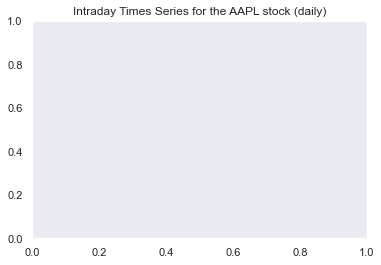

In [13]:
#AAPL['Price'].plot()
plt.title('Intraday Times Series for the AAPL stock (daily)')
plt.grid()
plt.show()

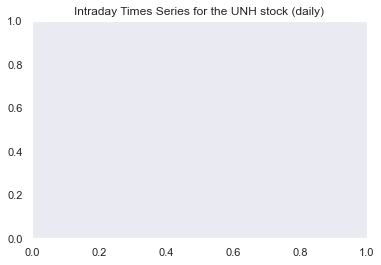

In [14]:
#UNH['Price'].plot()
plt.title('Intraday Times Series for the UNH stock (daily)')
plt.grid()
plt.show()

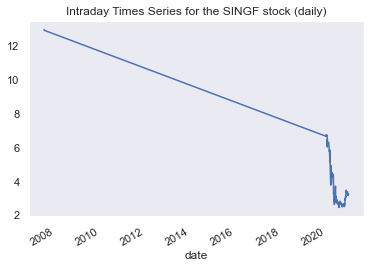

In [15]:
SINGF['Price'].plot()
plt.title('Intraday Times Series for the SINGF stock (daily)')
plt.grid()
plt.show()

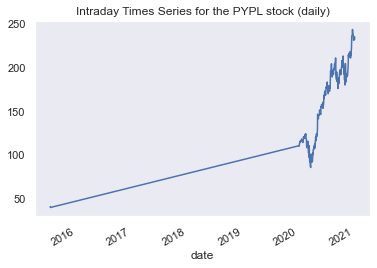

In [16]:
PYPL['Price'].plot()
plt.title('Intraday Times Series for the PYPL stock (daily)')
plt.grid()
plt.show()

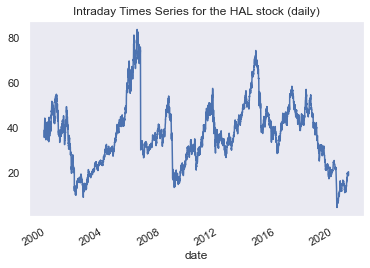

In [17]:
HAL['Price'].plot()
plt.title('Intraday Times Series for the HAL stock (daily)')
plt.grid()
plt.show()

# Import Data
`Import Data` from **saved CSV file** instead of calling API 

In [170]:
covid = pd.read_csv('CovidData.csv')
AAPL = pd.read_csv('AAPLPricesIn2020.csv')
HAL = pd.read_csv('HALPricesIn2020.csv')
PYPL = pd.read_csv('PYPLPricesIn2020.csv')
SINGF = pd.read_csv('SINGFPricesIn2020.csv')
TSLA = pd.read_csv('TSLAPricesIn2020.csv')
UNH = pd.read_csv('UNHPricesIn2020.csv')

In [171]:
print("Covid Data type : ", type(covid))
print("Covid Data dims : ", covid.shape)
print("AAPL Data type : ", type(AAPL))
print("AAPL Data dims : ", AAPL.shape)
print("HAL Data type : ", type(HAL))
print("HAL Data dims : ", HAL.shape)
print("PYPL Data type : ", type(PYPL))
print("PYPL Data dims : ", PYPL.shape)
print("SINGF Data type : ", type(SINGF))
print("SINGF Data dims : ", SINGF.shape)
print("TSLA Data type : ", type(TSLA))
print("TSLA Data dims : ", TSLA.shape)
print("UNH Data type : ", type(UNH))
print("UNH Data dims : ", UNH.shape)

Covid Data type :  <class 'pandas.core.frame.DataFrame'>
Covid Data dims :  (257, 24)
AAPL Data type :  <class 'pandas.core.frame.DataFrame'>
AAPL Data dims :  (253, 3)
HAL Data type :  <class 'pandas.core.frame.DataFrame'>
HAL Data dims :  (5262, 3)
PYPL Data type :  <class 'pandas.core.frame.DataFrame'>
PYPL Data dims :  (255, 3)
SINGF Data type :  <class 'pandas.core.frame.DataFrame'>
SINGF Data dims :  (255, 3)
TSLA Data type :  <class 'pandas.core.frame.DataFrame'>
TSLA Data dims :  (253, 3)
UNH Data type :  <class 'pandas.core.frame.DataFrame'>
UNH Data dims :  (253, 3)


In [172]:
AAPL_Prices = pd.DataFrame(AAPL['Price'])
HAL_Prices = pd.DataFrame(HAL['Price'])
PYPL_Prices = pd.DataFrame(PYPL['Price'])
SINGF_Prices = pd.DataFrame(SINGF['Price'])
TSLA_Prices = pd.DataFrame(TSLA['Price'])
UNH_Prices = pd.DataFrame(UNH['Price'])

Positive_Cases = pd.DataFrame(covid['positive'])
Positive_Increased = pd.DataFrame(covid['positiveIncrease'])
Total_Deaths = pd.DataFrame(covid['death'])
Death_Increased = pd.DataFrame(covid['deathIncrease'])
Total_Testing = pd.DataFrame(covid['totalTestResults'])
Total_Increased = pd.DataFrame(covid['totalTestResultsIncrease'])

Dates = pd.DataFrame(covid['date'])

In [173]:
#Aligning data time stamps from 1 April to 31 December 2020

AAPL_Prices = AAPL_Prices[:191]
HAL_Prices = HAL_Prices[:191]
PYPL_Prices = PYPL_Prices[:191]
SINGF_Prices = SINGF_Prices[:191]
TSLA_Prices = TSLA_Prices[:191]
UNH_Prices = UNH_Prices[:191]

Positive_Cases = Positive_Cases[66:259]
Positive_Increased = Positive_Increased[66:259]
Total_Deaths = Total_Deaths[66:259]
Death_Increased = Death_Increased[66:259]
Total_Testing = Total_Testing[66:259]
Total_Increased = Total_Increased[66:259]
Dates = Dates[66:259]

In [174]:
print("AAPL_Prices Data dims : ", AAPL_Prices.shape)
print("HAL_Prices Data dims : ", HAL_Prices.shape)
print("PYPL_Prices Data dims : ", PYPL_Prices.shape)
print("SINGF_Prices Data dims : ", SINGF_Prices.shape)
print("TSLA_Prices Data dims : ", TSLA_Prices.shape)
print("UNH_Prices Data dims : ", UNH_Prices.shape)

print("Positive_Cases Data dims : ", Positive_Cases.shape)
print("Positive_Increased Data dims : ", Positive_Increased.shape)
print("Total_Deaths Data dims : ", Total_Deaths.shape)
print("Death_Increased Data dims : ", Death_Increased.shape)
print("Total_Testing Data dims : ", Total_Testing.shape)
print("Total_Increased Data dims : ", Total_Increased.shape)
print("Dates Data dims : ", Dates.shape)

AAPL_Prices Data dims :  (191, 1)
HAL_Prices Data dims :  (191, 1)
PYPL_Prices Data dims :  (191, 1)
SINGF_Prices Data dims :  (191, 1)
TSLA_Prices Data dims :  (191, 1)
UNH_Prices Data dims :  (191, 1)
Positive_Cases Data dims :  (191, 1)
Positive_Increased Data dims :  (191, 1)
Total_Deaths Data dims :  (191, 1)
Death_Increased Data dims :  (191, 1)
Total_Testing Data dims :  (191, 1)
Total_Increased Data dims :  (191, 1)
Dates Data dims :  (191, 1)


In [175]:
print(Dates) #Checking dates (exclude weekends & holidays)

#Changing Column heading for clearer representation
AAPL_Prices.columns = ['APPL_Prices']
HAL_Prices .columns = ['HAL_Prices ']
PYPL_Prices .columns = ['PYPL_Prices ']
SINGF_Prices .columns = ['SINGF_Prices ']
TSLA_Prices .columns = ['TSLA_Prices ']
UNH_Prices .columns = ['UNH_Prices ']

         date
66   31-12-20
67   30-12-20
68   29-12-20
69   28-12-20
70   24-12-20
..        ...
252  07-04-20
253  06-04-20
254  03-04-20
255  02-04-20
256  01-04-20

[191 rows x 1 columns]


# Statistical Plot for Variables


positive    int32
dtype: object
positiveIncrease    int32
dtype: object
death    int32
dtype: object
deathIncrease    int32
dtype: object
totalTestResults    int32
dtype: object
totalTestResultsIncrease    int32
dtype: object


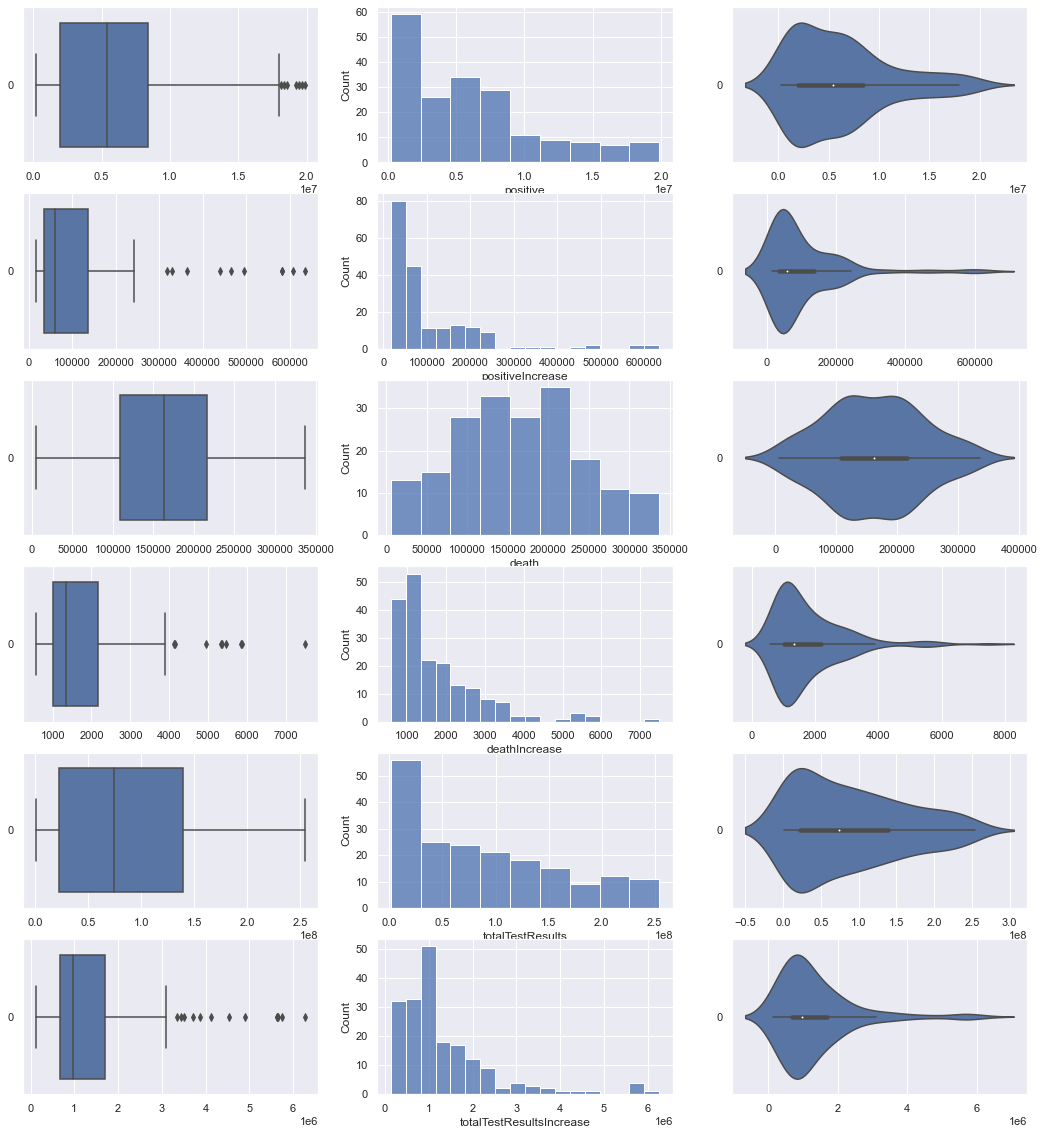

In [176]:
#Converting type from object to integer
Positive_Cases ['positive'] = Positive_Cases['positive'].astype(int)
Positive_Increased['positiveIncrease'] = Positive_Increased['positiveIncrease'].astype(int)
Total_Deaths['death'] = Total_Deaths['death'].astype(int)
Death_Increased['deathIncrease'] = Death_Increased['deathIncrease'].astype(int)
Total_Testing['totalTestResults'] = Total_Testing['totalTestResults'].astype(int)
Total_Increased['totalTestResultsIncrease'] = Total_Increased['totalTestResultsIncrease'].astype(int)
print(Positive_Cases.dtypes)
print(Positive_Increased.dtypes)
print(Total_Deaths.dtypes)
print(Death_Increased.dtypes)
print(Total_Testing.dtypes)
print(Total_Increased.dtypes)

#Joining covid datasets for easier visualisation
jointCovid = covid[['positive', 'positiveIncrease','death','deathIncrease','totalTestResults','totalTestResultsIncrease']]
jointCovid = jointCovid.drop(jointCovid.index[range(66)])
jointCovid = jointCovid.reset_index(drop=True)
f, axes = plt.subplots(6, 3, figsize=(18, 20))

count = 0
for var in jointCovid:
    sb.boxplot(data = jointCovid[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = jointCovid[var], ax = axes[count,1])
    sb.violinplot(data = jointCovid[var], orient = "h", ax = axes[count,2])
    count += 1

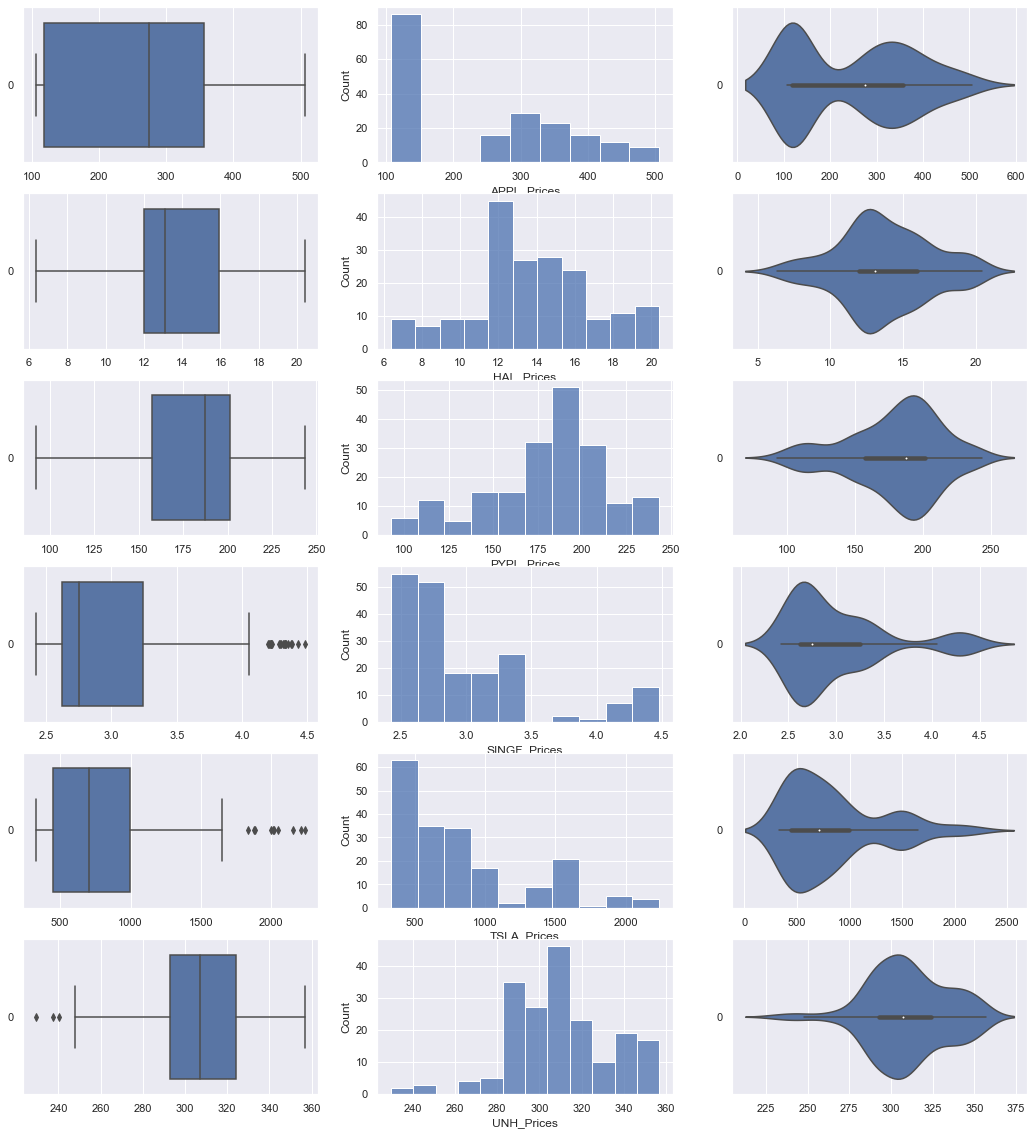

In [177]:
#Joining stocks datasets for easier visualisation
jointStocks = pd.concat([AAPL_Prices,HAL_Prices,PYPL_Prices,SINGF_Prices,TSLA_Prices,UNH_Prices], axis = 1).reindex(AAPL_Prices.index)
jointStocks.columns = ['APPL_Prices','HAL_Prices','PYPL_Prices','SINGF_Prices','TSLA_Prices','UNH_Prices']
f, axes = plt.subplots(6, 3, figsize=(18, 20))

count = 0
for var in jointStocks:
    sb.boxplot(data = jointStocks[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = jointStocks[var], ax = axes[count,1])
    sb.violinplot(data = jointStocks[var], orient = "h", ax = axes[count,2])
    count += 1

# Linear Relation Between Covid Data & APPL

                          APPL_Prices  positive  positiveIncrease     death  \
APPL_Prices                  1.000000 -0.621513         -0.401629 -0.591120   
positive                    -0.621513  1.000000          0.714131  0.959790   
positiveIncrease            -0.401629  0.714131          1.000000  0.624461   
death                       -0.591120  0.959790          0.624461  1.000000   
deathIncrease               -0.196531  0.350297          0.643881  0.144716   
totalTestResults            -0.671643  0.989695          0.692711  0.972017   
totalTestResultsIncrease    -0.396667  0.625369          0.913948  0.621637   

                          deathIncrease  totalTestResults  \
APPL_Prices                   -0.196531         -0.671643   
positive                       0.350297          0.989695   
positiveIncrease               0.643881          0.692711   
death                          0.144716          0.972017   
deathIncrease                  1.000000          0.281365   
t

<AxesSubplot:>

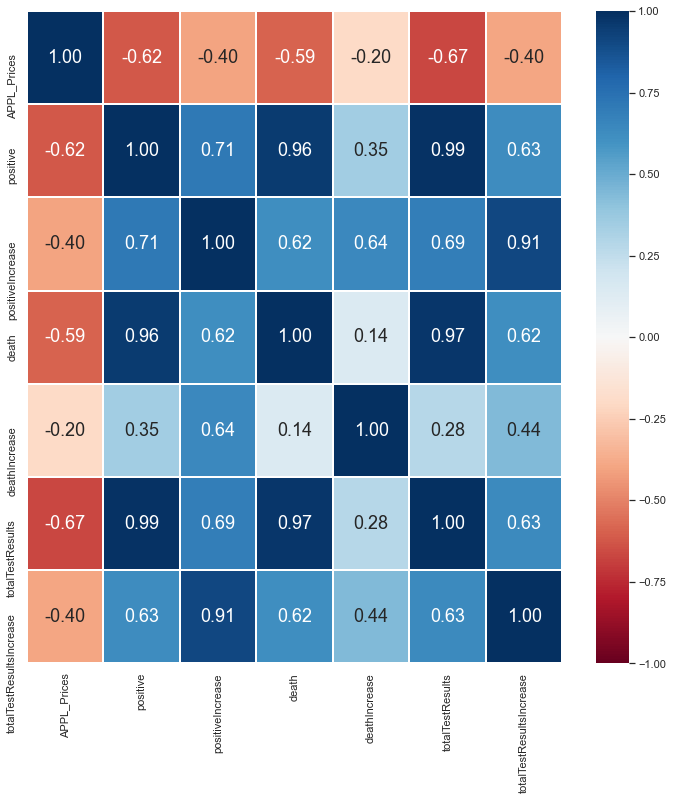

In [178]:
AAPL_Prices.reset_index(drop=True, inplace=True)
AAPL_joint = pd.concat([AAPL_Prices, jointCovid], axis=1)

#Correlation Matrix
print(AAPL_joint.corr())

# Heatmap of the Correlation Matrix
# Only interested in first row/column
f = plt.figure(figsize=(12, 12))
sb.heatmap(AAPL_joint.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

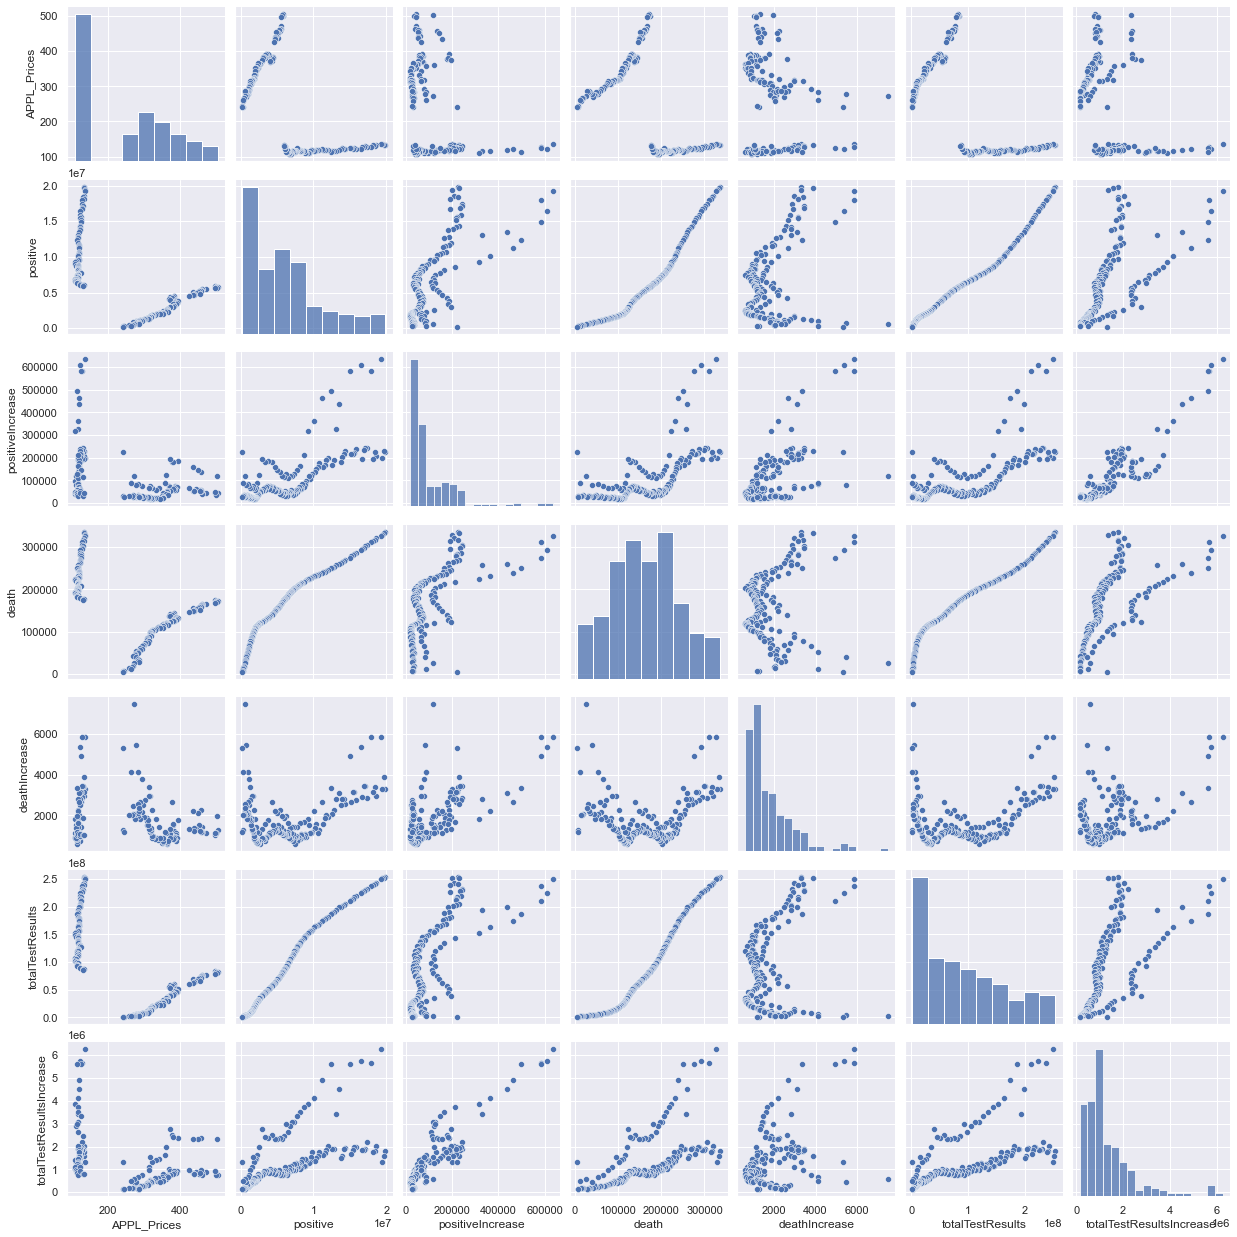

In [179]:
# Only interested in first row/column
sb.pairplot(data = AAPL_joint)

# Linear Relation Between Covid Data & HAL

                          HAL_Prices   positive  positiveIncrease     death  \
HAL_Prices                   1.000000  0.788132          0.560778  0.817064   
positive                     0.788132  1.000000          0.714131  0.959790   
positiveIncrease             0.560778  0.714131          1.000000  0.624461   
death                        0.817064  0.959790          0.624461  1.000000   
deathIncrease                0.164295  0.350297          0.643881  0.144716   
totalTestResults             0.752773  0.989695          0.692711  0.972017   
totalTestResultsIncrease     0.513927  0.625369          0.913948  0.621637   

                          deathIncrease  totalTestResults  \
HAL_Prices                     0.164295          0.752773   
positive                       0.350297          0.989695   
positiveIncrease               0.643881          0.692711   
death                          0.144716          0.972017   
deathIncrease                  1.000000          0.281365   
t

<AxesSubplot:>

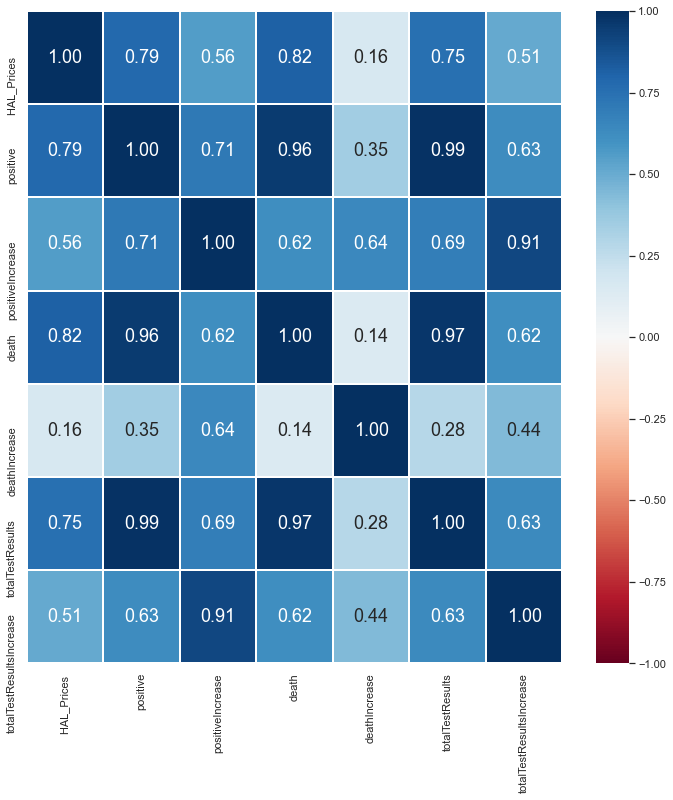

In [180]:
HAL.reset_index(drop=True, inplace=True)
HAL_joint = pd.concat([HAL_Prices, jointCovid], axis=1)

#Correlation Matrix
print(HAL_joint.corr())

# Heatmap of the Correlation Matrix
# Only interested in first row/column
f = plt.figure(figsize=(12, 12))
sb.heatmap(HAL_joint.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

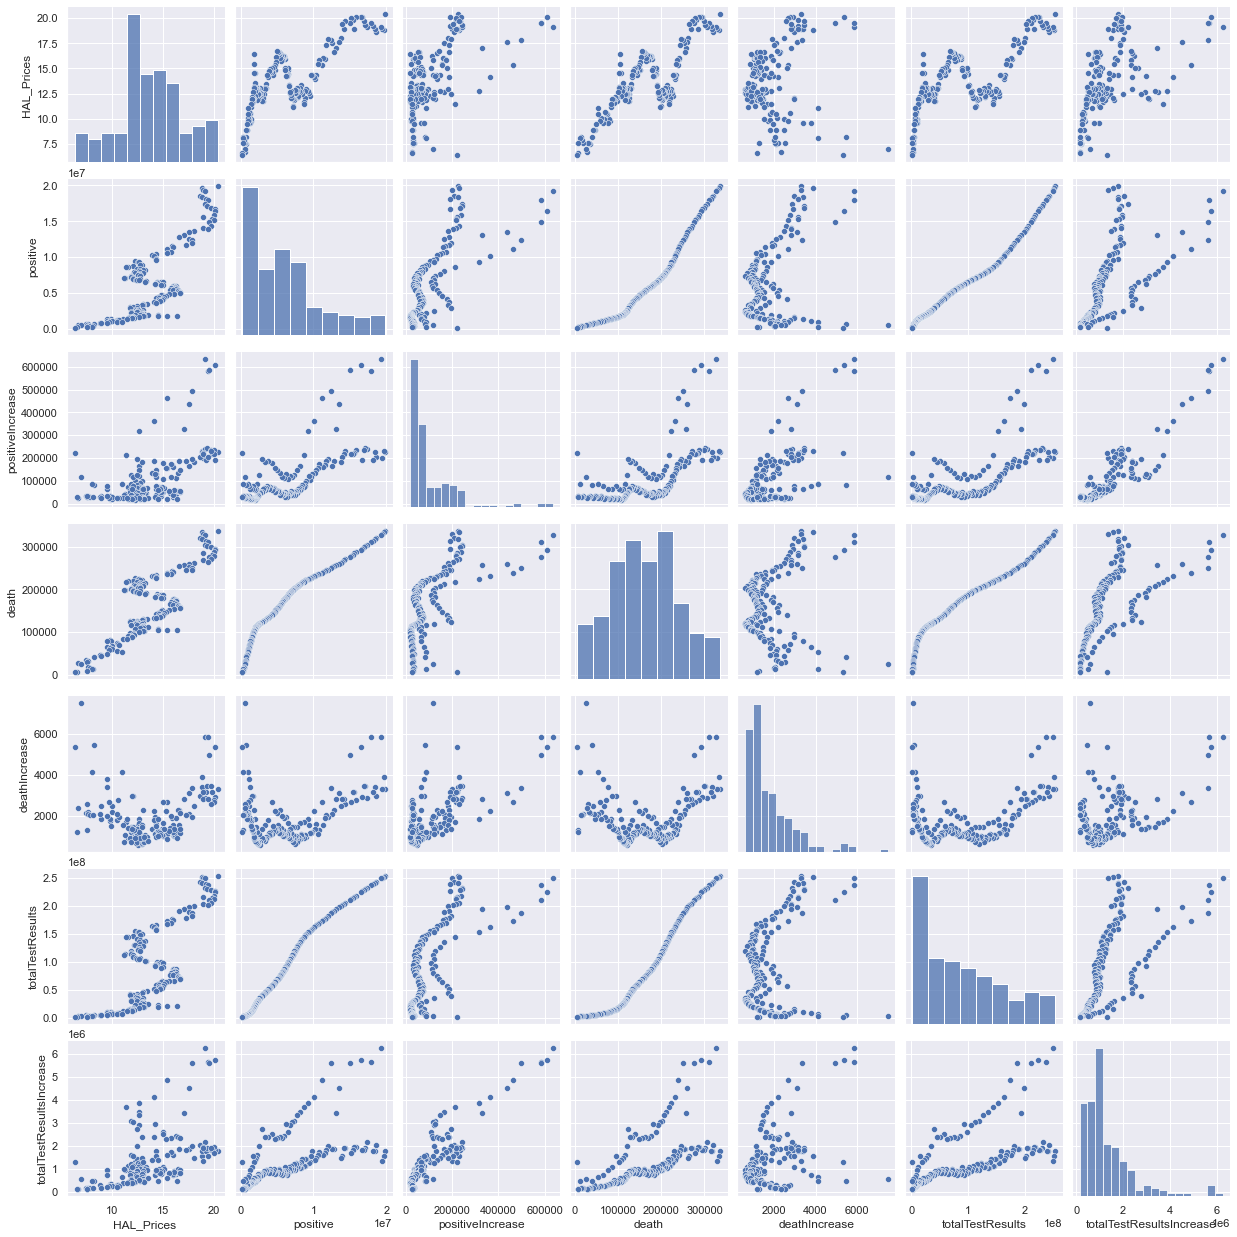

In [181]:
# Only interested in first row/column
sb.pairplot(data = HAL_joint)

# Linear Relation Between Covid Data & PYPL

                          PYPL_Prices   positive  positiveIncrease     death  \
PYPL_Prices                   1.000000  0.837013          0.509066  0.929973   
positive                      0.837013  1.000000          0.714131  0.959790   
positiveIncrease              0.509066  0.714131          1.000000  0.624461   
death                         0.929973  0.959790          0.624461  1.000000   
deathIncrease                -0.001166  0.350297          0.643881  0.144716   
totalTestResults              0.844690  0.989695          0.692711  0.972017   
totalTestResultsIncrease      0.563875  0.625369          0.913948  0.621637   

                          deathIncrease  totalTestResults  \
PYPL_Prices                   -0.001166          0.844690   
positive                       0.350297          0.989695   
positiveIncrease               0.643881          0.692711   
death                          0.144716          0.972017   
deathIncrease                  1.000000          0.281

<AxesSubplot:>

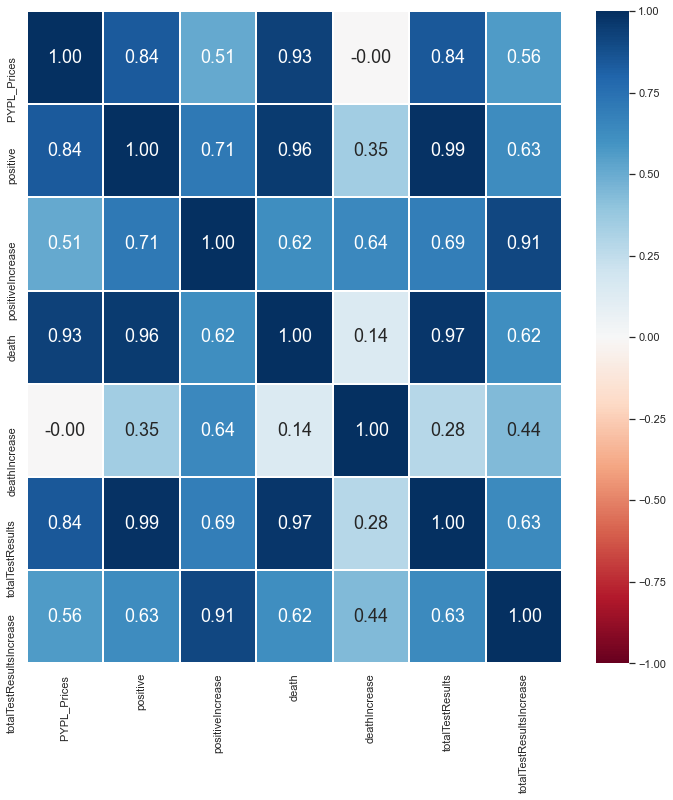

In [182]:
PYPL.reset_index(drop=True, inplace=True)
PYPL_joint = pd.concat([PYPL_Prices, jointCovid], axis=1)

#Correlation Matrix
print(PYPL_joint.corr())

# Heatmap of the Correlation Matrix
# Only interested in first row/column
f = plt.figure(figsize=(12, 12))
sb.heatmap(PYPL_joint.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

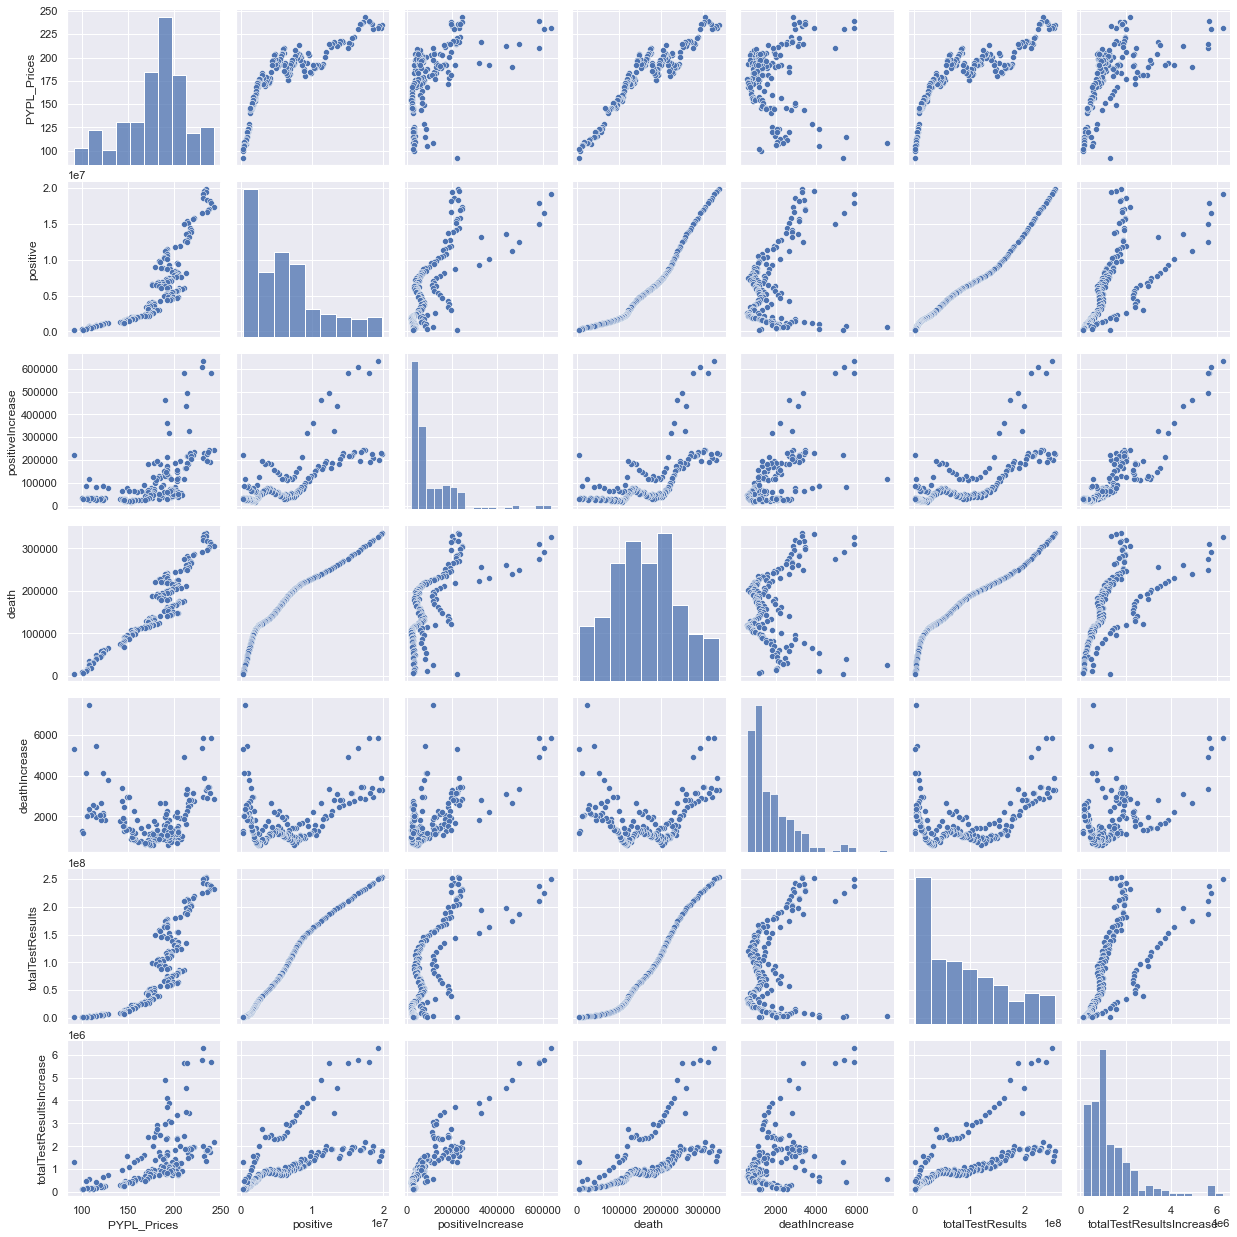

In [183]:
# Only interested in first row/column
sb.pairplot(data = PYPL_joint)

# Linear Relation Between Covid Data &SINGF

                          SINGF_Prices   positive  positiveIncrease     death  \
SINGF_Prices                   1.000000 -0.139759          0.085118 -0.382390   
positive                      -0.139759  1.000000          0.714131  0.959790   
positiveIncrease               0.085118  0.714131          1.000000  0.624461   
death                         -0.382390  0.959790          0.624461  1.000000   
deathIncrease                  0.537573  0.350297          0.643881  0.144716   
totalTestResults              -0.191459  0.989695          0.692711  0.972017   
totalTestResultsIncrease      -0.153796  0.625369          0.913948  0.621637   

                          deathIncrease  totalTestResults  \
SINGF_Prices                   0.537573         -0.191459   
positive                       0.350297          0.989695   
positiveIncrease               0.643881          0.692711   
death                          0.144716          0.972017   
deathIncrease                  1.000000       

<AxesSubplot:>

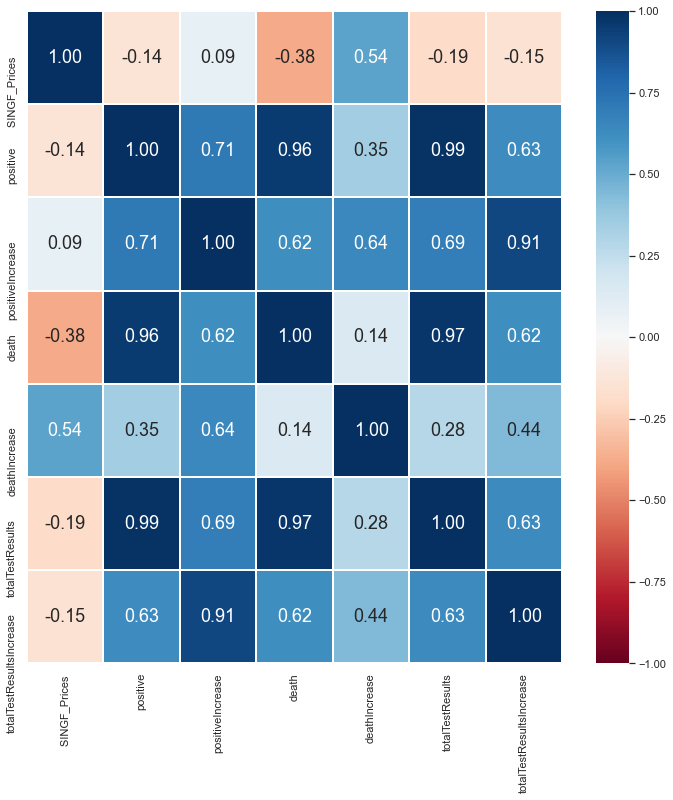

In [184]:
SINGF.reset_index(drop=True, inplace=True)
SINGF_joint = pd.concat([SINGF_Prices, jointCovid], axis=1)

#Correlation Matrix
print(SINGF_joint.corr())

# Heatmap of the Correlation Matrix
# Only interested in first row/column
f = plt.figure(figsize=(12, 12))
sb.heatmap(SINGF_joint.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

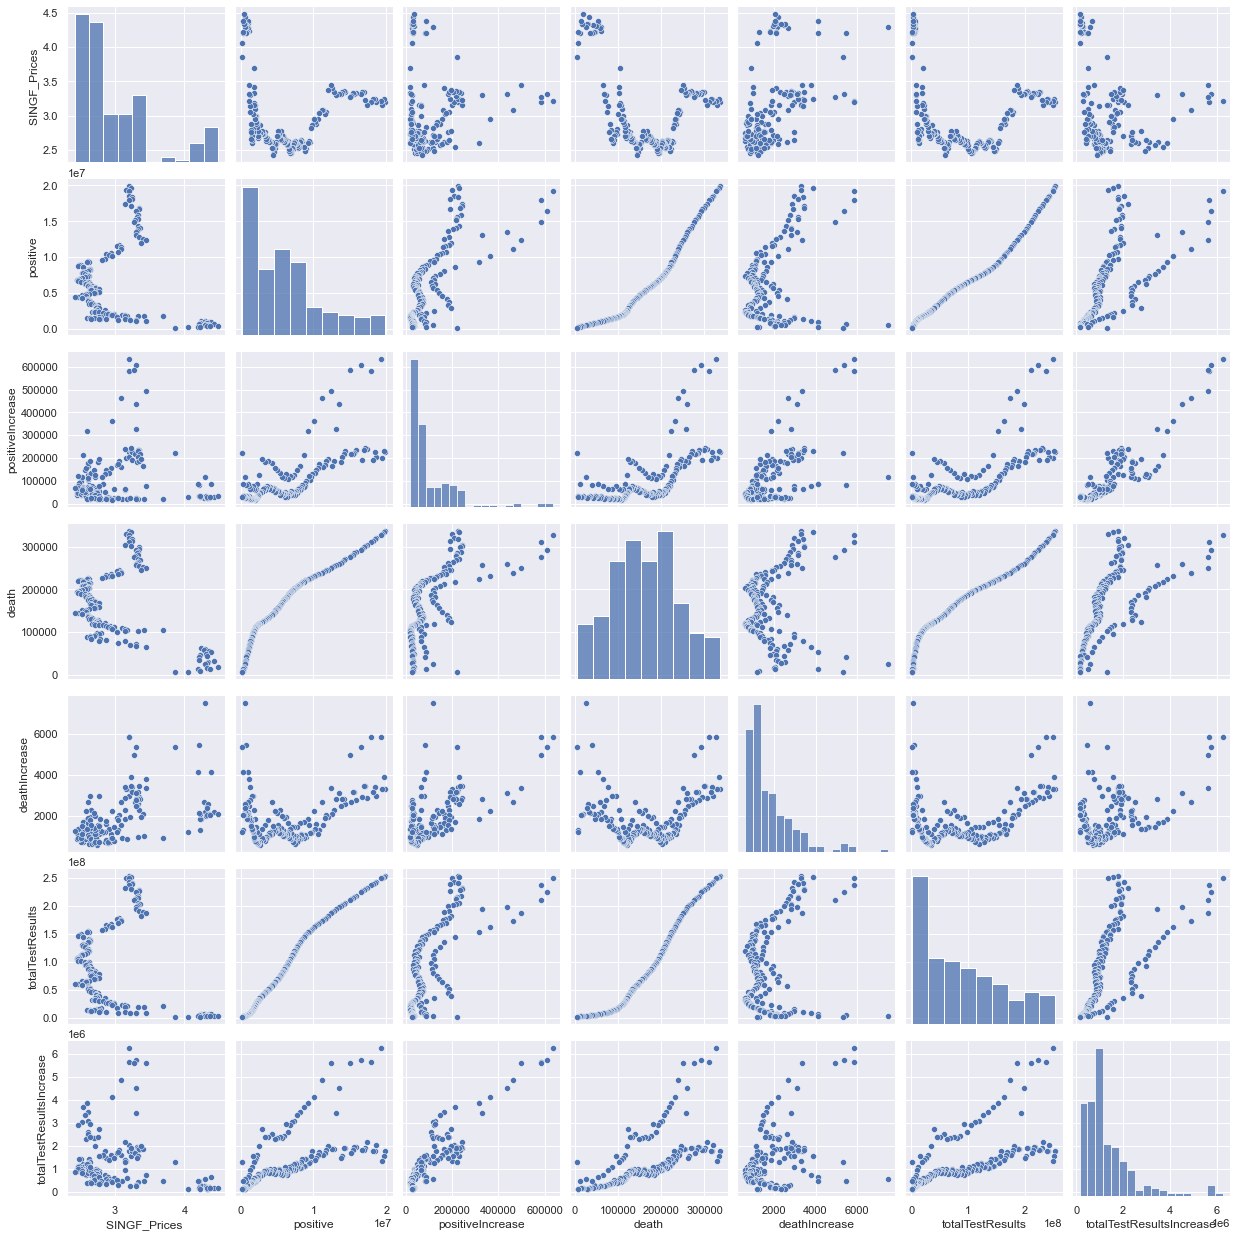

In [185]:
# Only interested in first row/column
sb.pairplot(data = SINGF_joint)

# Linear Relation Between Covid Data & TSLA

                          TSLA_Prices   positive  positiveIncrease     death  \
TSLA_Prices                   1.000000 -0.308799         -0.200311 -0.253526   
positive                     -0.308799  1.000000          0.714131  0.959790   
positiveIncrease             -0.200311  0.714131          1.000000  0.624461   
death                        -0.253526  0.959790          0.624461  1.000000   
deathIncrease                -0.171420  0.350297          0.643881  0.144716   
totalTestResults             -0.354652  0.989695          0.692711  0.972017   
totalTestResultsIncrease     -0.186026  0.625369          0.913948  0.621637   

                          deathIncrease  totalTestResults  \
TSLA_Prices                   -0.171420         -0.354652   
positive                       0.350297          0.989695   
positiveIncrease               0.643881          0.692711   
death                          0.144716          0.972017   
deathIncrease                  1.000000          0.281

<AxesSubplot:>

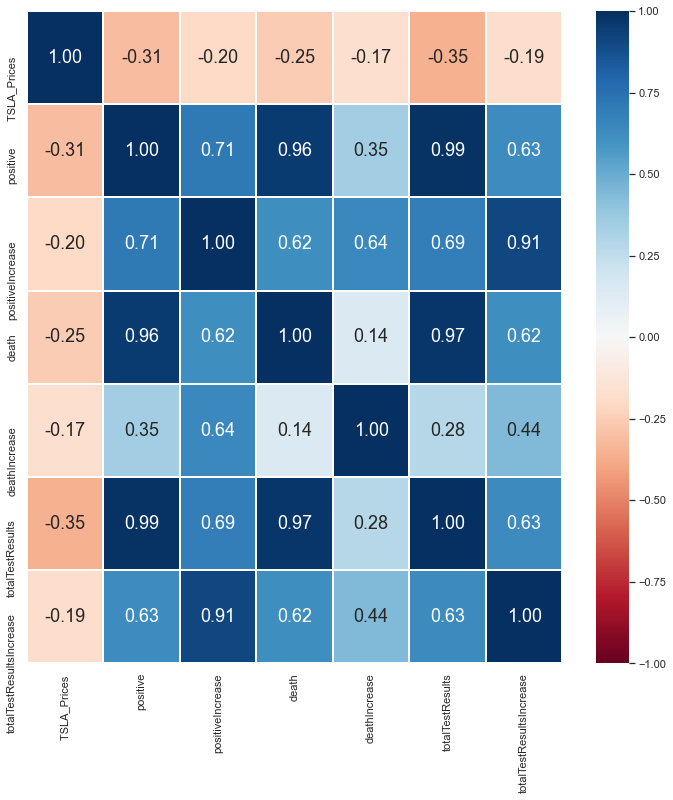

In [186]:
TSLA.reset_index(drop=True, inplace=True)
TSLA_joint = pd.concat([TSLA_Prices, jointCovid], axis=1)

#Correlation Matrix
print(TSLA_joint.corr())

# Heatmap of the Correlation Matrix
# Only interested in first row/column
f = plt.figure(figsize=(12, 12))
sb.heatmap(TSLA_joint.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

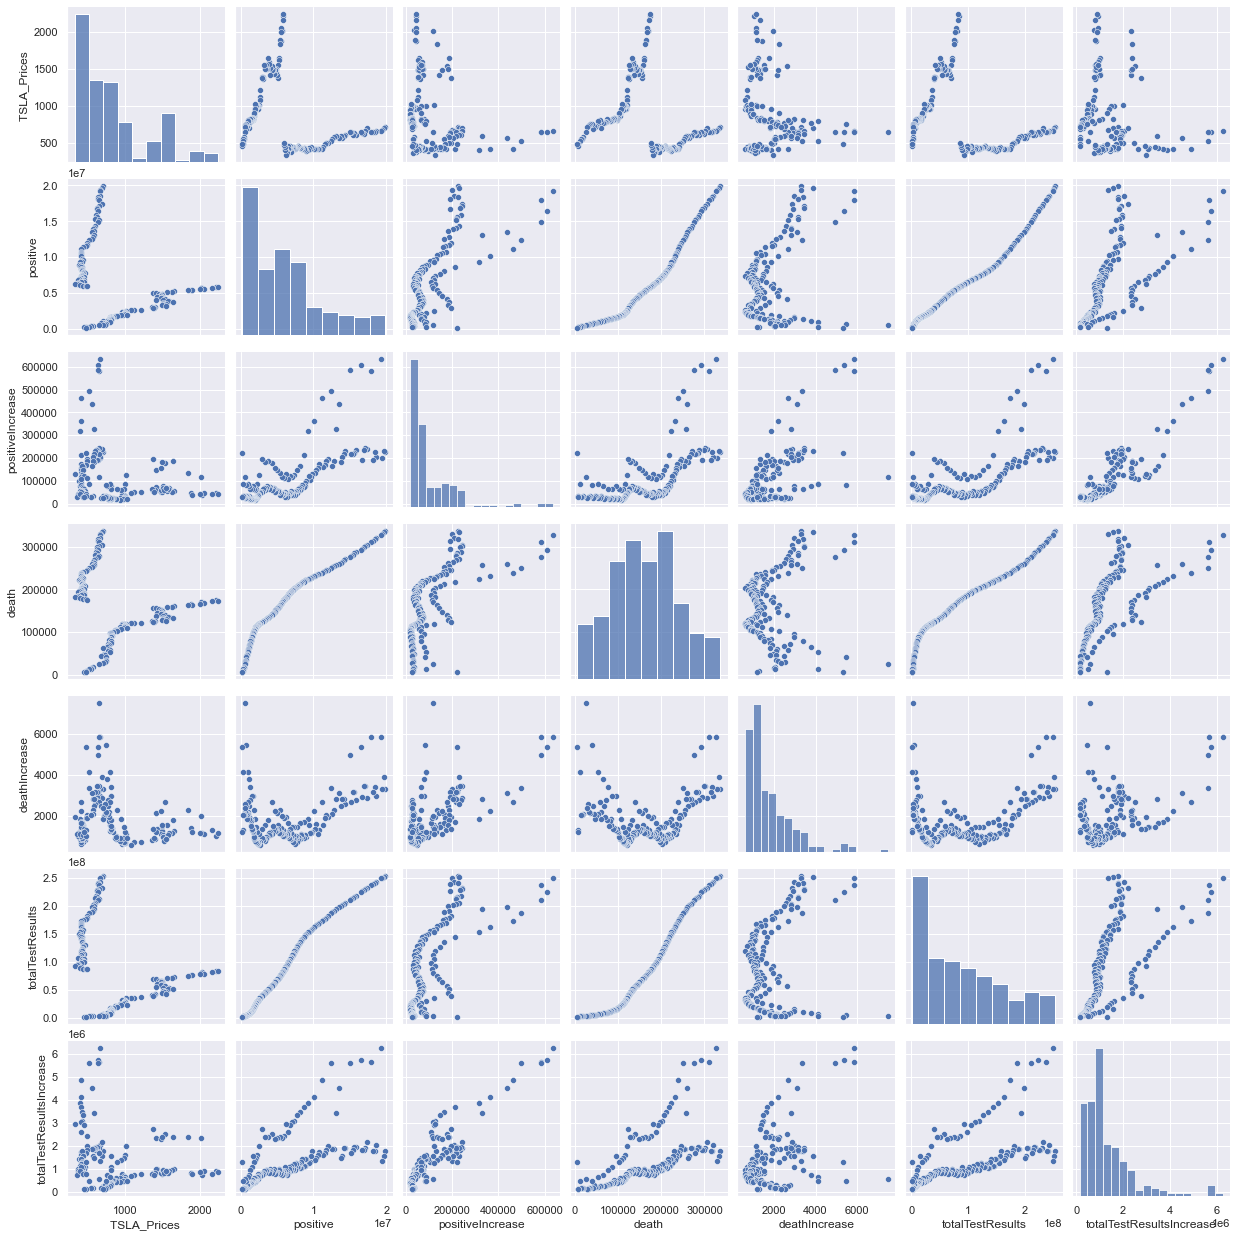

In [187]:
# Only interested in first row/column
sb.pairplot(data = TSLA_joint)

# Linear Relation Between Covid Data & UNH

                          UNH_Prices   positive  positiveIncrease     death  \
UNH_Prices                   1.000000  0.832452          0.557618  0.884055   
positive                     0.832452  1.000000          0.714131  0.959790   
positiveIncrease             0.557618  0.714131          1.000000  0.624461   
death                        0.884055  0.959790          0.624461  1.000000   
deathIncrease                0.096099  0.350297          0.643881  0.144716   
totalTestResults             0.851479  0.989695          0.692711  0.972017   
totalTestResultsIncrease     0.549616  0.625369          0.913948  0.621637   

                          deathIncrease  totalTestResults  \
UNH_Prices                     0.096099          0.851479   
positive                       0.350297          0.989695   
positiveIncrease               0.643881          0.692711   
death                          0.144716          0.972017   
deathIncrease                  1.000000          0.281365   
t

<AxesSubplot:>

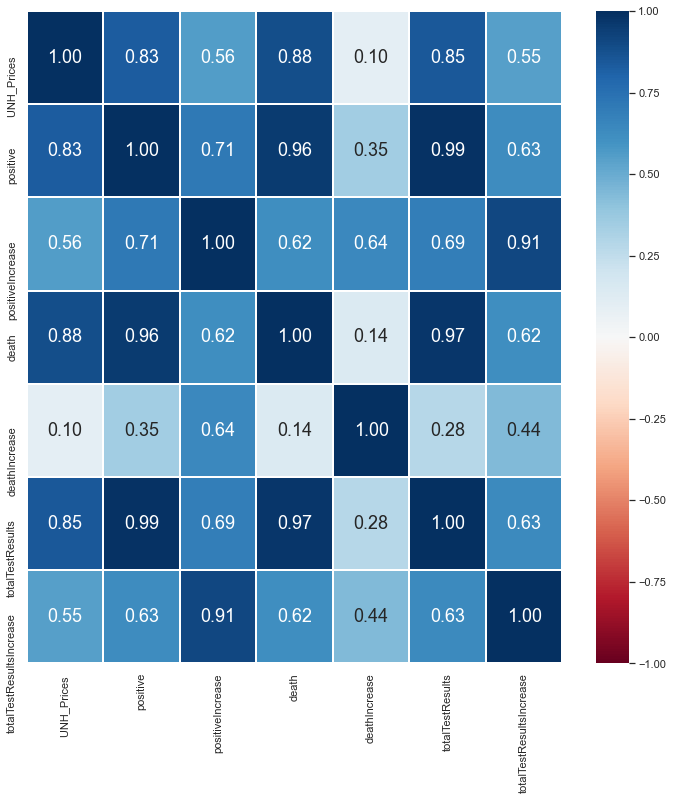

In [188]:
UNH.reset_index(drop=True, inplace=True)
UNH_joint = pd.concat([UNH_Prices, jointCovid], axis=1)

#Correlation Matrix
print(UNH_joint.corr())

# Heatmap of the Correlation Matrix
# Only interested in first row/column
f = plt.figure(figsize=(12, 12))
sb.heatmap(UNH_joint.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [3]:
# Only interested in first row/column
sb.pairplot(data = UNH_joint, corner=True)

NameError: name 'sb' is not defined

#Based on correlation

1) AAPL_Price : The most important variable in predicting the price is: Total_Testing.

2) HAL_Price : The most important variable in predicting the price is: Total_Deaths.

3) PYPL_Price : The most important variable in predicting the price is: Total_Deaths.

4) SINGF_Price : The most important variable in predicting the price is: Death_Increased.

5) TSLA_Price : The most important variable in predicting the price is: Total_Testing.

6) UNH_Prices : The most important variable in predicting the price is: Total_Deaths.

# Linear Regression 

# 1) Predicting AAPL Prices using Death Increased

Intercept of Regression 	: b =  [291.95871214]
Coefficients of Regression 	: a =  [[-0.02423725]]



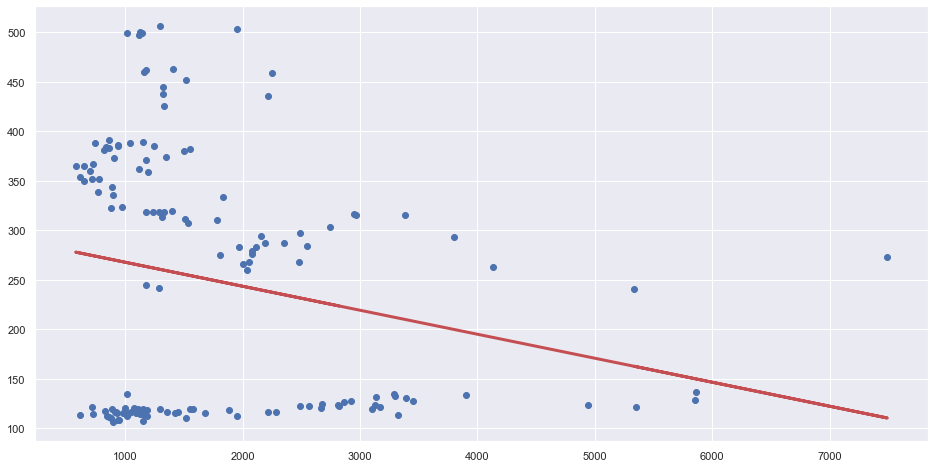

In [194]:
# Response: AAPL_Prices
# Predictor: Death_Increased
X_train, X_test, y_train, y_test = train_test_split(Death_Increased, AAPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [195]:
# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.05108725719707263
Mean Squared Error (MSE) 	: 15435.93188736662


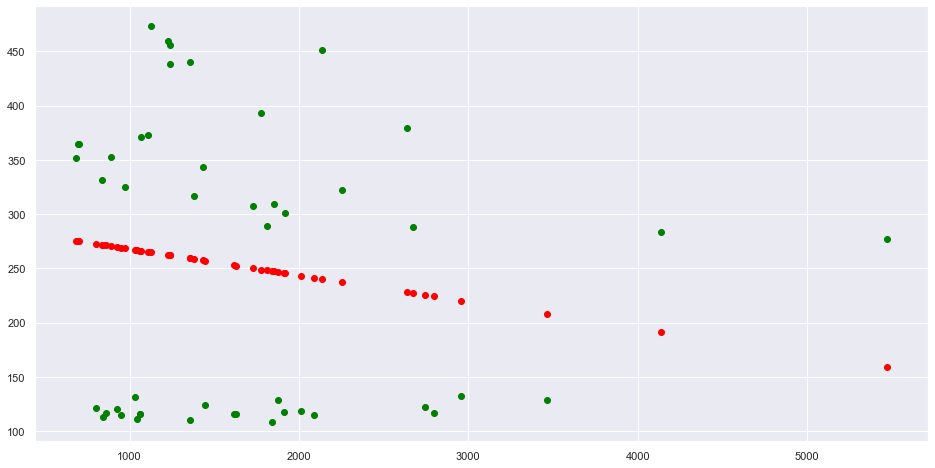

Mean Squared Error (MSE) 	: 16375.94677281521


In [196]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 2) Predicting APPL Prices using Total Deaths

Intercept of Regression 	: b =  [401.53918226]
Coefficients of Regression 	: a =  [[-0.00094248]]



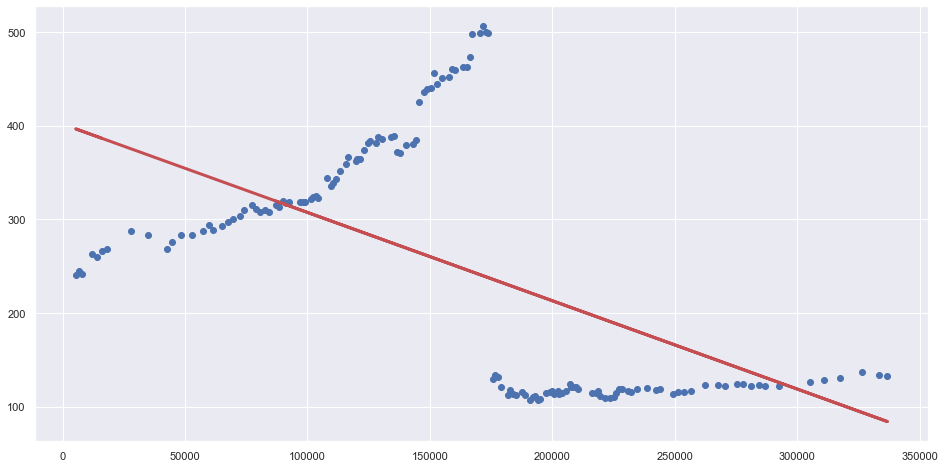

Explained Variance (R^2) 	: 0.3188762988486237
Mean Squared Error (MSE) 	: 11313.645785635787


In [197]:
# Response: AAPL_Prices
# Predictor: Total_Deaths
X_train, X_test, y_train, y_test = train_test_split(Total_Deaths, AAPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

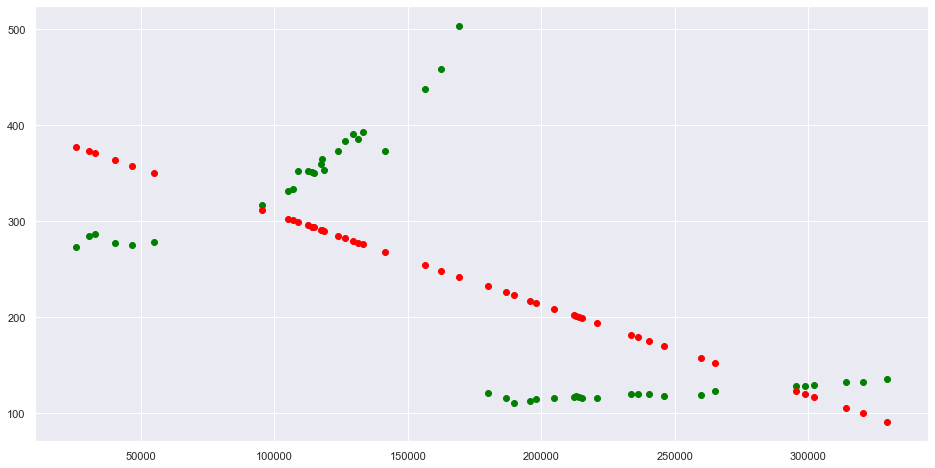

Mean Squared Error (MSE) 	: 8490.474497041629


In [198]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 3) Predicting APPL Prices using Positive Cases

Intercept of Regression 	: b =  [356.22654614]
Coefficients of Regression 	: a =  [[-1.61700197e-05]]



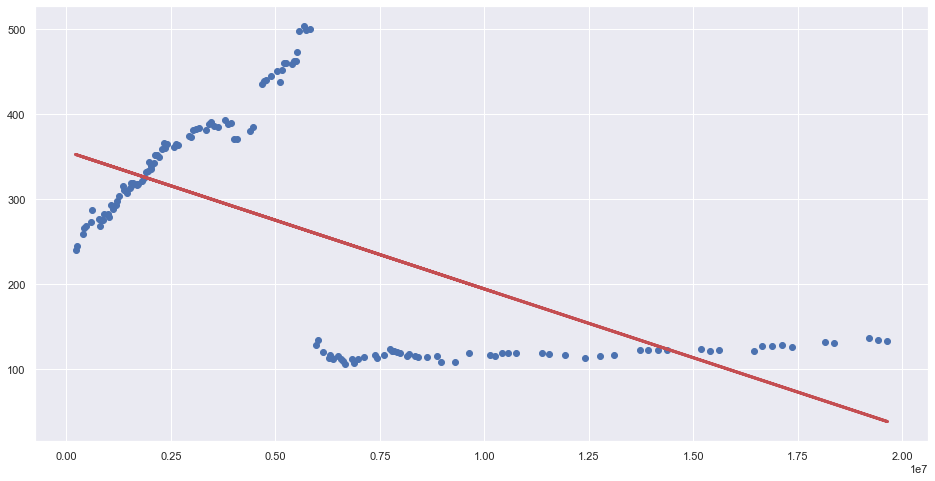

Explained Variance (R^2) 	: 0.3906887958955215
Mean Squared Error (MSE) 	: 10017.989411481813


In [199]:
# Response: AAPL_Prices
# Predictor: Positive_Cases
X_train, X_test, y_train, y_test = train_test_split(Positive_Cases, AAPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

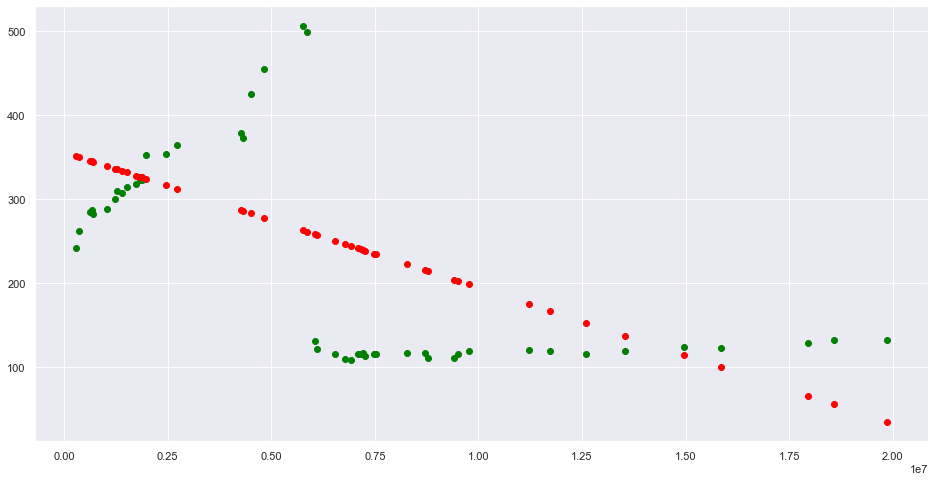

Mean Squared Error (MSE) 	: 10150.448428767406


In [200]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 4) Predicting APPL Prices using Positive Increased

Intercept of Regression 	: b =  [308.83702932]
Coefficients of Regression 	: a =  [[-0.00052662]]



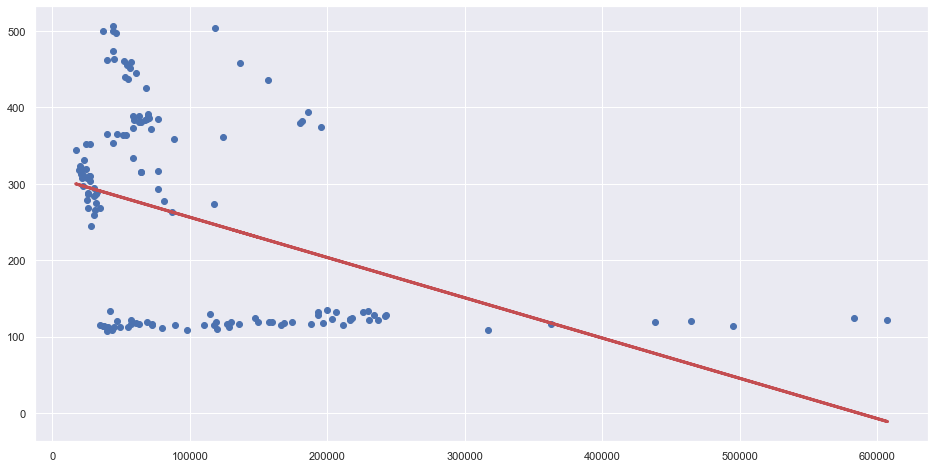

Explained Variance (R^2) 	: 0.1815768816531549
Mean Squared Error (MSE) 	: 14024.790743004423


In [201]:
# Response: AAPL_Prices
# Predictor: Positive_Increased
X_train, X_test, y_train, y_test = train_test_split(Positive_Increased, AAPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

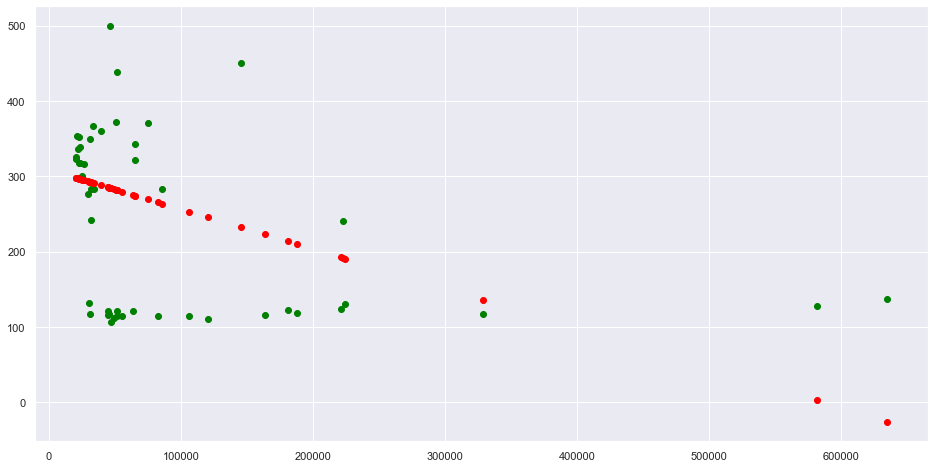

Mean Squared Error (MSE) 	: 12936.730065742924


In [202]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 5) Predicting APPL Prices using Total Testing

Intercept of Regression 	: b =  [356.39006775]
Coefficients of Regression 	: a =  [[-1.18022319e-06]]



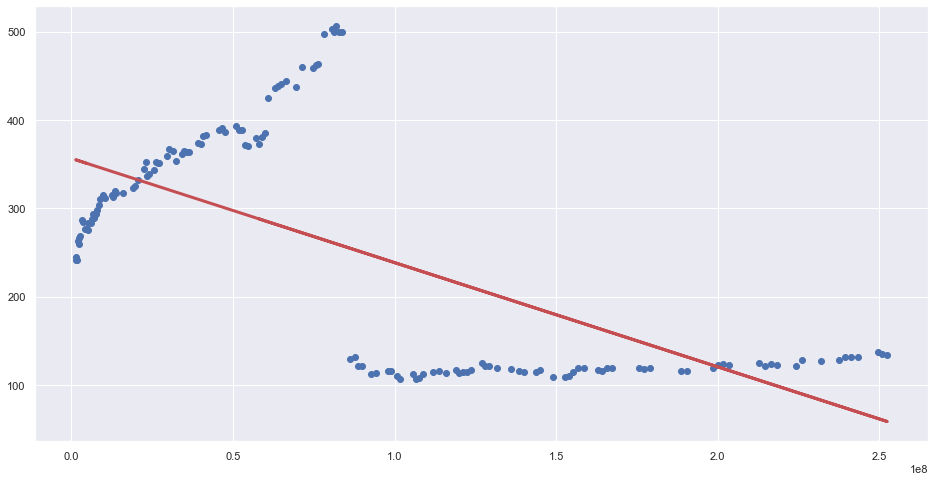

Explained Variance (R^2) 	: 0.4406489859323055
Mean Squared Error (MSE) 	: 9343.773701519078


In [203]:
# Response: AAPL_Prices
# Predictor: Total_Testing
X_train, X_test, y_train, y_test = train_test_split(Total_Testing, AAPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

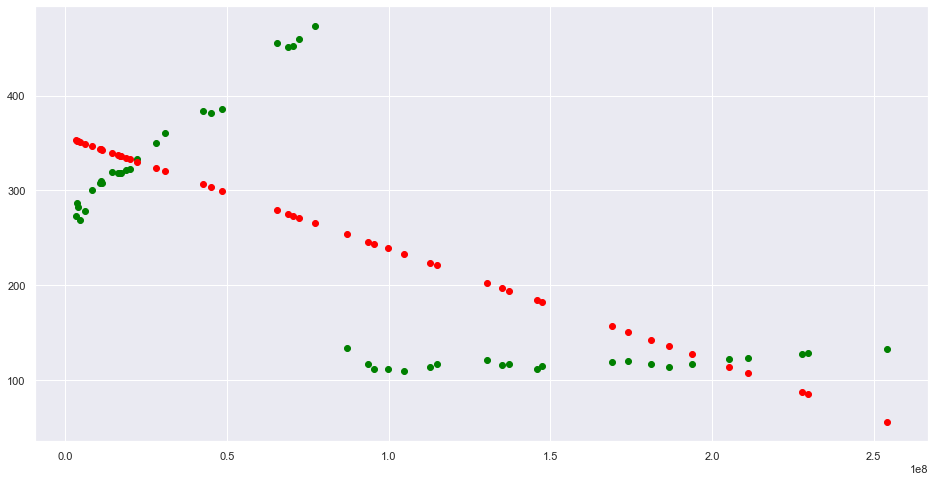

Mean Squared Error (MSE) 	: 7788.809289049728


In [204]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 6) Predicting APPL Prices using Total Increased

Intercept of Regression 	: b =  [317.09709437]
Coefficients of Regression 	: a =  [[-4.45164457e-05]]



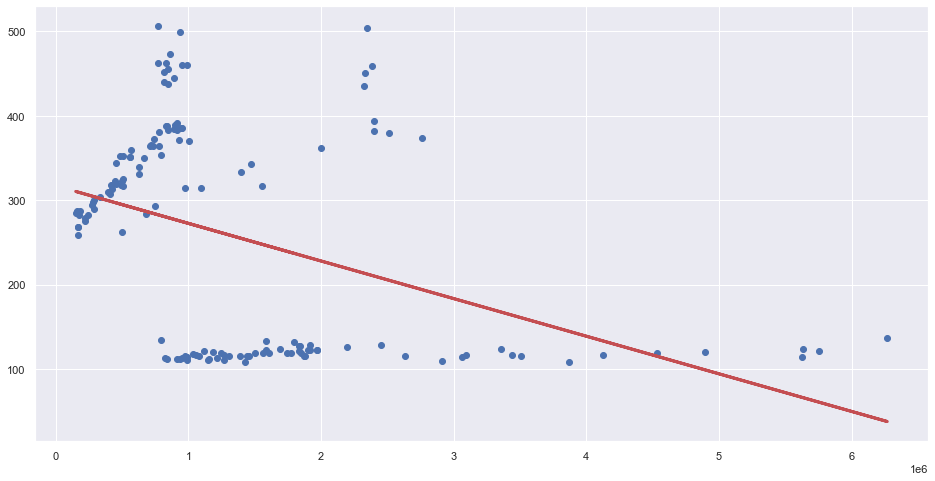

Explained Variance (R^2) 	: 0.16868054807531807
Mean Squared Error (MSE) 	: 13690.028826693535


In [205]:
# Response: AAPL_Prices
# Predictor: Total_Increased
X_train, X_test, y_train, y_test = train_test_split(Total_Increased, AAPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

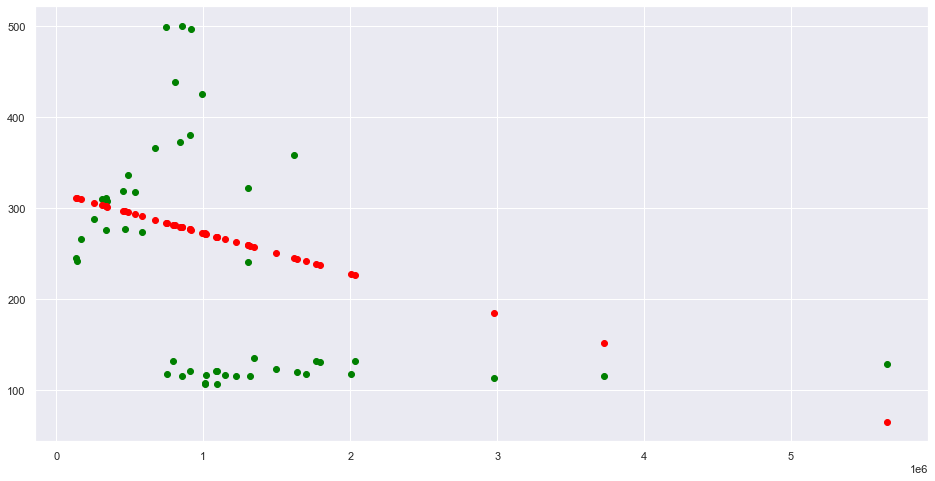

Mean Squared Error (MSE) 	: 14181.921495965476


In [206]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Predicting APPL Price using Multiple Variable

In [207]:
y = AAPL_Prices # Response
X = jointCovid # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Train Set : (143, 6) (143, 1)
Test Set  : (48, 6) (48, 1)
Intercept 	: b =  [210.96468104]
Coefficients 	: a =  [[ 4.10711117e-05  9.02337257e-04  2.58253271e-03 -1.79625404e-02
  -6.92239043e-06 -6.21171581e-05]]


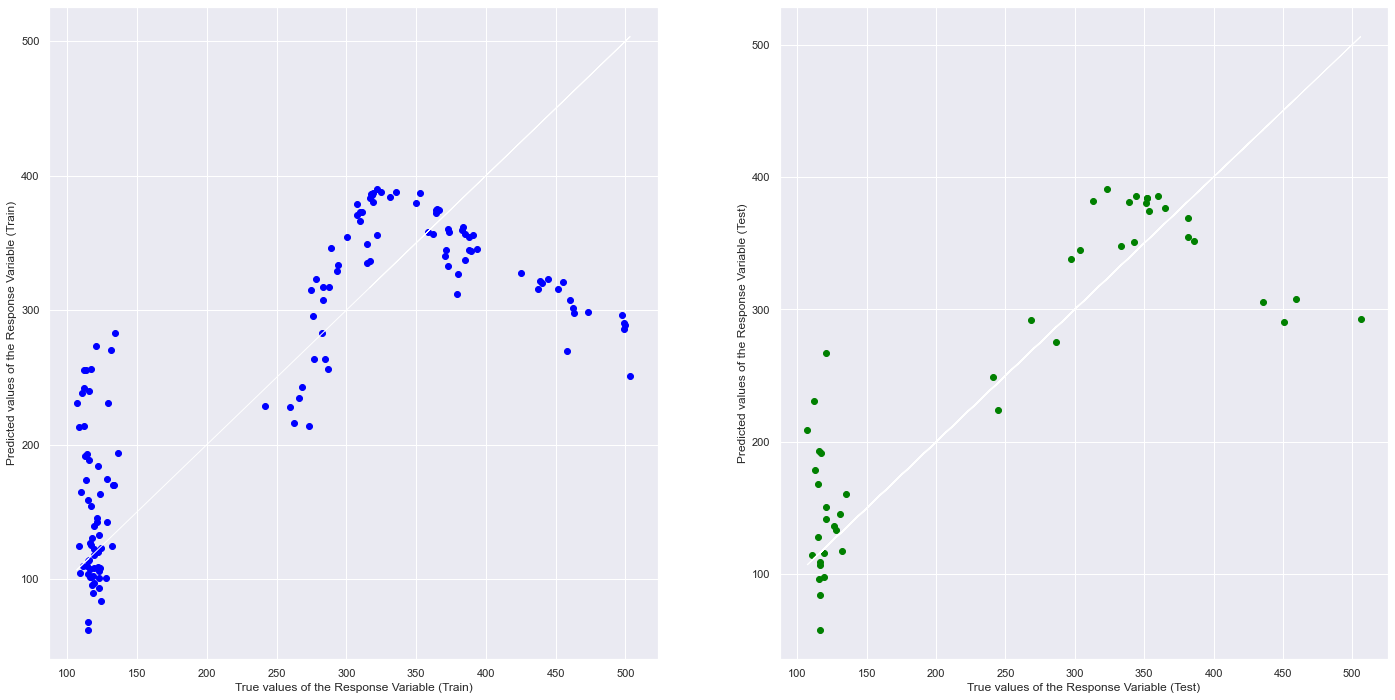

In [208]:
# Predict AAPL Prices values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [209]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.6291983124459407
Mean Squared Error (MSE) on Train Set 	: 6128.137572410061
Mean Squared Error (MSE) on Test Set 	: 4327.19783098123


# 1) Predicting HAL Prices using Death Increased

Intercept of Regression 	: b =  [12.93254064]
Coefficients of Regression 	: a =  [[0.00058559]]



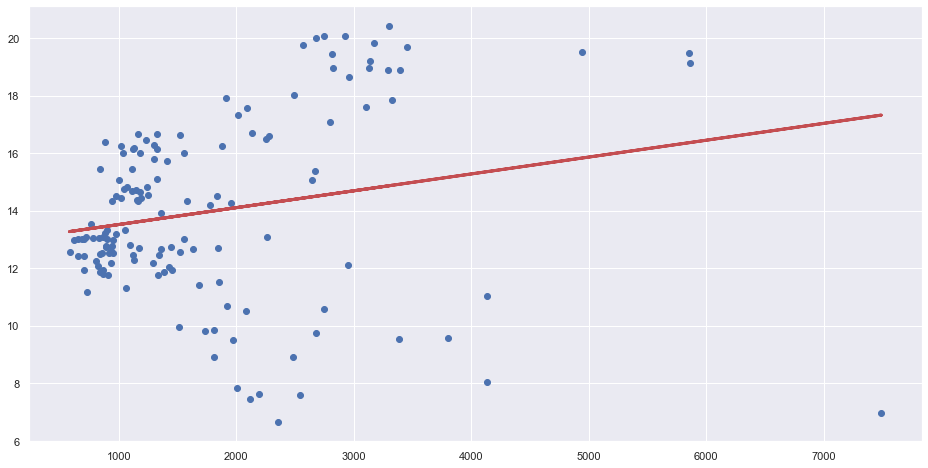

Explained Variance (R^2) 	: 0.04428098532884239
Mean Squared Error (MSE) 	: 9.269452721711493


In [211]:
# Response: HAL_Prices
# Predictor: Death_Increased
X_train, X_test, y_train, y_test = train_test_split(Death_Increased, HAL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

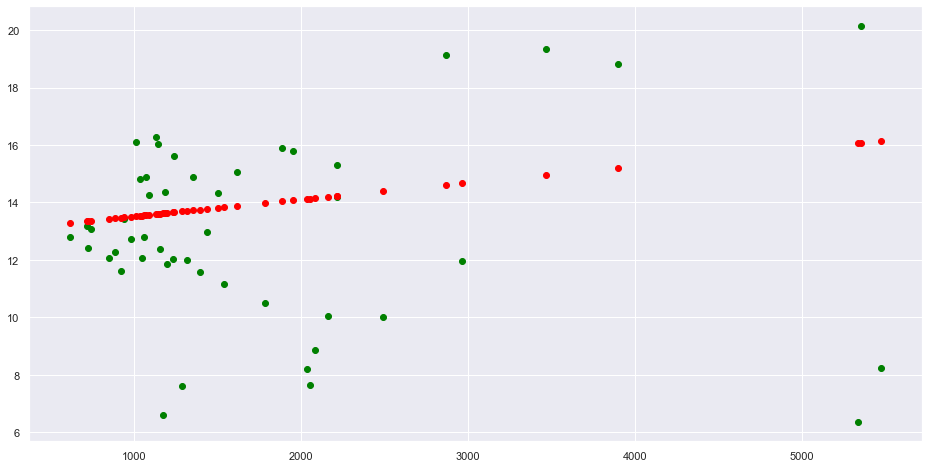

Mean Squared Error (MSE) 	: 11.377651571837793


In [212]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 2) Predicting HAL Prices using Total Deaths

Intercept of Regression 	: b =  [8.3860183]
Coefficients of Regression 	: a =  [[3.29568804e-05]]



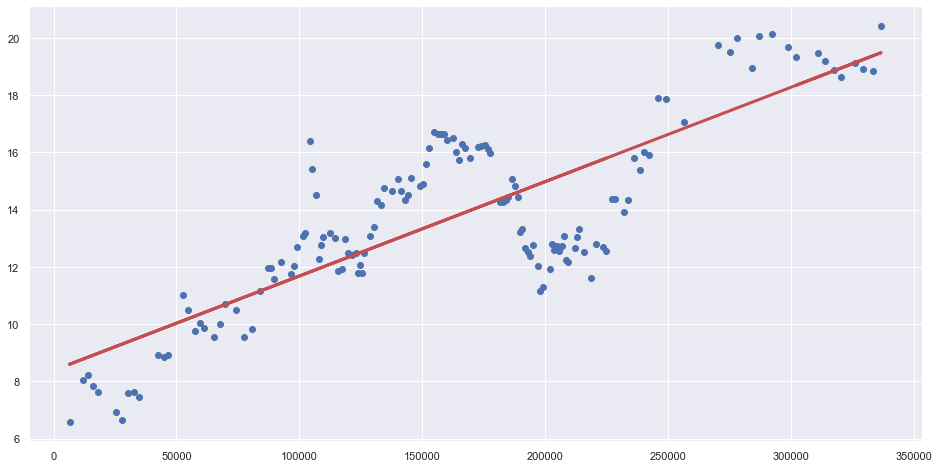

Explained Variance (R^2) 	: 0.6712328009664836
Mean Squared Error (MSE) 	: 3.3193519326812497


In [213]:
# Response: HAL_Prices
# Predictor: Total_Deaths
X_train, X_test, y_train, y_test = train_test_split(Total_Deaths, HAL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

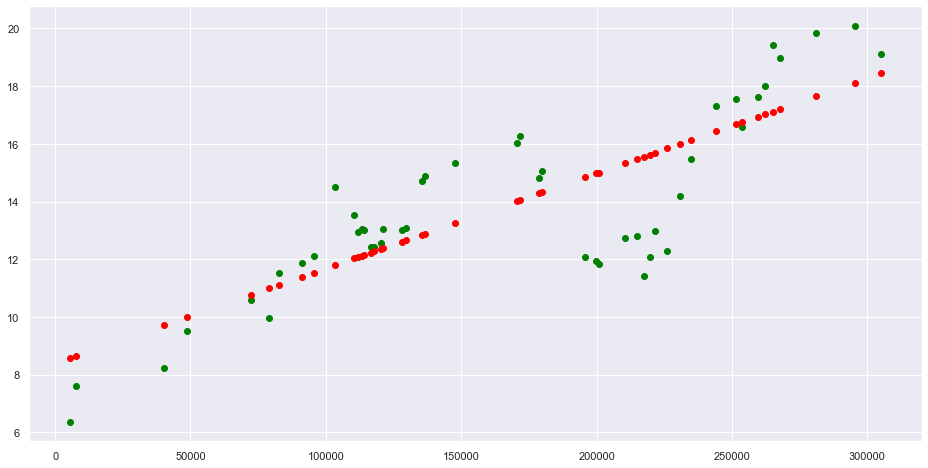

Mean Squared Error (MSE) 	: 3.3239673266856165


In [214]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 3) Predicting HAL Prices using Positive Cases

Intercept of Regression 	: b =  [10.89575386]
Coefficients of Regression 	: a =  [[4.64571606e-07]]



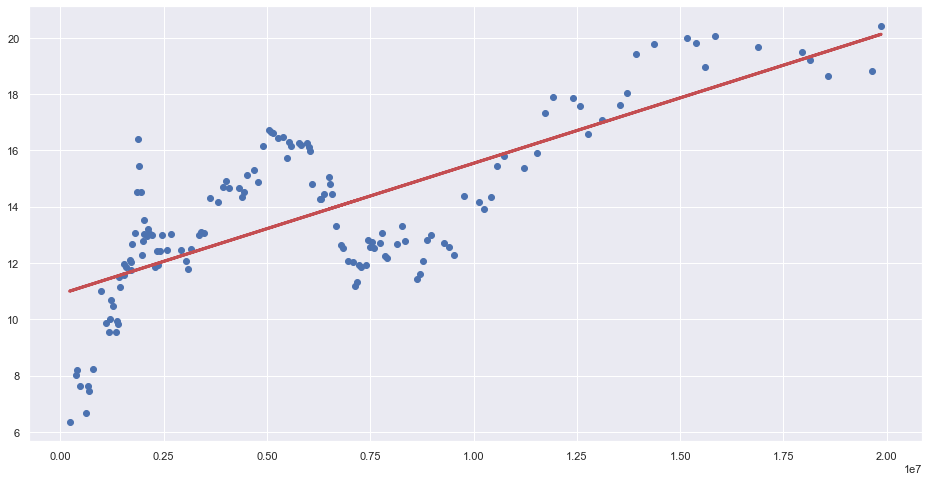

Explained Variance (R^2) 	: 0.5547441542000706
Mean Squared Error (MSE) 	: 3.7814040522394246


In [215]:
# Response: HAL_Prices
# Predictor: Positive_Cases
X_train, X_test, y_train, y_test = train_test_split(Positive_Cases, HAL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

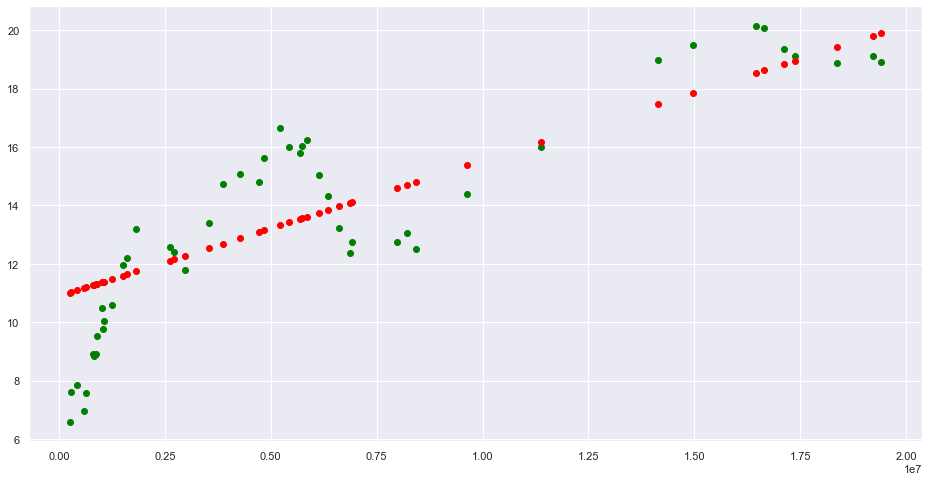

Mean Squared Error (MSE) 	: 3.9223663810122917


In [216]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 4) Predicting HAL Prices using Positive Increased

Intercept of Regression 	: b =  [11.93416191]
Coefficients of Regression 	: a =  [[1.5672881e-05]]



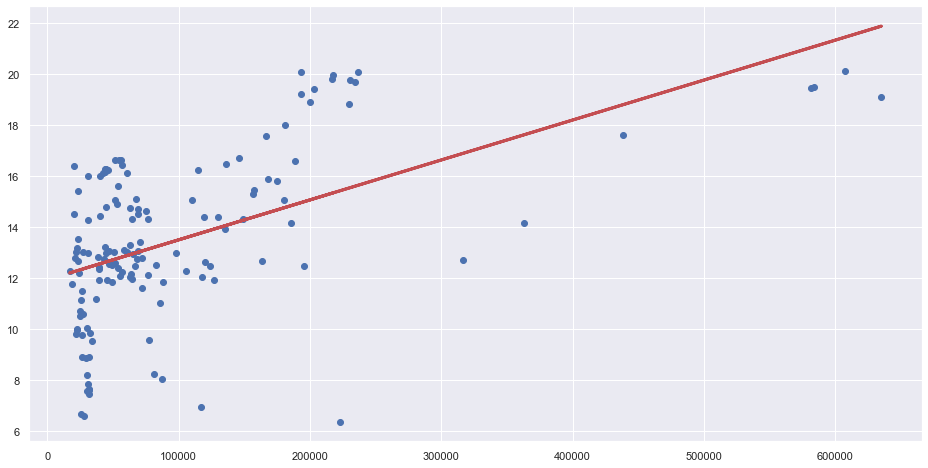

Explained Variance (R^2) 	: 0.2959295992976826
Mean Squared Error (MSE) 	: 7.318972179049345


In [217]:
# Response: HAL_Prices
# Predictor: Positive_Increased
X_train, X_test, y_train, y_test = train_test_split(Positive_Increased, HAL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

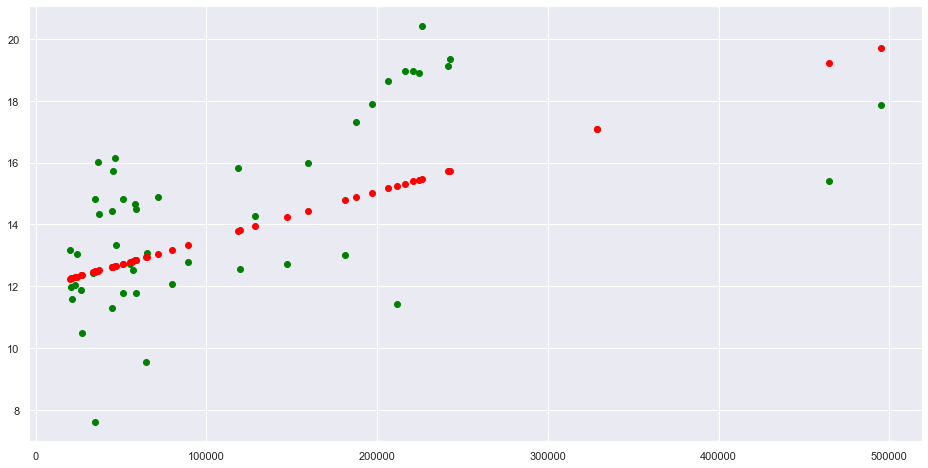

Mean Squared Error (MSE) 	: 5.54241505400586


In [218]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 5) Predicting HAL Prices using Total Testing

Intercept of Regression 	: b =  [10.68727566]
Coefficients of Regression 	: a =  [[3.33892133e-08]]



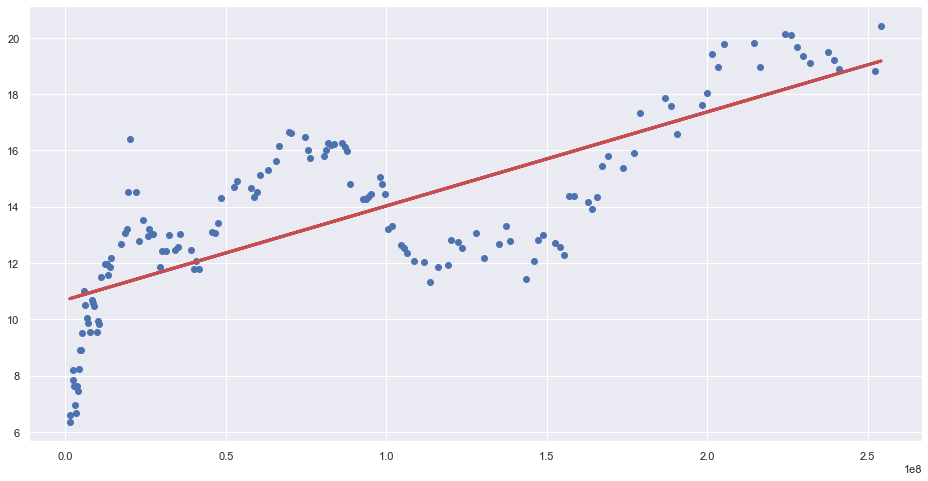

In [219]:
# Response: HAL_Prices
# Predictor: Total_Testing
X_train, X_test, y_train, y_test = train_test_split(Total_Testing, HAL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [220]:
# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.581071200181285
Mean Squared Error (MSE) 	: 4.275996450804964


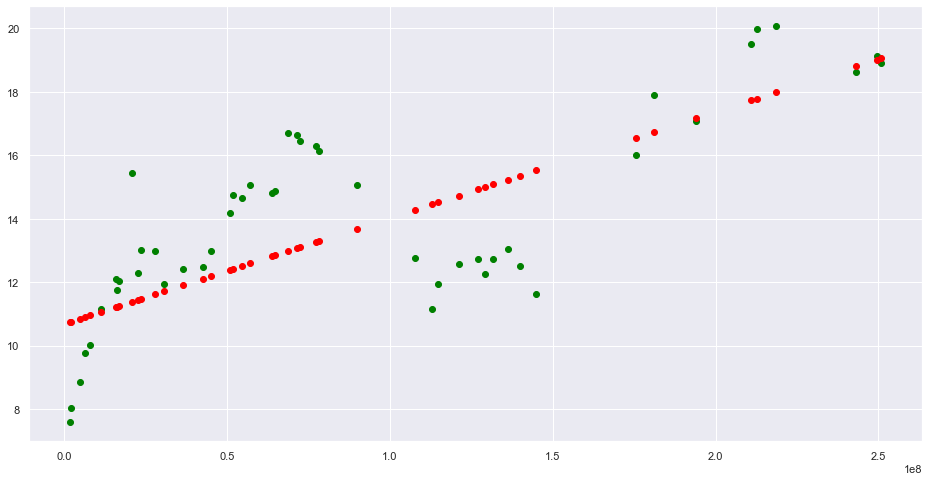

Mean Squared Error (MSE) 	: 4.517655035468718


In [221]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 6) Predicting HAL Prices using Total Increased

Intercept of Regression 	: b =  [12.11101351]
Coefficients of Regression 	: a =  [[1.28942283e-06]]



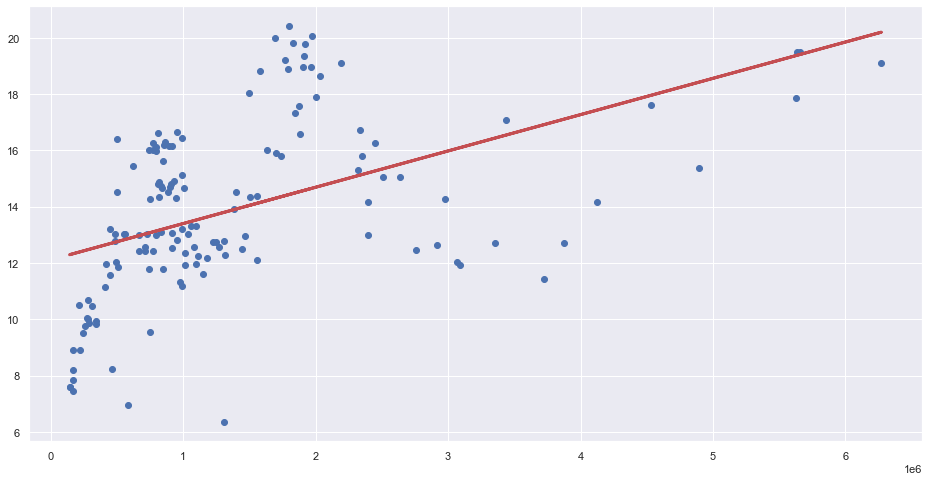

Explained Variance (R^2) 	: 0.2424540618578842
Mean Squared Error (MSE) 	: 7.332105900682274


In [222]:
# Response: HAL_Prices
# Predictor: Total_Increased
X_train, X_test, y_train, y_test = train_test_split(Total_Increased, HAL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

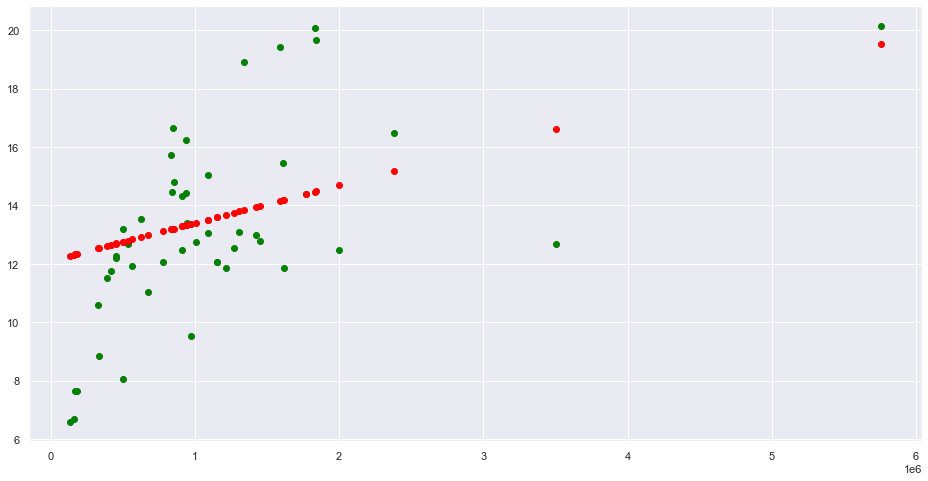

Mean Squared Error (MSE) 	: 7.552255695222892


In [223]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Predicting HAL Price using Multiple Variable

In [114]:
y = HAL_Prices # Response
X = jointCovid # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Train Set : (143, 6) (143, 1)
Test Set  : (48, 6) (48, 1)
Intercept 	: b =  [6.2535138]
Coefficients 	: a =  [[ 1.42049610e-06  1.13959981e-05  6.85587087e-05 -2.97900676e-04
  -1.40058065e-07 -5.76948254e-07]]


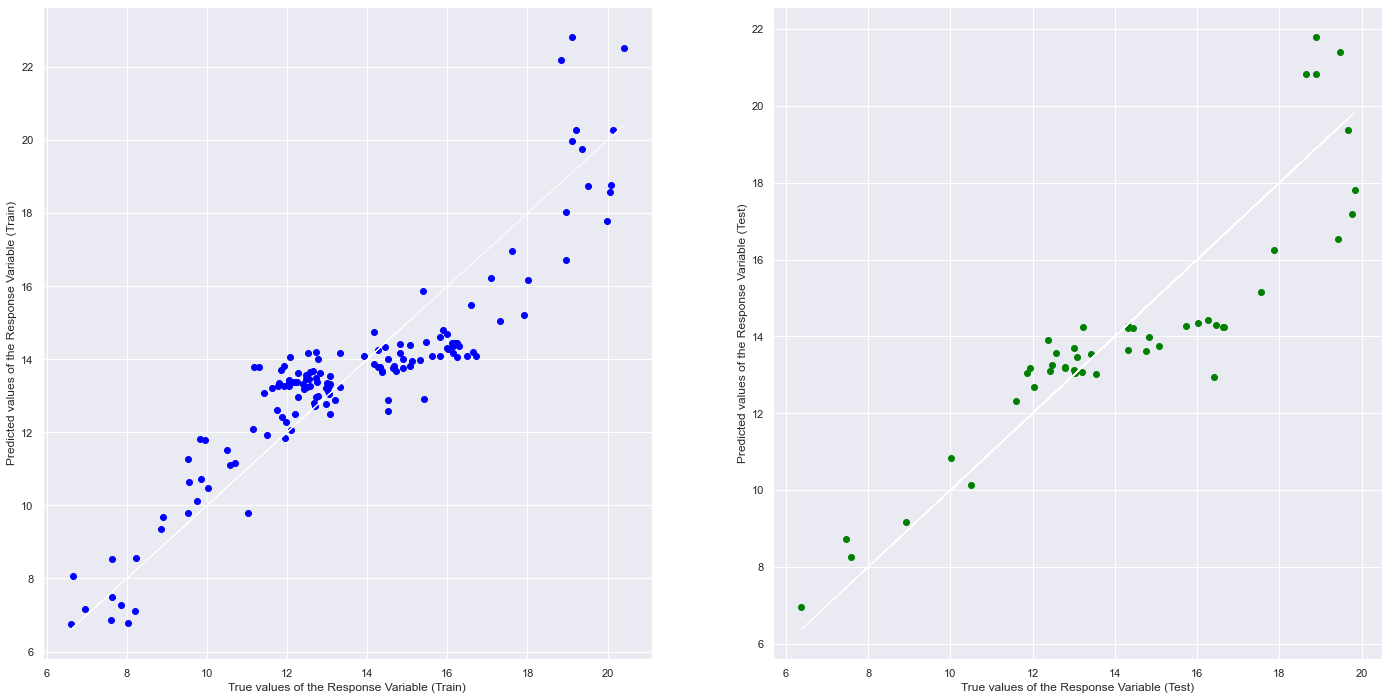

In [116]:
# Predict HAL Prices values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True "values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [117]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8244341710236867
Mean Squared Error (MSE) on Train Set 	: 1.6721986595593517
Mean Squared Error (MSE) on Test Set 	: 2.142986104001899


# 1) Predicting PYPL Prices using Death Increased

Intercept of Regression 	: b =  [172.54054441]
Coefficients of Regression 	: a =  [[0.00372785]]



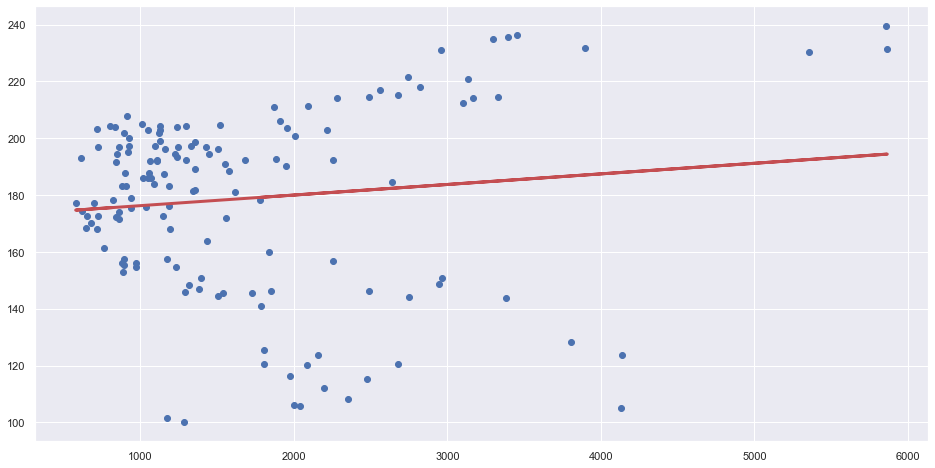

Explained Variance (R^2) 	: 0.013770097475130694
Mean Squared Error (MSE) 	: 1019.6411860397186


In [224]:
# Response: PYPL_Prices
# Predictor: Death_Increased
X_train, X_test, y_train, y_test = train_test_split(Death_Increased, PYPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

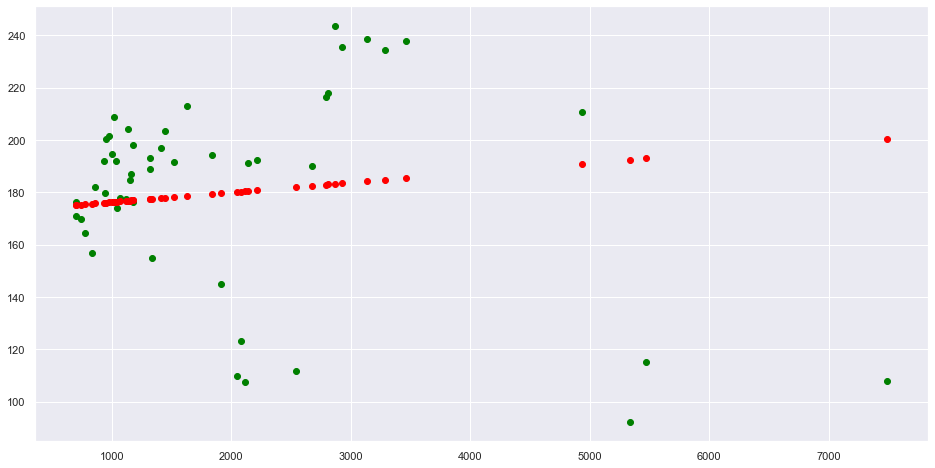

Mean Squared Error (MSE) 	: 1466.4106817484105


In [225]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 2) Predicting PYPL Prices using Total Deaths

Intercept of Regression 	: b =  [114.34032179]
Coefficients of Regression 	: a =  [[0.00039704]]



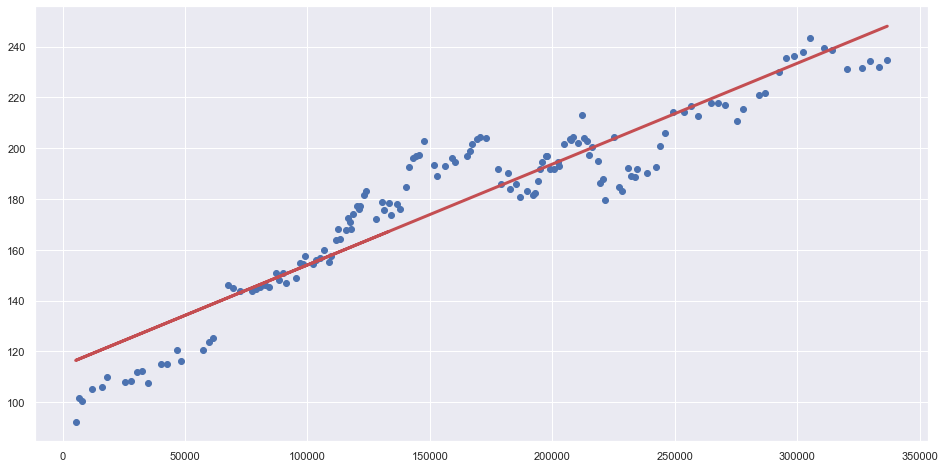

Explained Variance (R^2) 	: 0.8813576611939345
Mean Squared Error (MSE) 	: 144.98460510114273


In [226]:
# Response: PYPL_Prices
# Predictor: Total_Deaths
X_train, X_test, y_train, y_test = train_test_split(Total_Deaths, PYPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

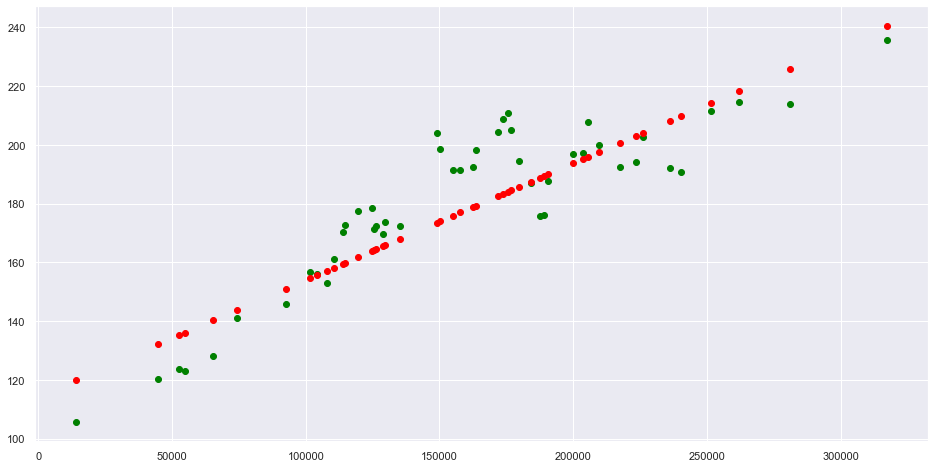

Mean Squared Error (MSE) 	: 169.45074214421274


In [227]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 3) Predicting PYPL Prices using Positive Cases

Intercept of Regression 	: b =  [145.97647702]
Coefficients of Regression 	: a =  [[5.38070146e-06]]



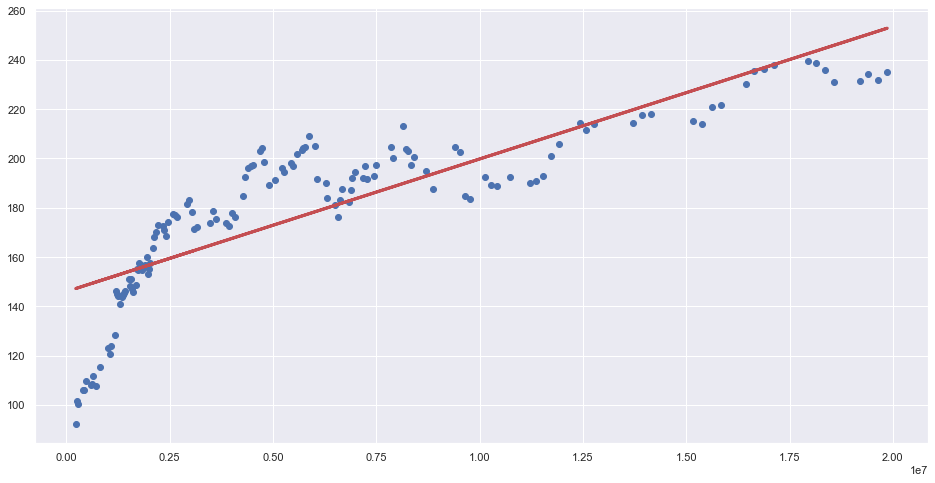

Explained Variance (R^2) 	: 0.7073580674638438
Mean Squared Error (MSE) 	: 332.55238529141604


In [228]:
# Response: PYPL_Prices
# Predictor: Positive_Cases
X_train, X_test, y_train, y_test = train_test_split(Positive_Cases, PYPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

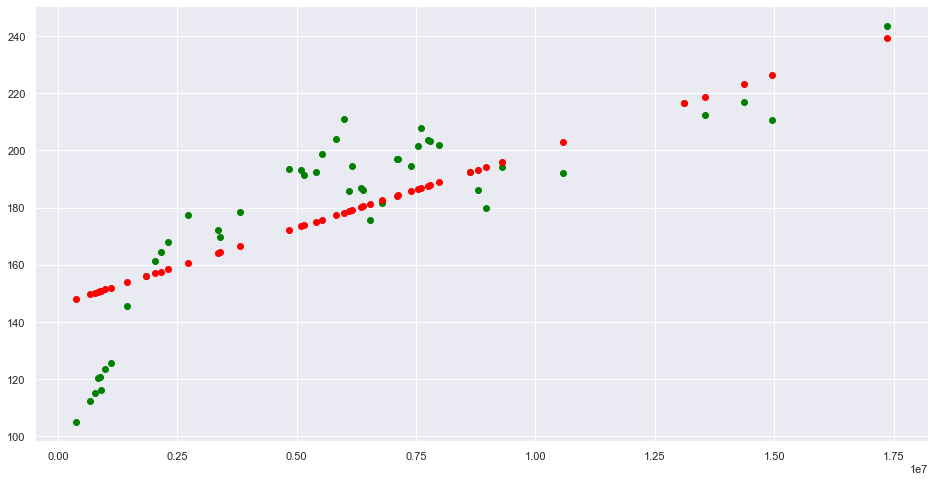

Mean Squared Error (MSE) 	: 340.4310554458449


In [229]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 4) Predicting PYPL Prices using Positive Increased

Intercept of Regression 	: b =  [163.26463487]
Coefficients of Regression 	: a =  [[0.00015311]]



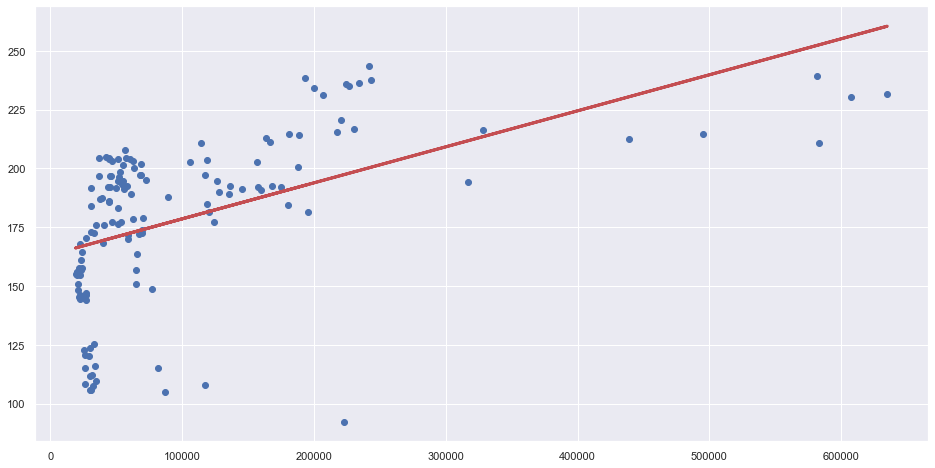

Explained Variance (R^2) 	: 0.2755840886888091
Mean Squared Error (MSE) 	: 854.4136215577147


In [230]:
# Response: PYPL_Prices
# Predictor: Positive_Increased
X_train, X_test, y_train, y_test = train_test_split(Positive_Increased, PYPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

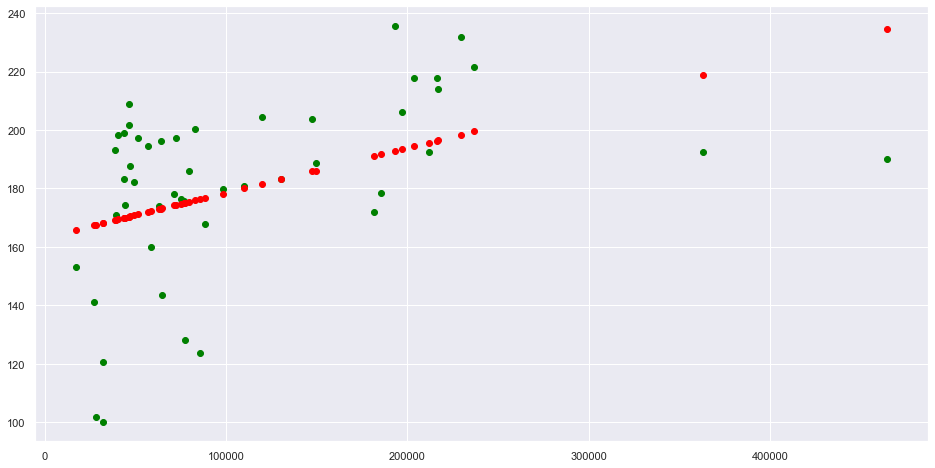

Mean Squared Error (MSE) 	: 737.9383478899605


In [231]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 5) Predicting PYPL Prices using Total Testing

Intercept of Regression 	: b =  [146.07067985]
Coefficients of Regression 	: a =  [[3.85954101e-07]]



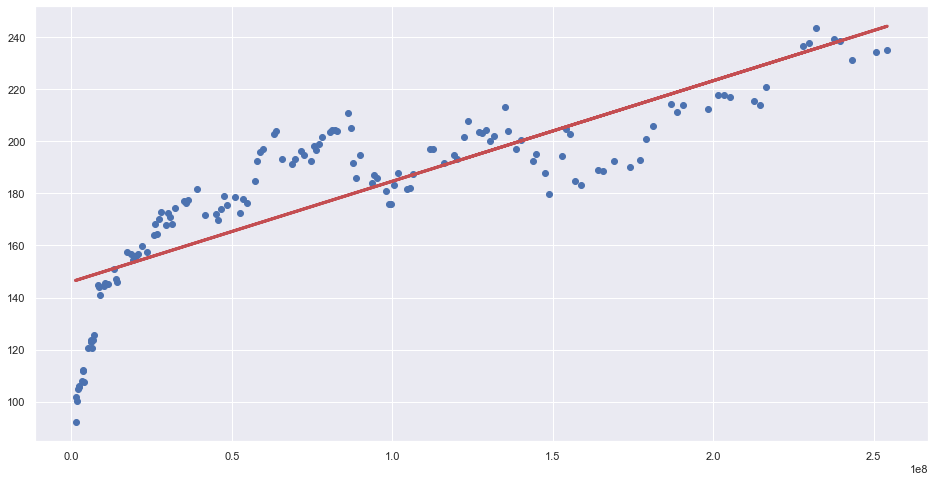

In [232]:
# Response: PYPL_Prices
# Predictor: Total_Testing
X_train, X_test, y_train, y_test = train_test_split(Total_Testing, PYPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

In [233]:
# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

Explained Variance (R^2) 	: 0.6895152025538169
Mean Squared Error (MSE) 	: 328.4501119684173


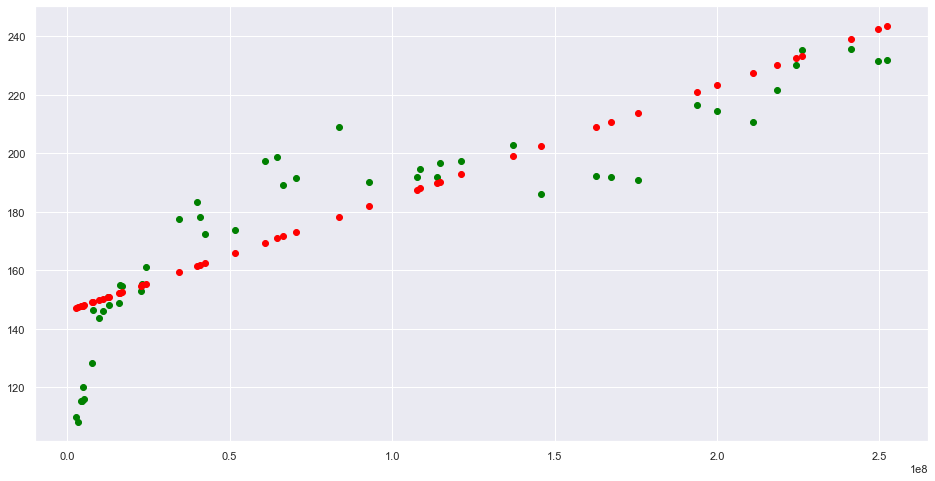

Mean Squared Error (MSE) 	: 293.0827395235444


In [234]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 6) Predicting PYPL Prices using Total Increased

Intercept of Regression 	: b =  [153.82937684]
Coefficients of Regression 	: a =  [[1.81443966e-05]]



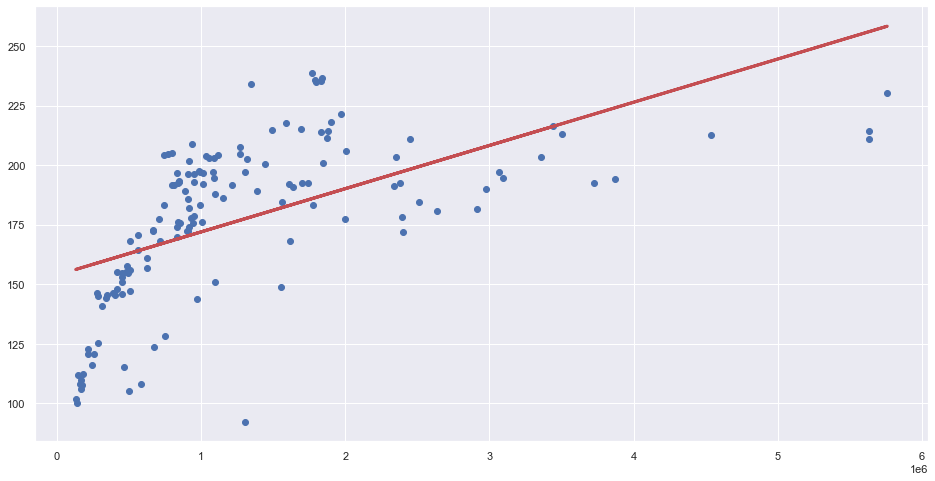

Explained Variance (R^2) 	: 0.3313136080747766
Mean Squared Error (MSE) 	: 766.2014083400203


In [235]:
# Response: PYPL_Prices
# Predictor: Total_Increased
X_train, X_test, y_train, y_test = train_test_split(Total_Increased, PYPL_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

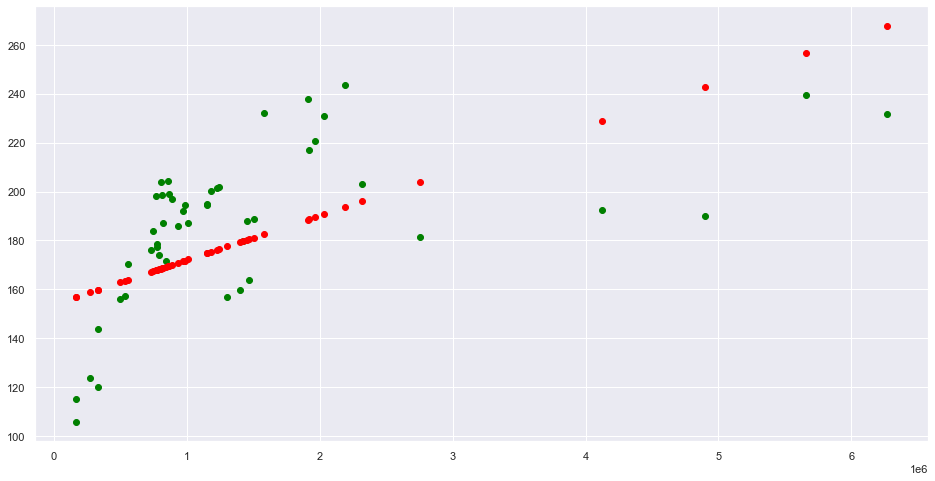

Mean Squared Error (MSE) 	: 762.4561669268045


In [236]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Predicting PYPL Price using Multiple Variable

In [237]:
y = PYPL_Prices # Response
X = jointCovid # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Train Set : (143, 6) (143, 1)
Test Set  : (48, 6) (48, 1)
Intercept 	: b =  [91.00858372]
Coefficients 	: a =  [[ 4.58352278e-06  2.52573361e-07  7.75103360e-04 -1.77855715e-03
  -7.37883776e-07  2.15598835e-06]]


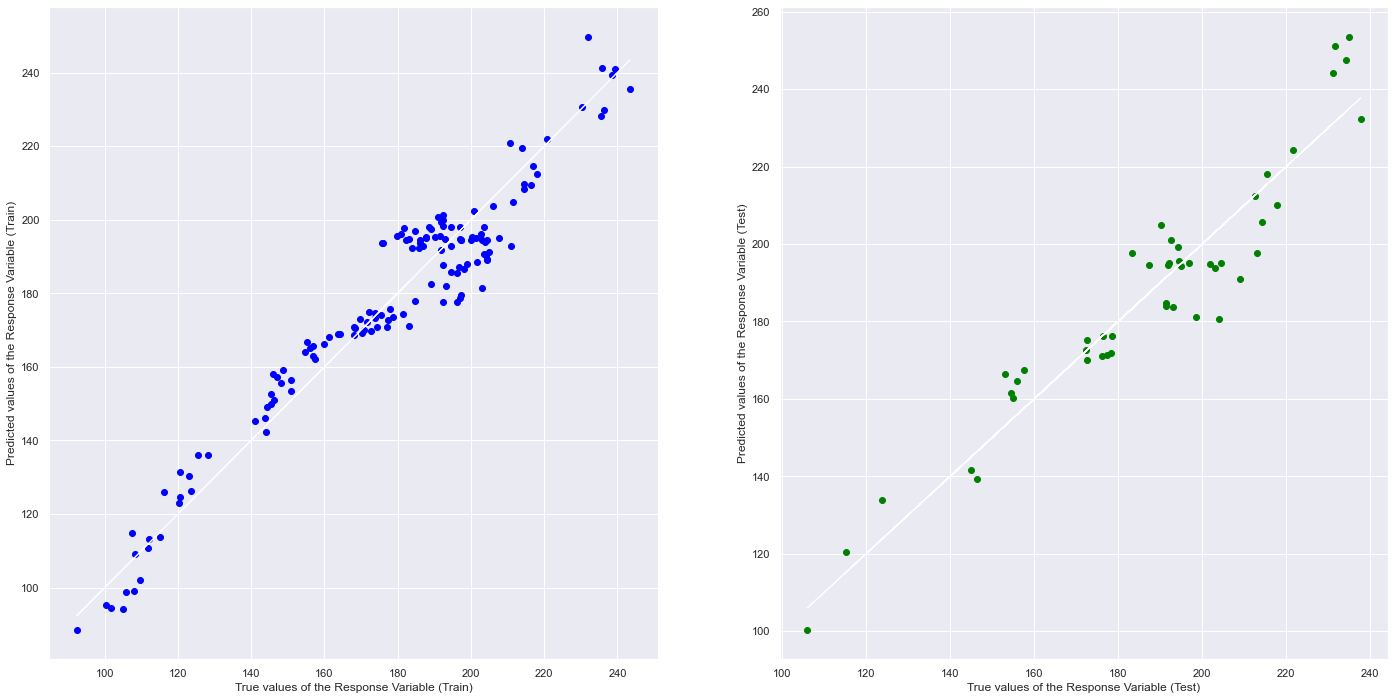

In [238]:
# Predict PYPL Prices values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [239]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.935950117069722
Mean Squared Error (MSE) on Train Set 	: 74.03471996386145
Mean Squared Error (MSE) on Test Set 	: 92.67990564234263


# 1) Predicting SINGF Prices using Death Increased

Intercept of Regression 	: b =  [2.5917722]
Coefficients of Regression 	: a =  [[0.00023468]]



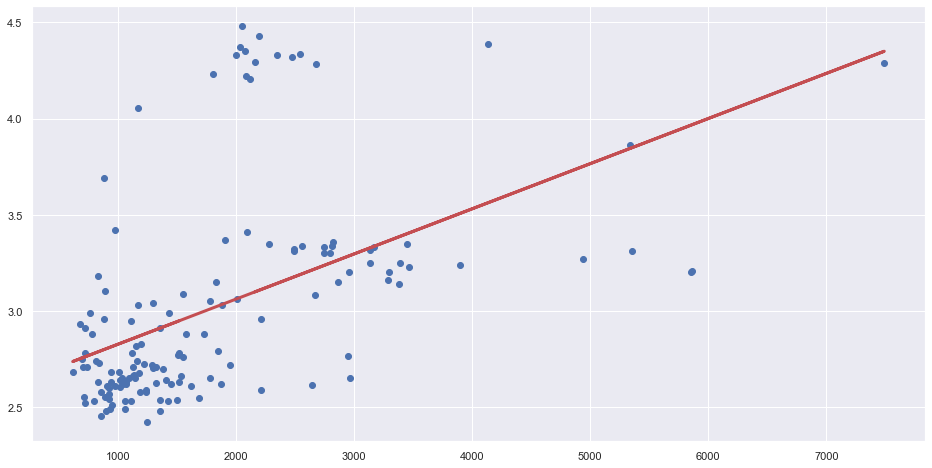

Explained Variance (R^2) 	: 0.2556283855086595
Mean Squared Error (MSE) 	: 0.2183678087683998


In [240]:
# Response: SINGF_Prices
# Predictor: Death_Increased
X_train, X_test, y_train, y_test = train_test_split(Death_Increased, SINGF_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

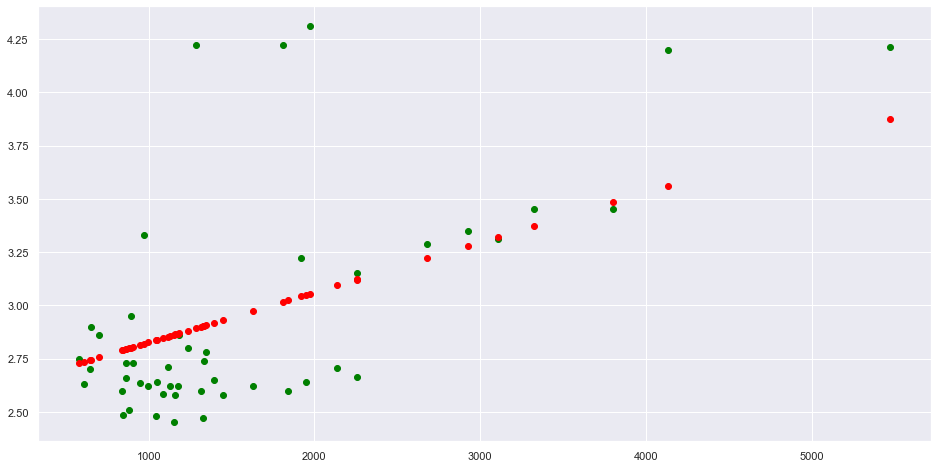

Mean Squared Error (MSE) 	: 0.1661357829898281


In [241]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 2) Predicting SINGF Prices using Total Deaths

Intercept of Regression 	: b =  [3.45774842]
Coefficients of Regression 	: a =  [[-2.80821806e-06]]



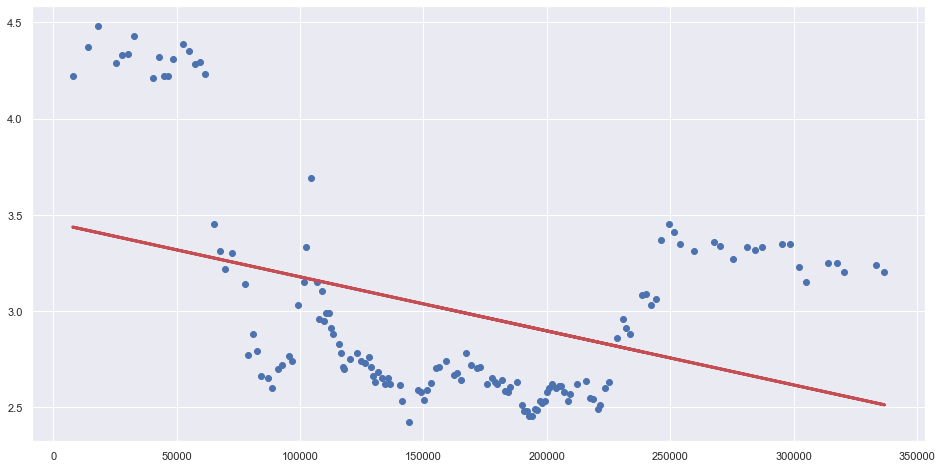

Explained Variance (R^2) 	: 0.1520270534828252
Mean Squared Error (MSE) 	: 0.26165221960506374


In [245]:
# Response: SINGF_Prices
# Predictor: Total_Deaths
X_train, X_test, y_train, y_test = train_test_split(Total_Deaths, SINGF_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

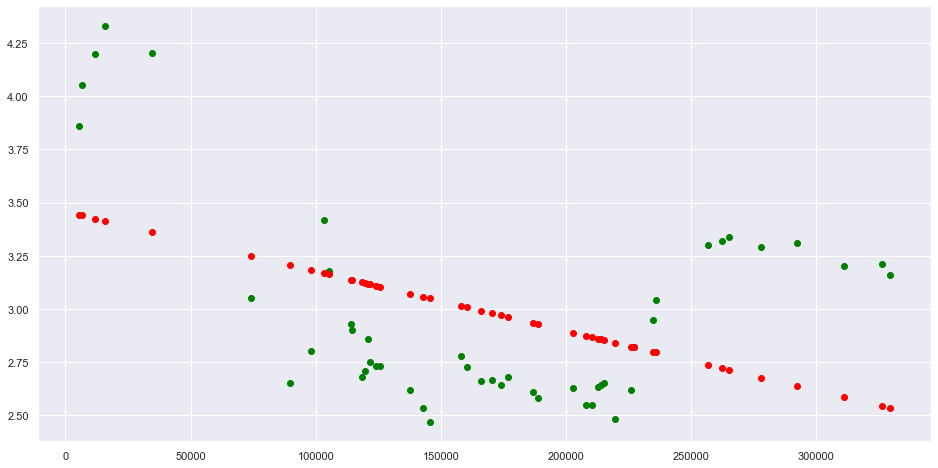

Mean Squared Error (MSE) 	: 0.1994014961778332


In [246]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 3) Predicting SINGF Prices using Positive Cases

Intercept of Regression 	: b =  [3.14118525]
Coefficients of Regression 	: a =  [[-2.18877964e-08]]



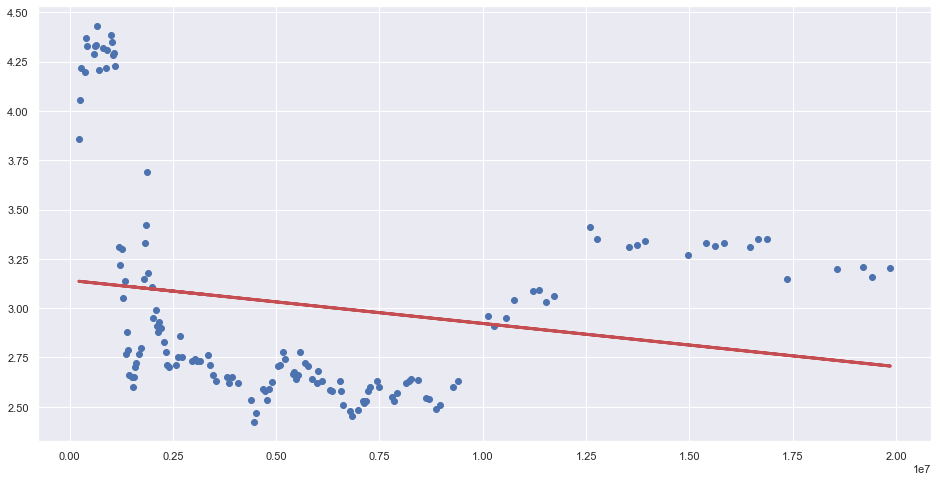

Explained Variance (R^2) 	: 0.03603798586692708
Mean Squared Error (MSE) 	: 0.29975894478780946


In [247]:
# Response: SINGF_Prices
# Predictor: Positive_Cases
X_train, X_test, y_train, y_test = train_test_split(Positive_Cases, SINGF_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

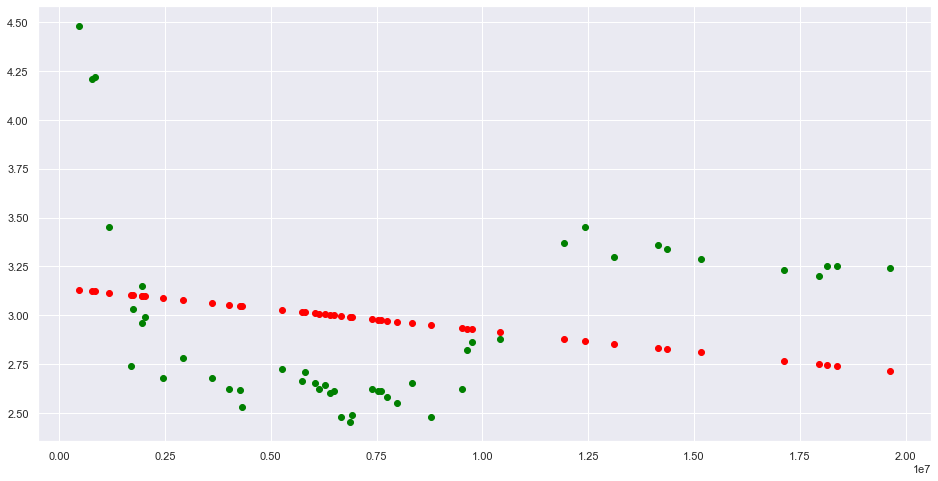

Mean Squared Error (MSE) 	: 0.23492965501751617


In [248]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 4) Predicting SINGF Prices using Positive Increased

Intercept of Regression 	: b =  [2.94380021]
Coefficients of Regression 	: a =  [[4.37331688e-07]]



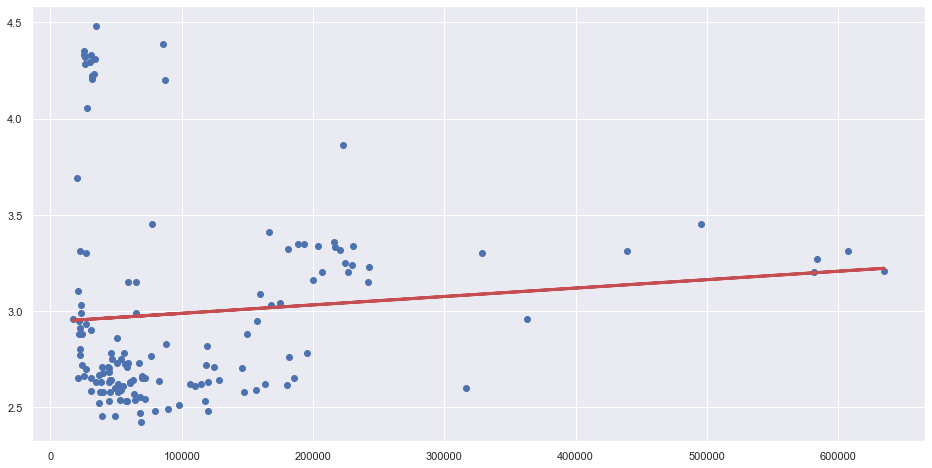

Explained Variance (R^2) 	: 0.009714853733180706
Mean Squared Error (MSE) 	: 0.27623756070693134


In [249]:
# Response: SINGF_Prices
# Predictor: Positive_Increased
X_train, X_test, y_train, y_test = train_test_split(Positive_Increased, SINGF_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

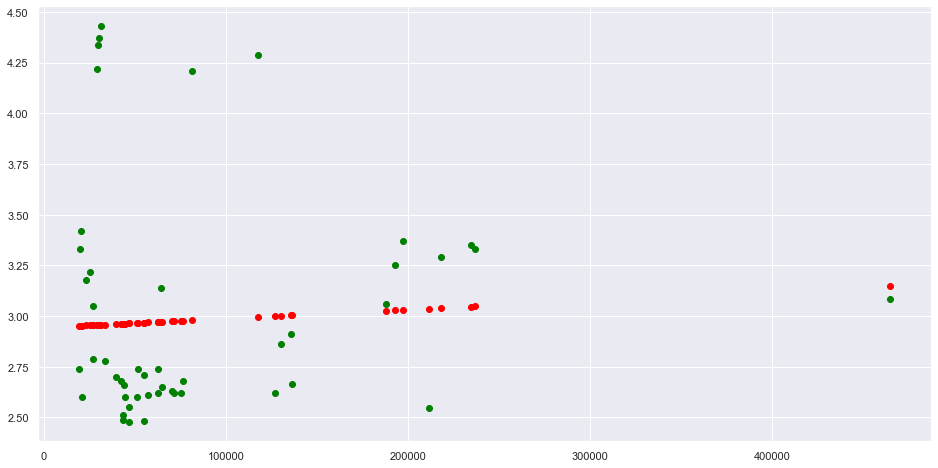

Mean Squared Error (MSE) 	: 0.31453447820850394


In [250]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 5) Predicting SINGF Prices using Total Testing

Intercept of Regression 	: b =  [3.14532782]
Coefficients of Regression 	: a =  [[-1.6359145e-09]]



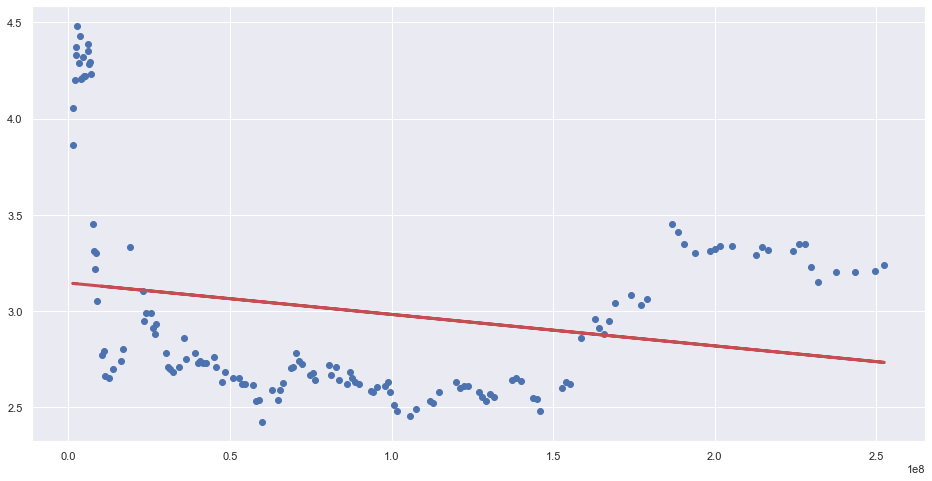

Explained Variance (R^2) 	: 0.045200405679226785
Mean Squared Error (MSE) 	: 0.2872831076533999


In [251]:
# Response: SINGF_Prices
# Predictor: Total_Testing
X_train, X_test, y_train, y_test = train_test_split(Total_Testing, SINGF_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

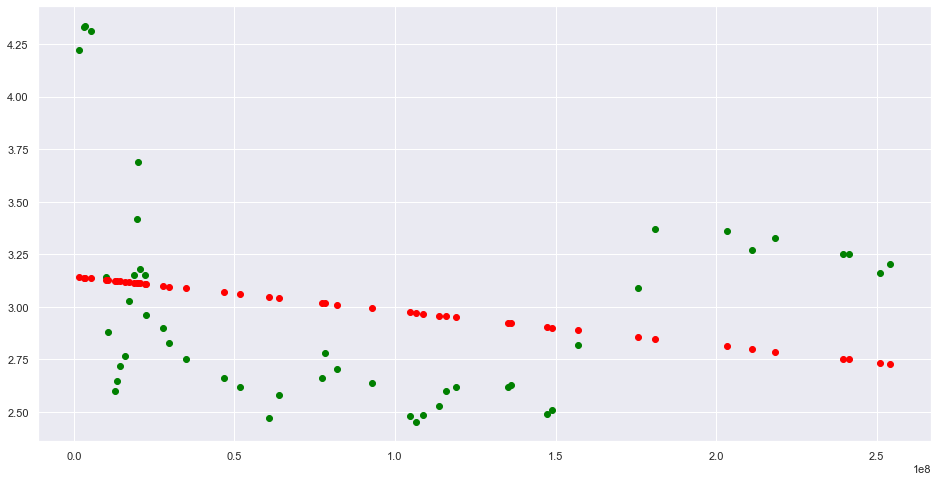

Mean Squared Error (MSE) 	: 0.24871659313641206


In [252]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 6) Predicting SINGF Prices using Total Increased

Intercept of Regression 	: b =  [3.11856043]
Coefficients of Regression 	: a =  [[-9.65180068e-08]]



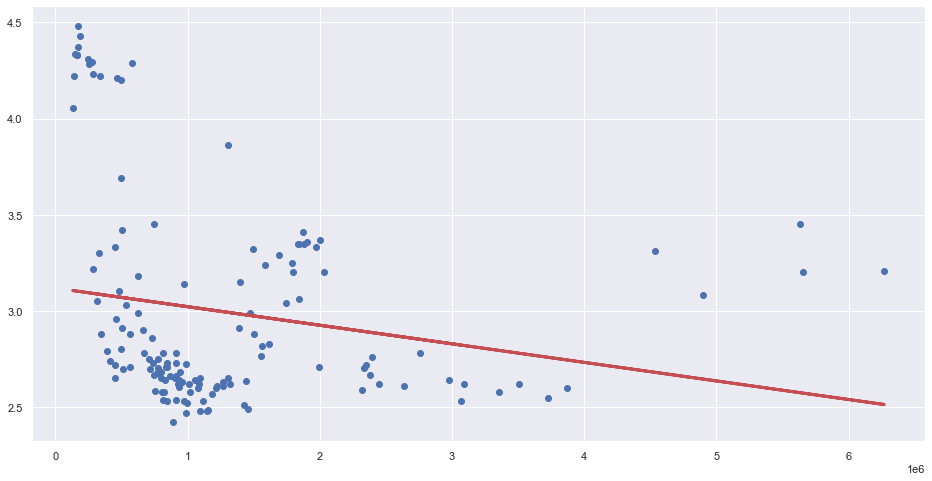

Explained Variance (R^2) 	: 0.03895724156873148
Mean Squared Error (MSE) 	: 0.28018772753078663


In [253]:
# Response: SINGF_Prices
# Predictor: Total_Increased
X_train, X_test, y_train, y_test = train_test_split(Total_Increased, SINGF_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

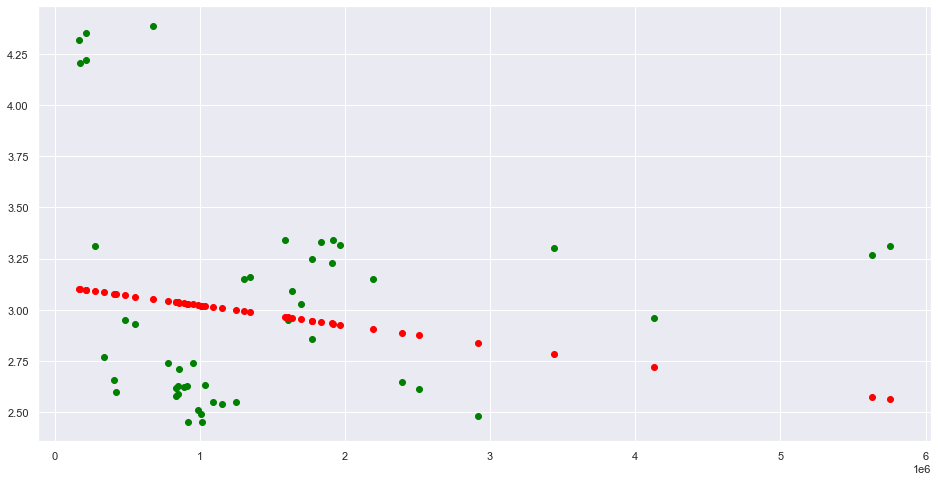

Mean Squared Error (MSE) 	: 0.2867913350006869


In [254]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Predicting SINGF Price using Multiple Variable

In [255]:
y = SINGF_Prices # Response
X = jointCovid # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Train Set : (143, 6) (143, 1)
Test Set  : (48, 6) (48, 1)
Intercept 	: b =  [4.745102]
Coefficients 	: a =  [[ 2.32010839e-07 -2.66194178e-07 -2.38436117e-05 -1.74877899e-05
   7.90928998e-09  2.90911393e-08]]


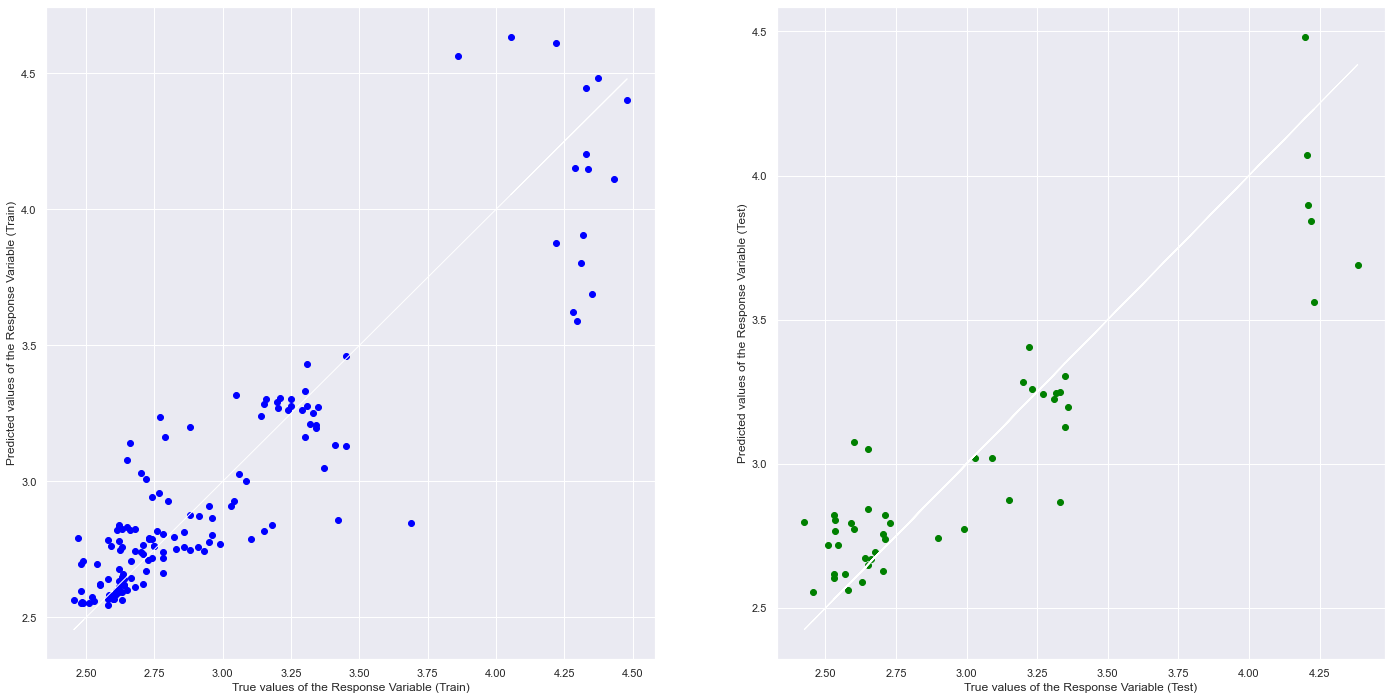

In [256]:
# Predict SINGF Prices values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [257]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8217897436955153
Mean Squared Error (MSE) on Train Set 	: 0.05030532957618299
Mean Squared Error (MSE) on Test Set 	: 0.05727542715097169


# 1) Predicting TSLA Prices using Death Increased

Intercept of Regression 	: b =  [931.64771735]
Coefficients of Regression 	: a =  [[-0.05841305]]



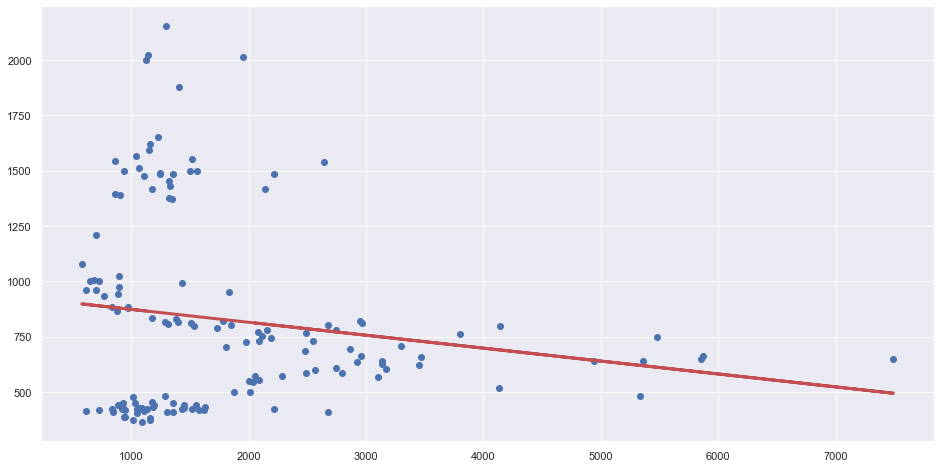

Explained Variance (R^2) 	: 0.02629048049997096
Mean Squared Error (MSE) 	: 182393.4015772483


In [258]:
# Response: TSLA_Prices
# Predictor: Death_Increased
X_train, X_test, y_train, y_test = train_test_split(Death_Increased, TSLA_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

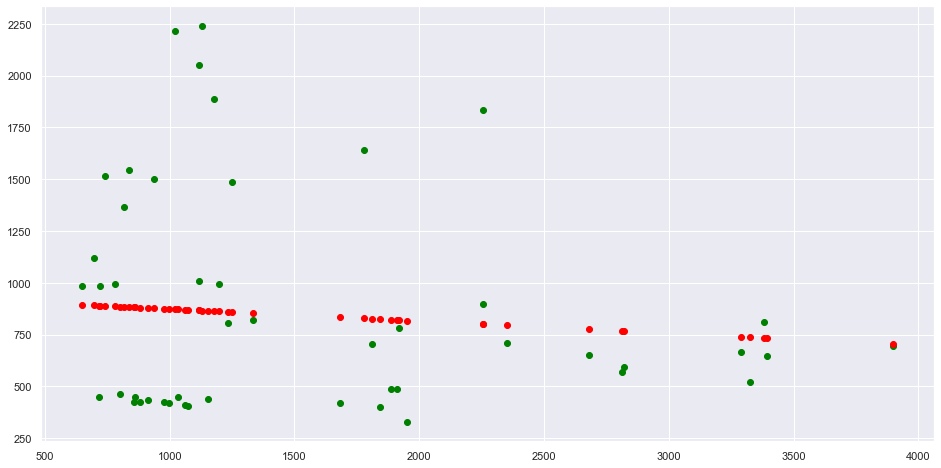

Mean Squared Error (MSE) 	: 275188.74264007027


In [259]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 2) Predicting TSLA Prices using Total Deaths

Intercept of Regression 	: b =  [1115.52699282]
Coefficients of Regression 	: a =  [[-0.00155919]]



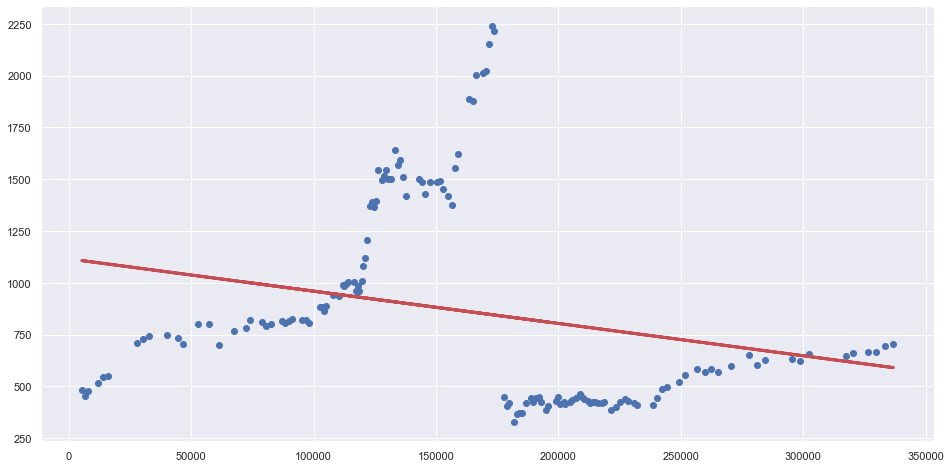

Explained Variance (R^2) 	: 0.06227335805262291
Mean Squared Error (MSE) 	: 214831.9499807705


In [260]:
# Response: TSLA_Prices
# Predictor: Total_Deaths
X_train, X_test, y_train, y_test = train_test_split(Total_Deaths, TSLA_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))


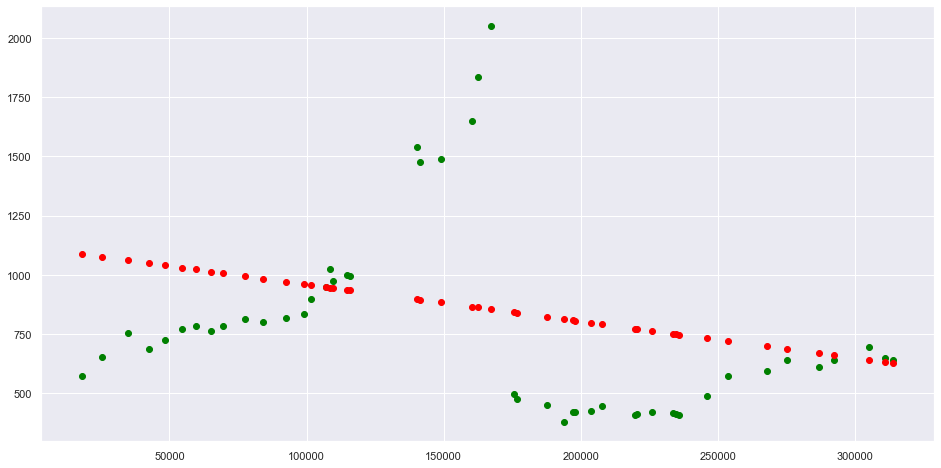

Mean Squared Error (MSE) 	: 150036.92719521324


In [261]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 3) Predicting TSLA Prices using Positive Cases

Intercept of Regression 	: b =  [986.86874094]
Coefficients of Regression 	: a =  [[-2.74152054e-05]]



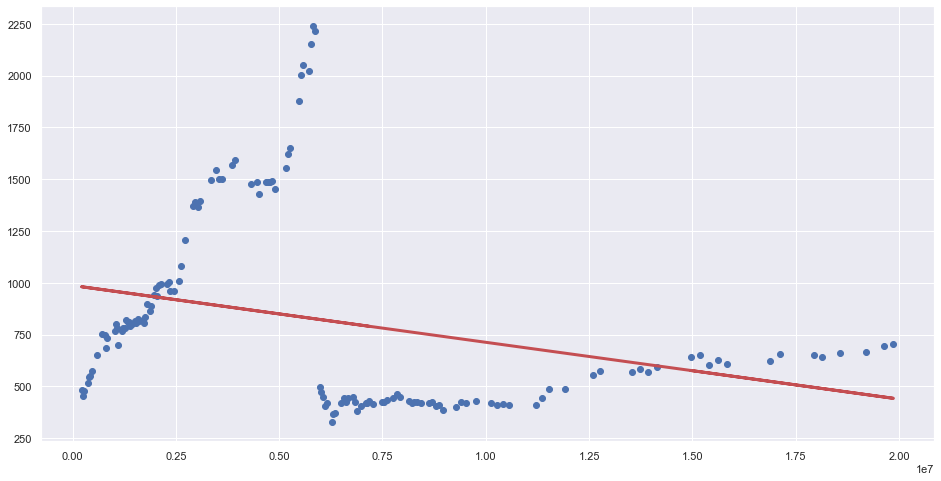

Explained Variance (R^2) 	: 0.08570290565970984
Mean Squared Error (MSE) 	: 194309.40385397561


In [262]:
# Response: TSLA_Prices
# Predictor: Positive_Cases
X_train, X_test, y_train, y_test = train_test_split(Positive_Cases, TSLA_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

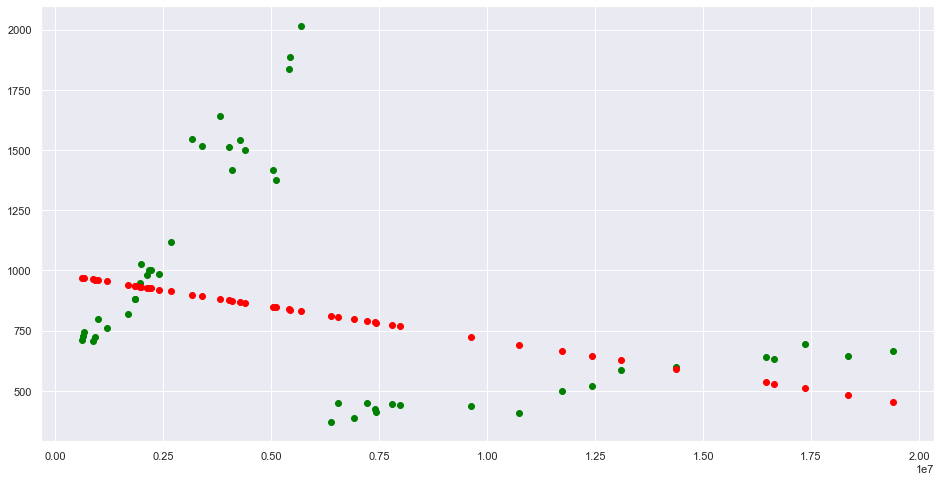

Mean Squared Error (MSE) 	: 185315.1378591572


In [263]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 4) Predicting TSLA Prices using Positive Increased

Intercept of Regression 	: b =  [981.90962721]
Coefficients of Regression 	: a =  [[-0.00113789]]



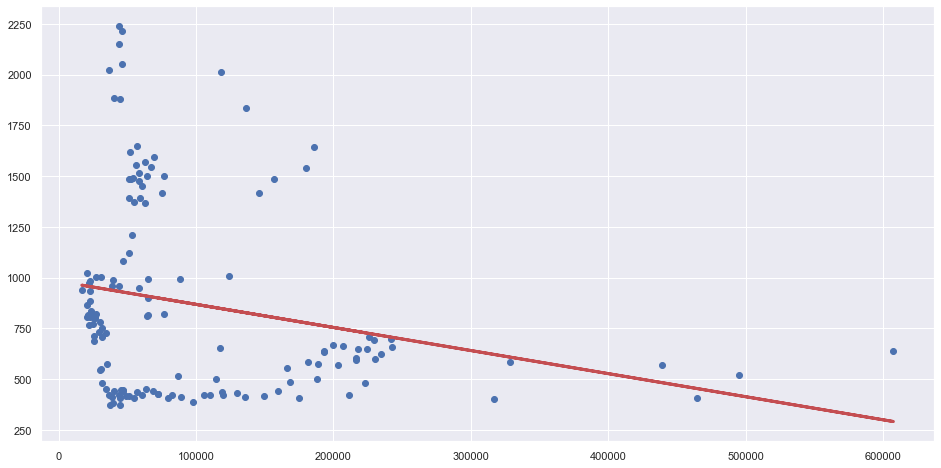

Explained Variance (R^2) 	: 0.05530901170992941
Mean Squared Error (MSE) 	: 213564.0426994274


In [264]:
# Response: TSLA_Prices
# Predictor: Positive_Increased
X_train, X_test, y_train, y_test = train_test_split(Positive_Increased, TSLA_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

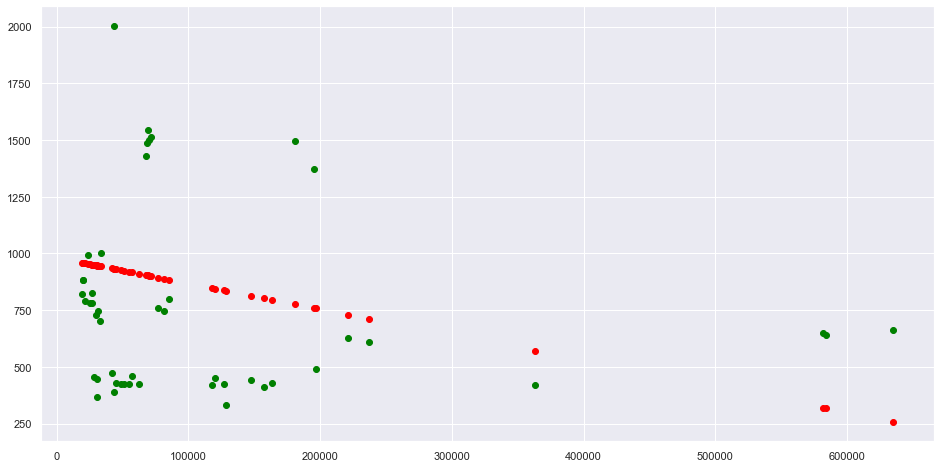

Mean Squared Error (MSE) 	: 179069.8125150154


In [265]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 5) Predicting TSLA Prices using Total Testing

Intercept of Regression 	: b =  [1013.82334004]
Coefficients of Regression 	: a =  [[-2.19732978e-06]]



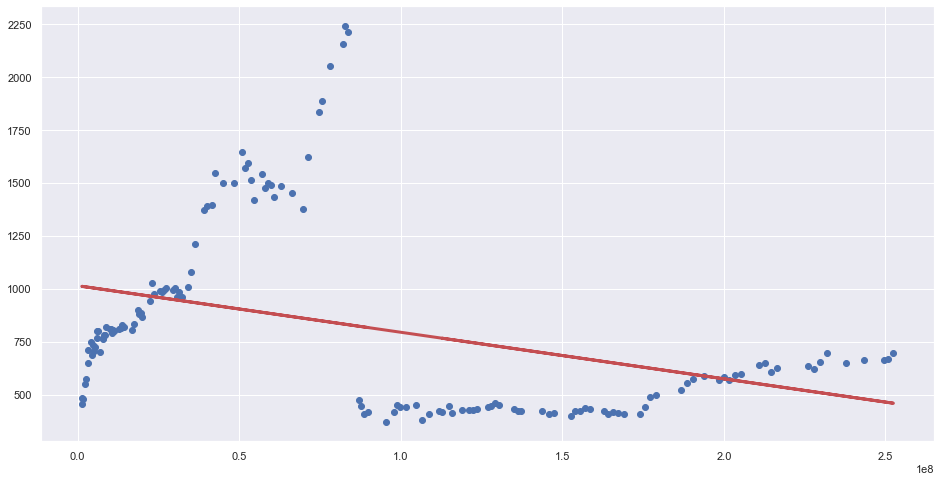

Explained Variance (R^2) 	: 0.13984341124330746
Mean Squared Error (MSE) 	: 165011.32898153467


In [266]:
# Response: TSLA_Prices
# Predictor: Total_Testing
X_train, X_test, y_train, y_test = train_test_split(Total_Testing, TSLA_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

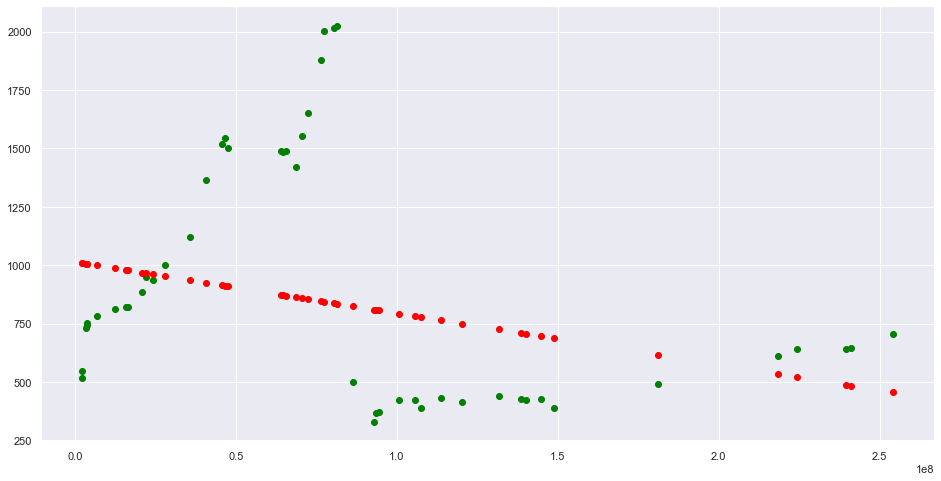

Mean Squared Error (MSE) 	: 246487.76628987872


In [267]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 6) Predicting TSLA Prices using Total Increased

Intercept of Regression 	: b =  [919.37728869]
Coefficients of Regression 	: a =  [[-4.96946435e-05]]



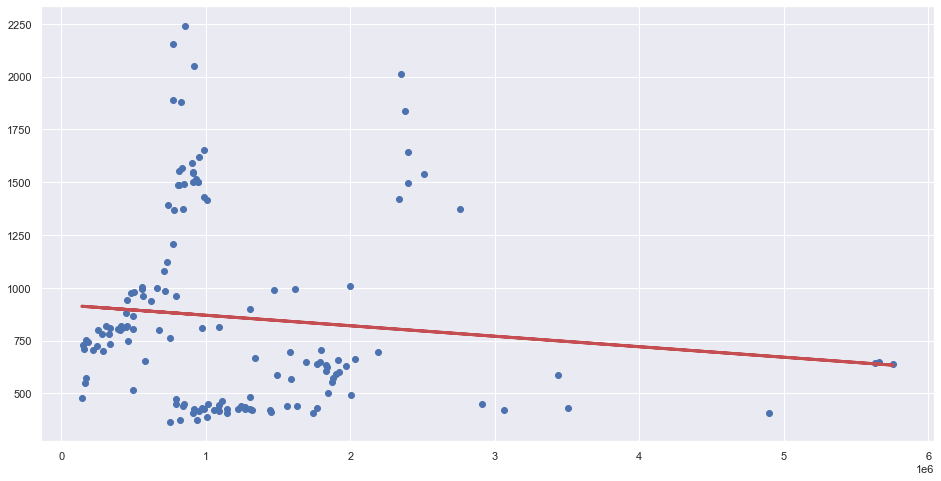

Explained Variance (R^2) 	: 0.012075688666759454
Mean Squared Error (MSE) 	: 201745.08948904063


In [268]:
# Response: TSLA_Prices
# Predictor: Total_Increased
X_train, X_test, y_train, y_test = train_test_split(Total_Increased, TSLA_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

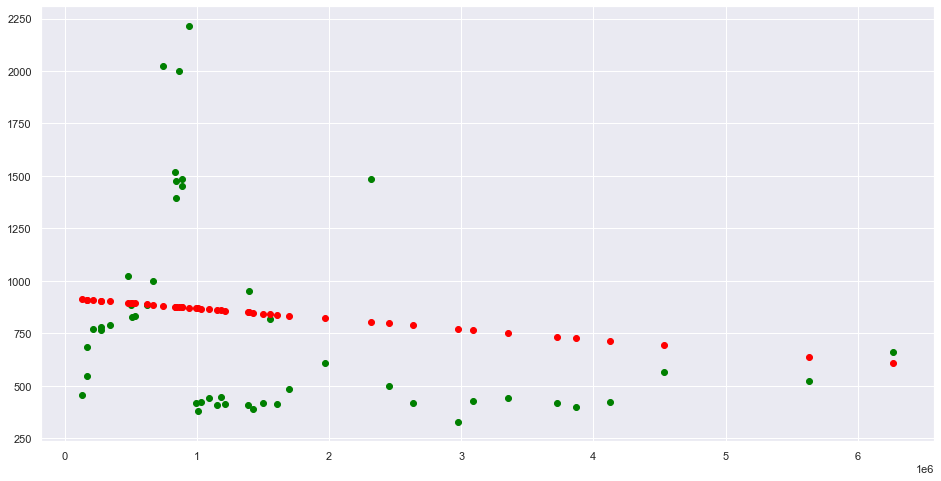

Mean Squared Error (MSE) 	: 215996.6904444267


In [269]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Predicting TSLA Price using Multiple Variable

In [270]:
y = TSLA_Prices # Response
X = jointCovid # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Train Set : (143, 6) (143, 1)
Test Set  : (48, 6) (48, 1)
Intercept 	: b =  [200.20608724]
Coefficients 	: a =  [[ 1.79933124e-04  3.17209206e-03  1.32414496e-02 -5.56565808e-02
  -2.90564321e-05 -2.05151630e-04]]


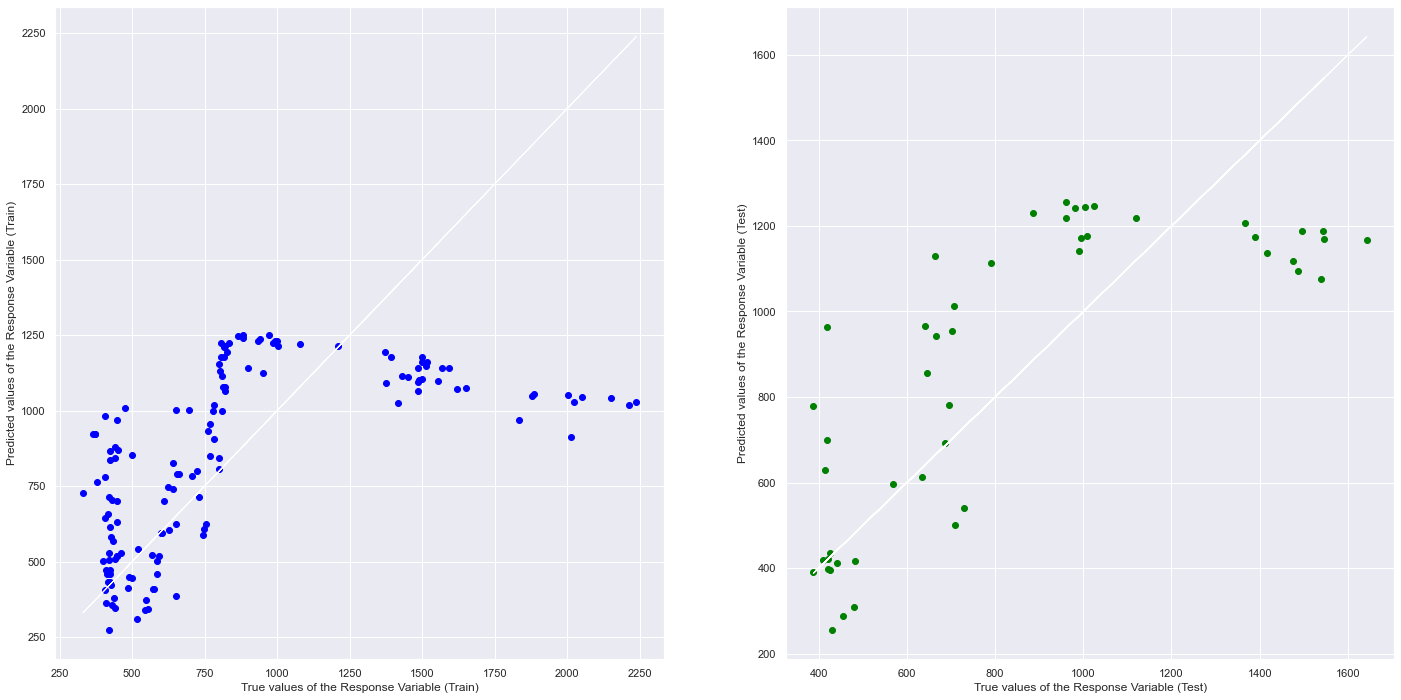

In [271]:
# Predict TSLA Prices values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [272]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.37229006880110727
Mean Squared Error (MSE) on Train Set 	: 144555.91997460602
Mean Squared Error (MSE) on Test Set 	: 67509.90221396748


# 1) Predicting UNH Prices using Death Increased

Intercept of Regression 	: b =  [305.39811988]
Coefficients of Regression 	: a =  [[0.00198936]]



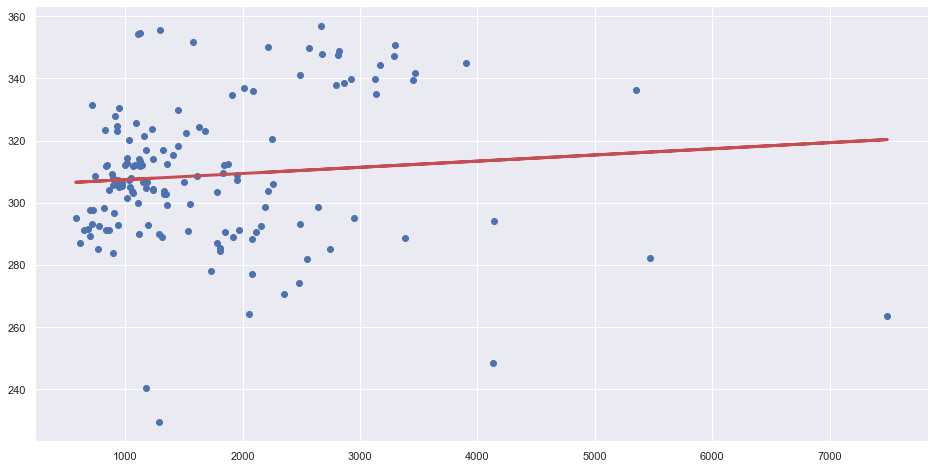

Explained Variance (R^2) 	: 0.008052176873613037
Mean Squared Error (MSE) 	: 531.1532279306232


In [273]:
# Response: UNH_Prices
# Predictor: Death_Increased
X_train, X_test, y_train, y_test = train_test_split(Death_Increased, UNH_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

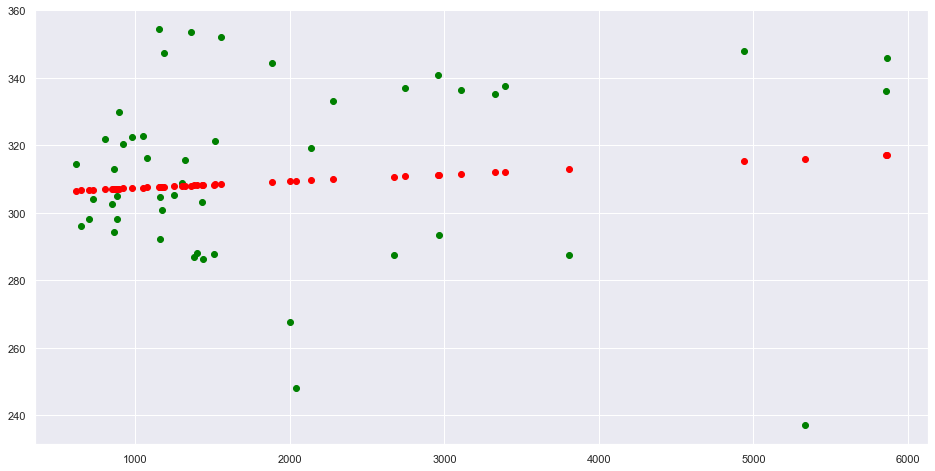

Mean Squared Error (MSE) 	: 682.4321398780019


In [274]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 2) Predicting UNH Prices using Total Deaths

Intercept of Regression 	: b =  [266.83528721]
Coefficients of Regression 	: a =  [[0.0002624]]



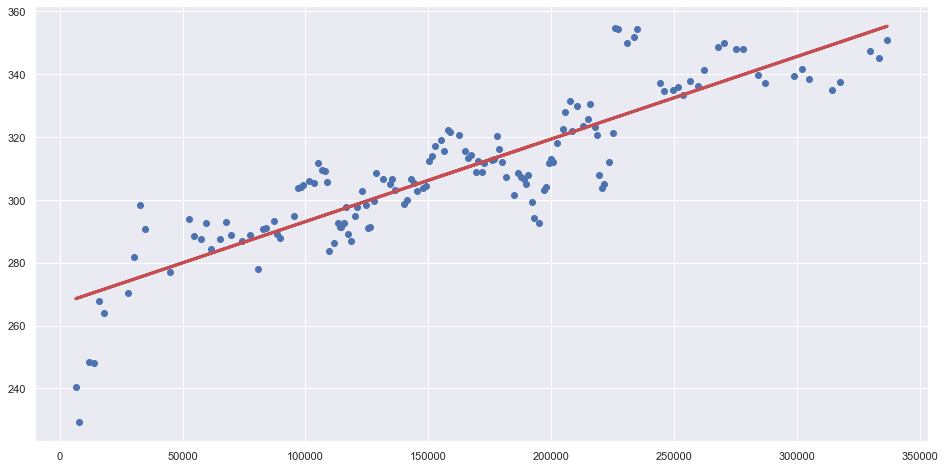

Explained Variance (R^2) 	: 0.7729994055830042
Mean Squared Error (MSE) 	: 119.593107856285


In [275]:
# Response: UNH_Prices
# Predictor: Total_Deaths
X_train, X_test, y_train, y_test = train_test_split(Total_Deaths, UNH_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

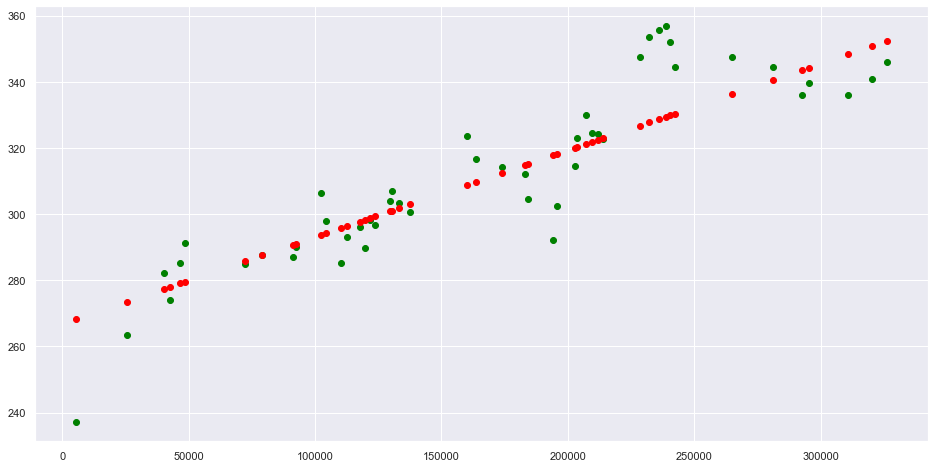

Mean Squared Error (MSE) 	: 144.2535760807476


In [276]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 3) Predicting UNH Prices using Positive Cases

Intercept of Regression 	: b =  [284.91188218]
Coefficients of Regression 	: a =  [[4.00234928e-06]]



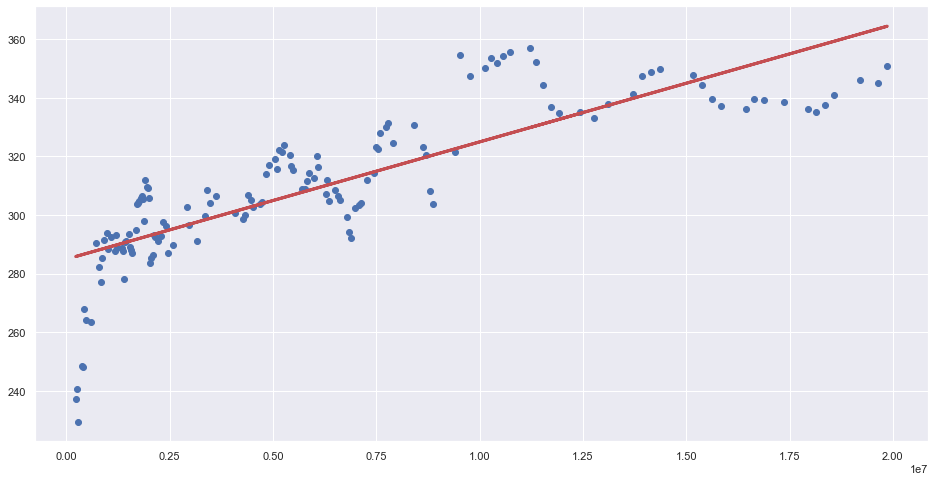

Explained Variance (R^2) 	: 0.674791065959494
Mean Squared Error (MSE) 	: 209.55175605153914


In [277]:
# Response: UNH_Prices
# Predictor: Positive_Cases
X_train, X_test, y_train, y_test = train_test_split(Positive_Cases, UNH_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

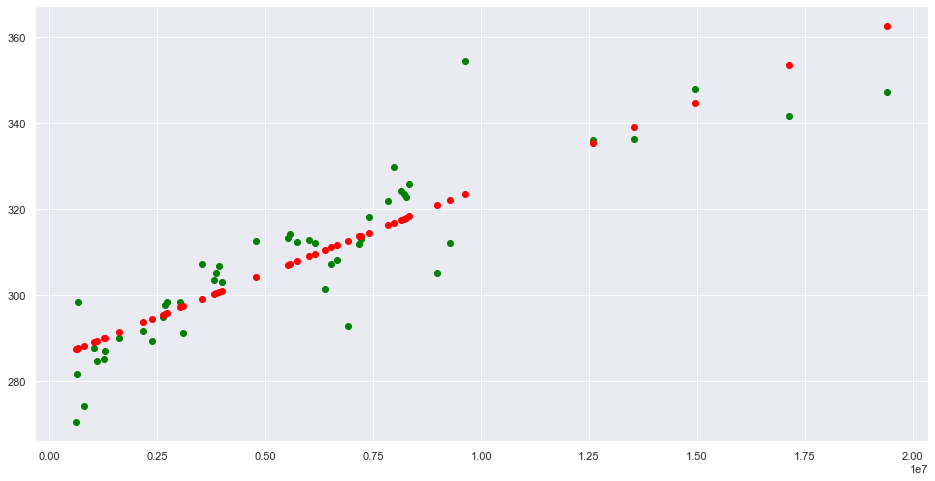

Mean Squared Error (MSE) 	: 76.6702209787171


In [278]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 4) Predicting UNH Prices using Positive Increased

Intercept of Regression 	: b =  [298.31298679]
Coefficients of Regression 	: a =  [[0.00011273]]



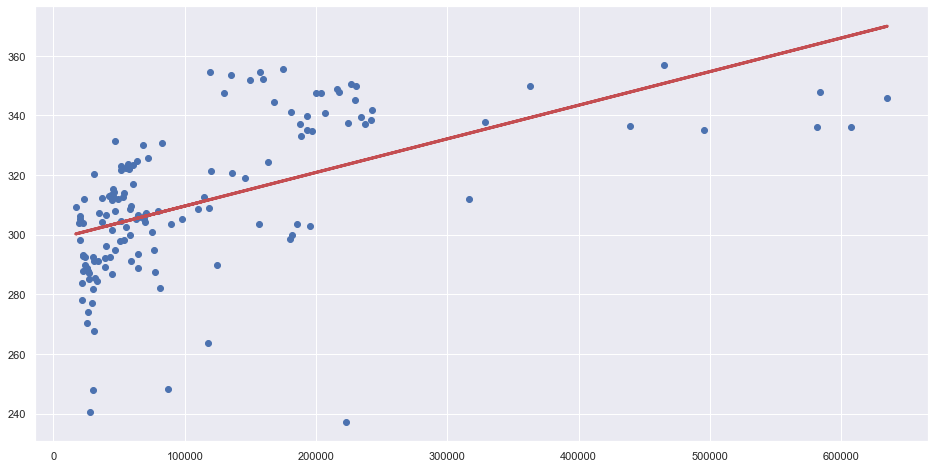

Explained Variance (R^2) 	: 0.3121031809697179
Mean Squared Error (MSE) 	: 425.1603109372184


In [279]:
# Response: UNH_Prices
# Predictor: Positive_Increased
X_train, X_test, y_train, y_test = train_test_split(Positive_Increased, UNH_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

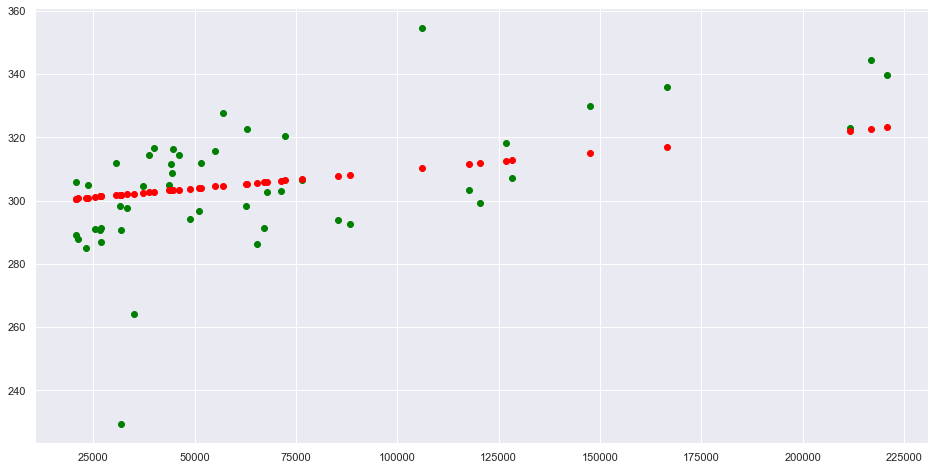

Mean Squared Error (MSE) 	: 309.2268789180698


In [280]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 5) Predicting UNH Prices using Total Testing

Intercept of Regression 	: b =  [282.68295537]
Coefficients of Regression 	: a =  [[2.94695226e-07]]



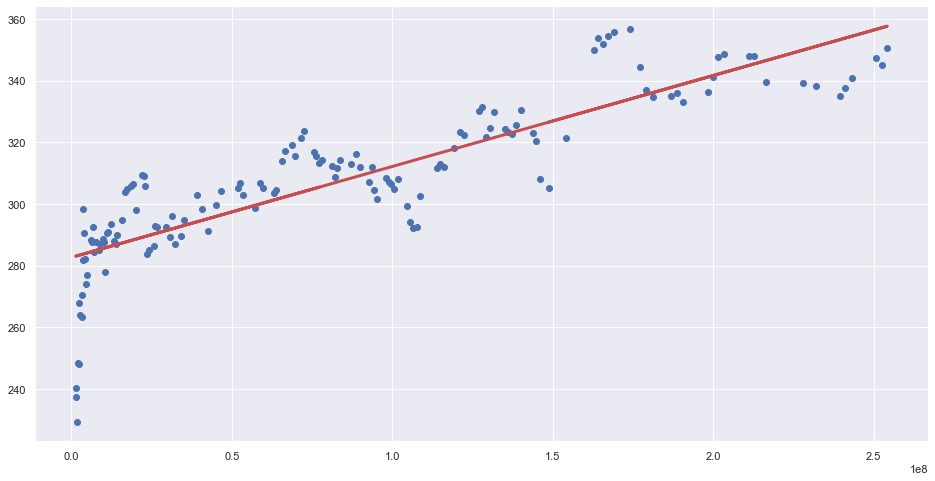

Explained Variance (R^2) 	: 0.7281437917617664
Mean Squared Error (MSE) 	: 167.07632244344555


In [281]:
# Response: UNH_Prices
# Predictor: Total_Testing
X_train, X_test, y_train, y_test = train_test_split(Total_Testing, UNH_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

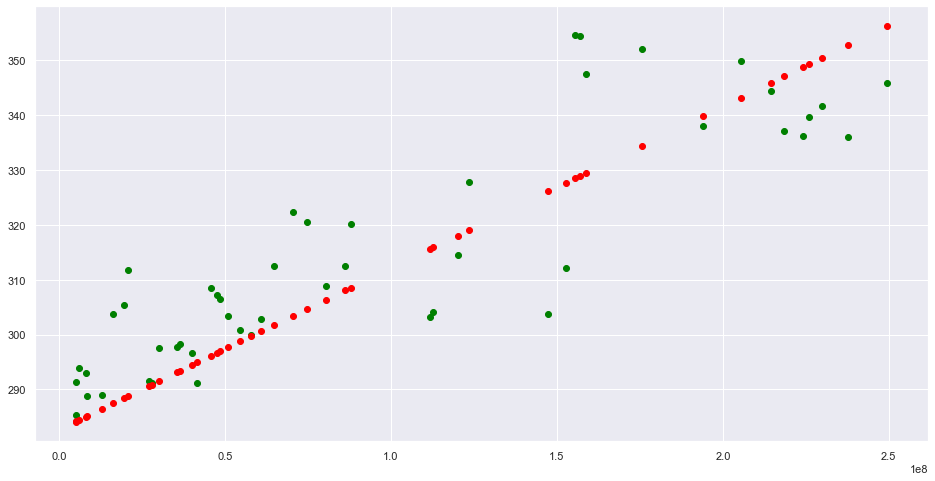

Mean Squared Error (MSE) 	: 138.40689709691114


In [282]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()
# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# 6) Predicting UNH Prices using Total Increased

Intercept of Regression 	: b =  [296.19409147]
Coefficients of Regression 	: a =  [[1.15244466e-05]]



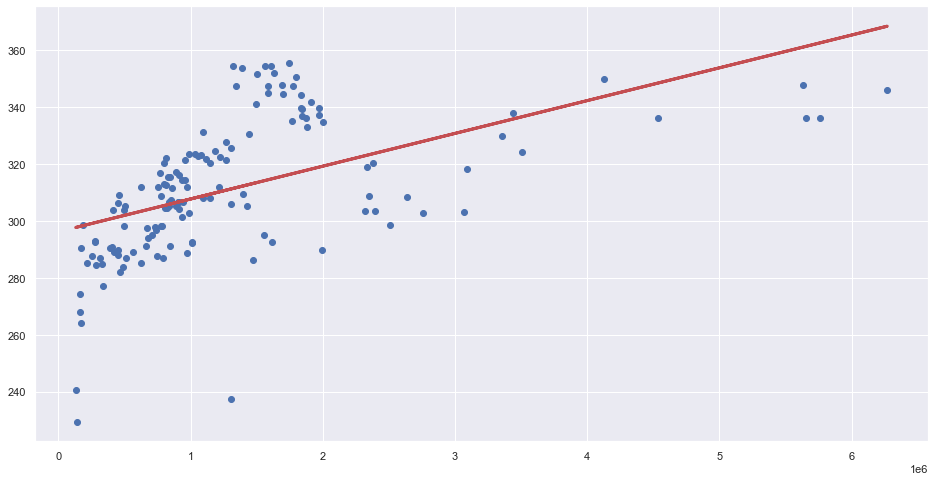

Explained Variance (R^2) 	: 0.2829267622999707
Mean Squared Error (MSE) 	: 414.00771172910754


In [283]:
# Response: UNH_Prices
# Predictor: Total_Increased
X_train, X_test, y_train, y_test = train_test_split(Total_Increased, UNH_Prices, test_size = 0.25)

linreg = LinearRegression()       
linreg.fit(X_train, y_train)       
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train

# Plotting Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

# R^2 of Model
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
y_train_pred = linreg.predict(X_train)
# MSE of Model
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

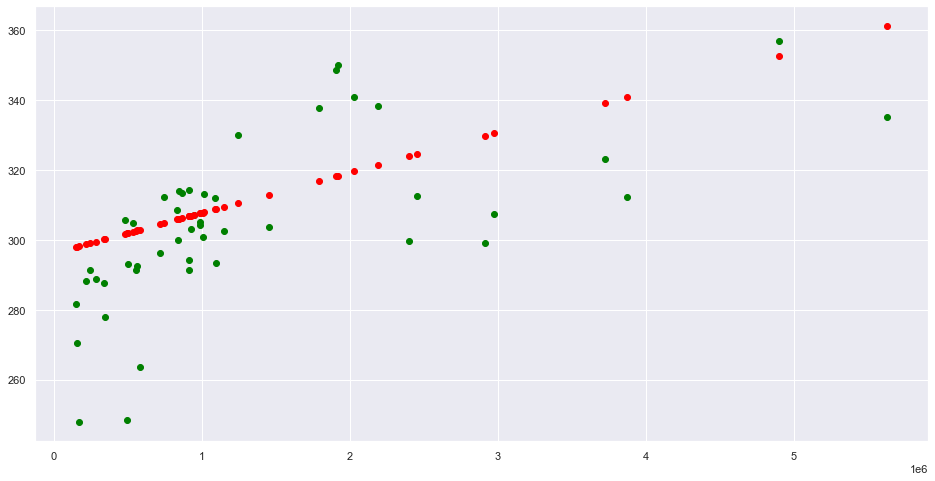

Mean Squared Error (MSE) 	: 372.58799505175375


In [284]:
y_test_pred = linreg.predict(X_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# MSE on the test set
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

# Predicting UNH Price using Multiple Variable

In [285]:
y = UNH_Prices # Response
X = jointCovid # Predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Train Set : (143, 6) (143, 1)
Test Set  : (48, 6) (48, 1)
Intercept 	: b =  [262.11556994]
Coefficients 	: a =  [[-3.85972033e-06  1.18286999e-04  4.08245365e-04 -1.14540640e-03
   7.70071437e-08 -9.08724552e-06]]


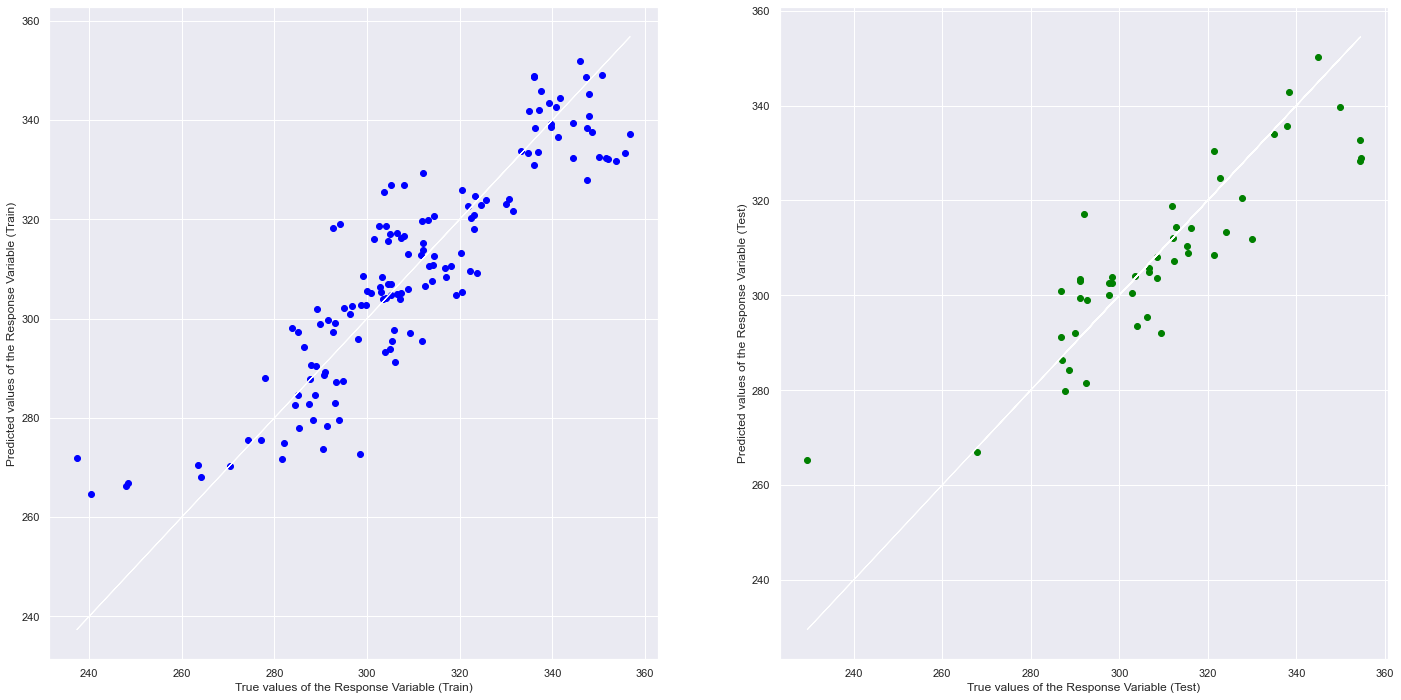

In [286]:
# Predict UNH Prices values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [287]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.8053780519165386
Mean Squared Error (MSE) on Train Set 	: 113.2669861925307
Mean Squared Error (MSE) on Test Set 	: 129.96812322682294


# 1) Comparing AAPL Uni-Variate Linear Models

Compare and contrast the 6 models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `AAPL_Prices` vs `Total_Testing` has the best Explained Variance (R^2) out of the 6 models.   
* `AAPL_Prices` vs `Death_Increased` has the worst Explained Variance (R^2) out of the 6 models.   
* Naturally, the model with `Total_Testing` is the best one in terms of just the Training accuracy.    


* We also find `AAPL_Prices` vs `Total_Testing` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `AAPL_Prices` vs `Death_Increased` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `Total_Testing` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `Total_Testing` is the best amongst the 6 in predicting `AAPL_Prices` because the model has the best Explained Variance (R^2) and still have a lower Mean Squared Error (MSE).

`Stock - Variable - R^2 - MSE train - MSE test (3dp.)`
_______________________________________________________________________________
* APPL - Death_Increased - 0.051 - 15435.932 - 16375.947
* APPL - Total_Deaths - 0.318 - 11313.645 - 8490.474
* APPL - Positive_Cases - 0.390 - 10017.989 - 10150.448
* APPL - Positive_Increased - 0.181 - 14024.790 - 12936.730
* APPL - Total_Testing - 0.440 - 9343.773 - 7788.809
* APPL - Total_Increased - 0.168 - 13690.028 - 14181.921
_______________________________________________________________________________

# 2) Comparing HAL Uni-Variate Linear Models

Compare and contrast the 6 models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `HAL_Prices` vs `Total_Deaths` has the best Explained Variance (R^2) out of the 6 models.   
* `HAL_Prices` vs `Death_Increased` has the worst Explained Variance (R^2) out of the 6 models.   
* Naturally, the model with `Total_Deaths` is the best one in terms of just the Training accuracy.    


* We also find `HAL_Prices` vs `Total_Deaths` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `HAL_Prices` vs `Death_Increased` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `Total_Deaths` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `Total_Deaths` is the best amongst the 6 in predicting `HAL_Prices` because the model has the best Explained Variance (R^2) and still have a lower Mean Squared Error (MSE).

`Stock - Variable - R^2 - MSE train - MSE test (3dp.)`
_______________________________________________________________________________
* HAL - Death_Increased - 0.044 - 9.269 - 11.377
* HAL - Total_Deaths - 0.671 - 3.319 - 3.323
* HAL - Positive_Cases - 0.554 - 3.781 - 3.922
* HAL - Positive_Increased - 0.295 - 7.318 - 5.542
* HAL - Total_Testing - 0.581 - 4.275 - 4.517
* HAL - Total_Increased - 0.242 - 7.332 - 7.552
_______________________________________________________________________________

# 3) Comparing PYPL Uni-Variate Linear Models

Compare and contrast the 6 models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `PYPL_Prices` vs `Total_Deaths` has the best Explained Variance (R^2) out of the 6 models.   
* `PYPL_Prices` vs `Total_Deaths` has the worst Explained Variance (R^2) out of the 6 models.   
* Naturally, the model with `Total_Deaths` is the best one in terms of just the Training accuracy.    


* We also find `PYPL_Prices` vs `Total_Deaths` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `PYPL_Prices` vs `Death_Increased` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `Total_Deaths` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `Total_Deaths` is the best amongst the 6 in predicting `PYPL_Prices` because the model has the best Explained Variance (R^2) and still have a lower Mean Squared Error (MSE).

`Stock - Variable - R^2 - MSE train - MSE test (3dp.)`
_______________________________________________________________________________
* PYPL - Death_Increased - 0.013 - 1019.641 - 1466.410
* PYPL - Total_Deaths - 0.881 - 144.984 - 169.450
* PYPL - Positive_Cases - 0.707 - 332.552 - 340.431
* PYPL - Positive_Increased - 0.275 - 854.413 - 737.938
* PYPL - Total_Testing - 0.689 - 328.450 - 293.082
* PYPL - Total_Increased - 0.331 - 766.201 - 762.456
_______________________________________________________________________________

# 4) Comparing SINGF Uni-Variate Linear Models

Compare and contrast the 6 models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `SINGF_Prices` vs `Death_Increased` has the best Explained Variance (R^2) out of the 6 models.   
* `SINGF_Prices` vs `Positive_Increased` has the worst Explained Variance (R^2) out of the 6 models.   
* Naturally, the model with `Death_Increased` is the best one in terms of just the Training accuracy.    


* We also find `SINGF_Prices` vs `Death_Increased` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `SINGF_Prices` vs `Positive_Increased` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `Death_Increased` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `Death_Increased` is the best amongst the 6 in predicting `SINGF_Prices` because the model has the best Explained Variance (R^2) and still have a lower Mean Squared Error (MSE).

`Stock - Variable - R^2 - MSE train - MSE test (3dp.)`
_______________________________________________________________________________
* SINGF - Death_Increased - 0.255 - 0.218 - 0.166
* SINGF - Total_Deaths - 0.152 - 0.261 - 0.199
* SINGF - Positive_Cases - 0.036 - 0.299 - 0.234
* SINGF - Positive_Increased - 0.009 - 0.276 - 0.314
* SINGF - Total_Testing - 0.045 - 0.287 - 0.248
* SINGF - Total_Increased - 0.0389 - 0.280 - 0.286
_______________________________________________________________________________

# 5) Comparing TSLA Uni-Variate Linear Models

Compare and contrast the 6 models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `TSLA_Prices` vs `Total_Testing` has the best Explained Variance (R^2) out of the 6 models.   
* `TSLA_Prices` vs `Total_Increased` has the worst Explained Variance (R^2) out of the 6 models.   
* Naturally, the model with `Total_Testing` is the best one in terms of just the Training accuracy.    


* We also find `TSLA_Prices` vs `Total_Testing` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `TSLA_Prices` vs `Total_Increased` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `Total_Testing` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `Total_Testing` is the best amongst the 6 in predicting `TSLA_Prices` because the model has the best Explained Variance (R^2) and still have a lower Mean Squared Error (MSE).

`Stock - Variable - R^2 - MSE train - MSE test (3dp.)`
_______________________________________________________________________________
* TSLA - Death_Increased - 0.026 - 182393.401 - 275188.742
* TSLA - Total_Deaths - 0.062 - 214831.949 - 150036.927
* TSLA - Positive_Cases - 0.085 - 194309.403 - 185315.137
* TSLA - Positive_Increased - 0.055 - 213564.042 - 179069.812
* TSLA - Total_Testing - 0.139 - 165011.328 - 246487.766
* TSLA - Total_Increased - 0.012 - 201745.089 - 215996.690
_______________________________________________________________________________

# 6) Comparing UNH Uni-Variate Linear Models

Compare and contrast the 6 models in terms of `R^2` and `MSE` on Train Data, as well as `MSE` on Test Data.    

* `UNH_Prices` vs `Total_Deaths` has the best Explained Variance (R^2) out of the 6 models.   
* `UNH_Prices` vs `Death_Increased` has the worst Explained Variance (R^2) out of the 6 models.   
* Naturally, the model with `Total_Deaths` is the best one in terms of just the Training accuracy.    


* We also find `UNH_Prices` vs `Total_Deaths` has the minimum MSE on both the Train and Test Sets compared to other models.   
* We also find `UNH_Prices` vs `Death_Increased` has the maximum MSE on both the Train and Test Sets compared to other models.   
* Naturally, the model with `Total_Deaths` is the best one in terms of Test accuracy as evident from MSE (error) on the Test Set.    

So, overall, the predictor `Total_Deaths` is the best amongst the 6 in predicting `UNH_Prices` because the model has the best Explained Variance (R^2) and still have a lower Mean Squared Error (MSE).

`Stock - Variable - R^2 - MSE train - MSE test (3dp.)`
_______________________________________________________________________________
* UNH - Death_Increased - 0.008 - 531.153 - 682.432
* UNH - Total_Deaths - 0.772 - 119.593 - 144.253
* UNH - Positive_Cases - 0.674 - 209.551 - 76.670
* UNH - Positive_Increased - 0.312 - 425.160 - 309.226
* UNH - Total_Testing - 0.728 - 167.076 - 138.406
* UNH - Total_Increased - 0.282 - 414.007 - 372.587
_______________________________________________________________________________

# Conclusion

Best linear regression model of each stock (based off R^2 & MSE)
* AAPL vs Total_Testing
* HAL vs Total_Deaths
* PYPL vs Total_Deaths
* SINGF vs Death_Increased 
* TSLA vs Total_Testing
* UNH vs Total_Deaths
___________________________________________________________________________
Using multiple variables at once to create a multi-variate linear regression model improves the accuracy and goodness of fit in terms of Explained variance (R^2) and Mean Square Error (MSE).

# Graph for General Trend Amongst the Variables

In [9]:
# Joining dates with the dataframe that contains one stock and all covid variable
Dates.reset_index(drop=True, inplace=True)
AAPL_joint_date = pd.concat([Dates, AAPL_joint], axis=1)
HAL_joint_date = pd.concat([Dates, HAL_joint], axis=1)
PYPL_joint_date = pd.concat([Dates, PYPL_joint], axis=1)
SINGF_joint_date = pd.concat([Dates, SINGF_joint], axis=1)
TSLA_joint_date = pd.concat([Dates, TSLA_joint], axis=1)
UNH_joint_date = pd.concat([Dates, UNH_joint], axis=1)

In [8]:
# Converting files to excel for bigger visual representation
AAPL_joint_date.to_excel("AAPL_joint_date.xlsx")
HAL_joint_date.to_excel("HAL_joint_date.xlsx")
PYPL_joint_date.to_excel("PYPL_joint_date.xlsx")
SINGF_joint_date.to_excel("SINGF_joint_date.xlsx")
TSLA_joint_date.to_excel("TSLA_joint_date.xlsx")
UNH_joint_date.to_excel("UNH_joint_date.xlsx")

In [11]:
# multiple line plot
# to plot graph for other stocks, simply replace AAPL with the name of desired stock
plt.plot('date', 'APPL_Prices', data=AAPL_joint_date, marker='', color='skyblue', linew
plt.plot('date', 'death', data=AAPL_joint_date, marker='', color='yellow', linewidth=2)
plt.plot('date', 'deathIncrease', data=AAPL_joint_date, marker='', color='green', linew
plt.plot('date', 'totalTestResults', data=AAPL_joint_date, marker='', color='orange', l
plt.plot('date', 'totalTestResultsIncrease', data=AAPL_joint_date, marker='', color='pu

# show legend
plt.legend()
         
# show graph
plt.figure(figsize=(3, 3))
plt.show()